# Figure 1 and S1 -- Distribution of cortical neurons

## load packages and data

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.neighbors import KernelDensity
import scipy.stats as st
import os
from matplotlib import rc
from pathlib import Path  # <-- THIS FIXES YOUR ERROR

rc("pdf", fonttype=42)

In [16]:
# ===== Project paths =====
# Change only if your base folder is different:
PROJECT_DIR = Path("./DATA")

fig1_path = PROJECT_DIR / "Fig 1 and S1"
fig23_path = PROJECT_DIR / "Fig 2, 3 and S2"

# ===== Helpers =====
def must_exist(p: Path):
    if not p.exists():
        raise FileNotFoundError(f"Expected path not found: {p}")
    return p

def load_series(prefix: str, path: Path, n: int = 3, index_col=0):
    """Load prefix_1..n.csv from 'path'."""
    dfs = []
    for i in range(1, n + 1):
        fp = path / f"{prefix}_{i}.csv"
        if not fp.exists():
            raise FileNotFoundError(f"Missing file: {fp}")
        dfs.append(pd.read_csv(fp, index_col=index_col))
    return dfs

In [17]:
# ===== Load Fig 1 and S1 data =====
datapath = must_exist(fig1_path)

data_latrm_1 = pd.read_csv(datapath / "LatRM_1.csv", index_col=0)
data_latrm_2 = pd.read_csv(datapath / "LatRM_2.csv", index_col=0)
data_latrm_3 = pd.read_csv(datapath / "LatRM_3.csv", index_col=0)
data_csc_1   = pd.read_csv(datapath / "CSC_1.csv",   index_col=0)
data_csc_2   = pd.read_csv(datapath / "CSC_2.csv",   index_col=0)
data_csc_3   = pd.read_csv(datapath / "CSC_3.csv",   index_col=0)
data_lsc_1   = pd.read_csv(datapath / "LSC_1.csv",   index_col=0)
data_lsc_2   = pd.read_csv(datapath / "LSC_2.csv",   index_col=0)
data_lsc_3   = pd.read_csv(datapath / "LSC_3.csv",   index_col=0)

latrm = [data_latrm_1, data_latrm_2, data_latrm_3]
csc   = [data_csc_1,   data_csc_2,   data_csc_3]
lsc   = [data_lsc_1,   data_lsc_2,   data_lsc_3]

# (optional) one-liners using the helper:
# latrm = load_series("LatRM", datapath, 3)
# csc   = load_series("CSC",   datapath, 3)
# lsc   = load_series("LSC",   datapath, 3)

## neruonal distribution

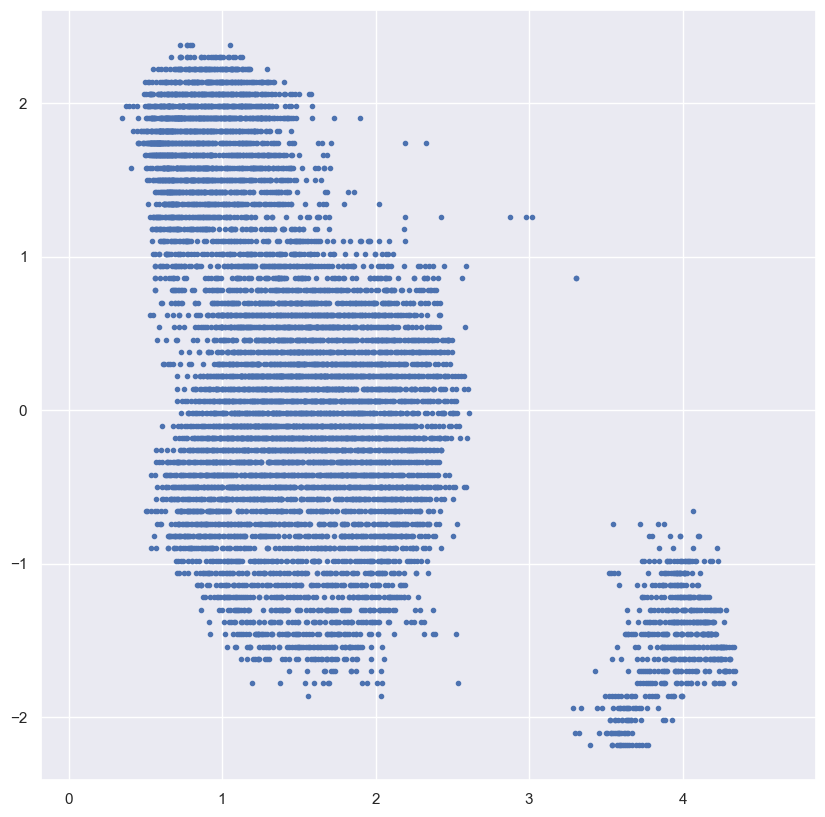

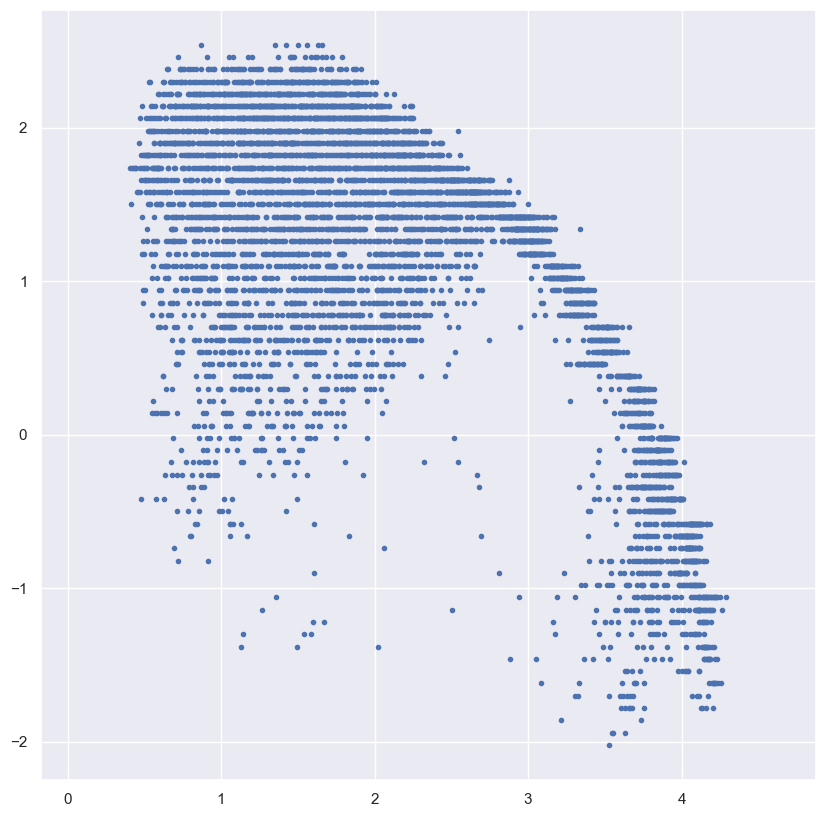

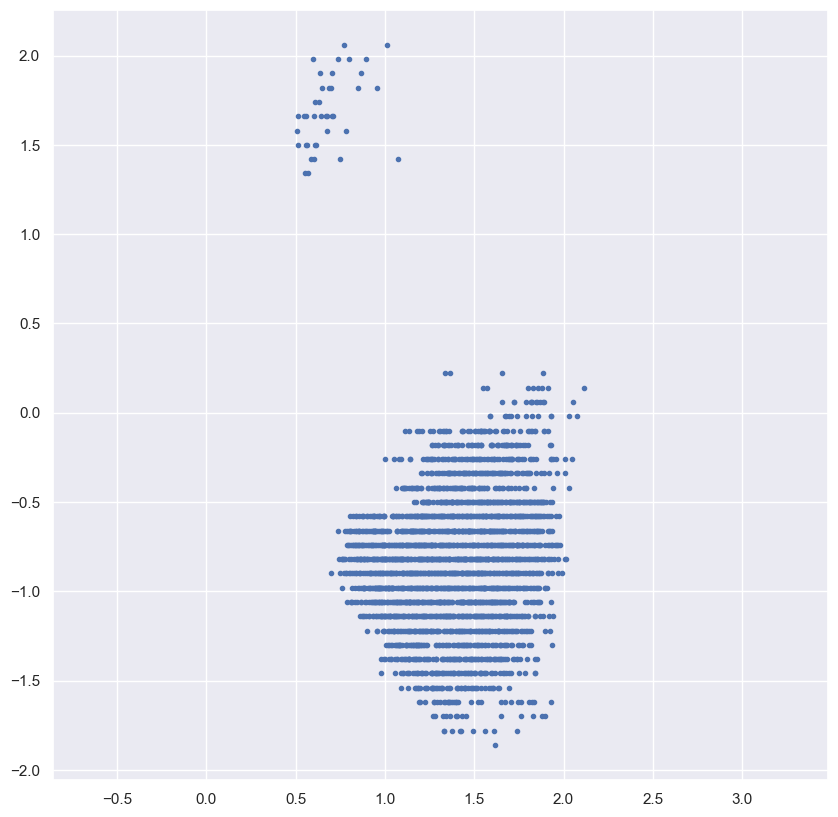

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(data_csc_1 ['x']/1000, data_csc_1['z'], marker='.')
plt.axis('equal')
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(data_latrm_1 ['x']/1000, data_latrm_1['z'], marker='.')
plt.axis('equal')
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(data_lsc_1 ['x']/1000, data_lsc_1['z'], marker='.')
plt.axis('equal')
plt.show()

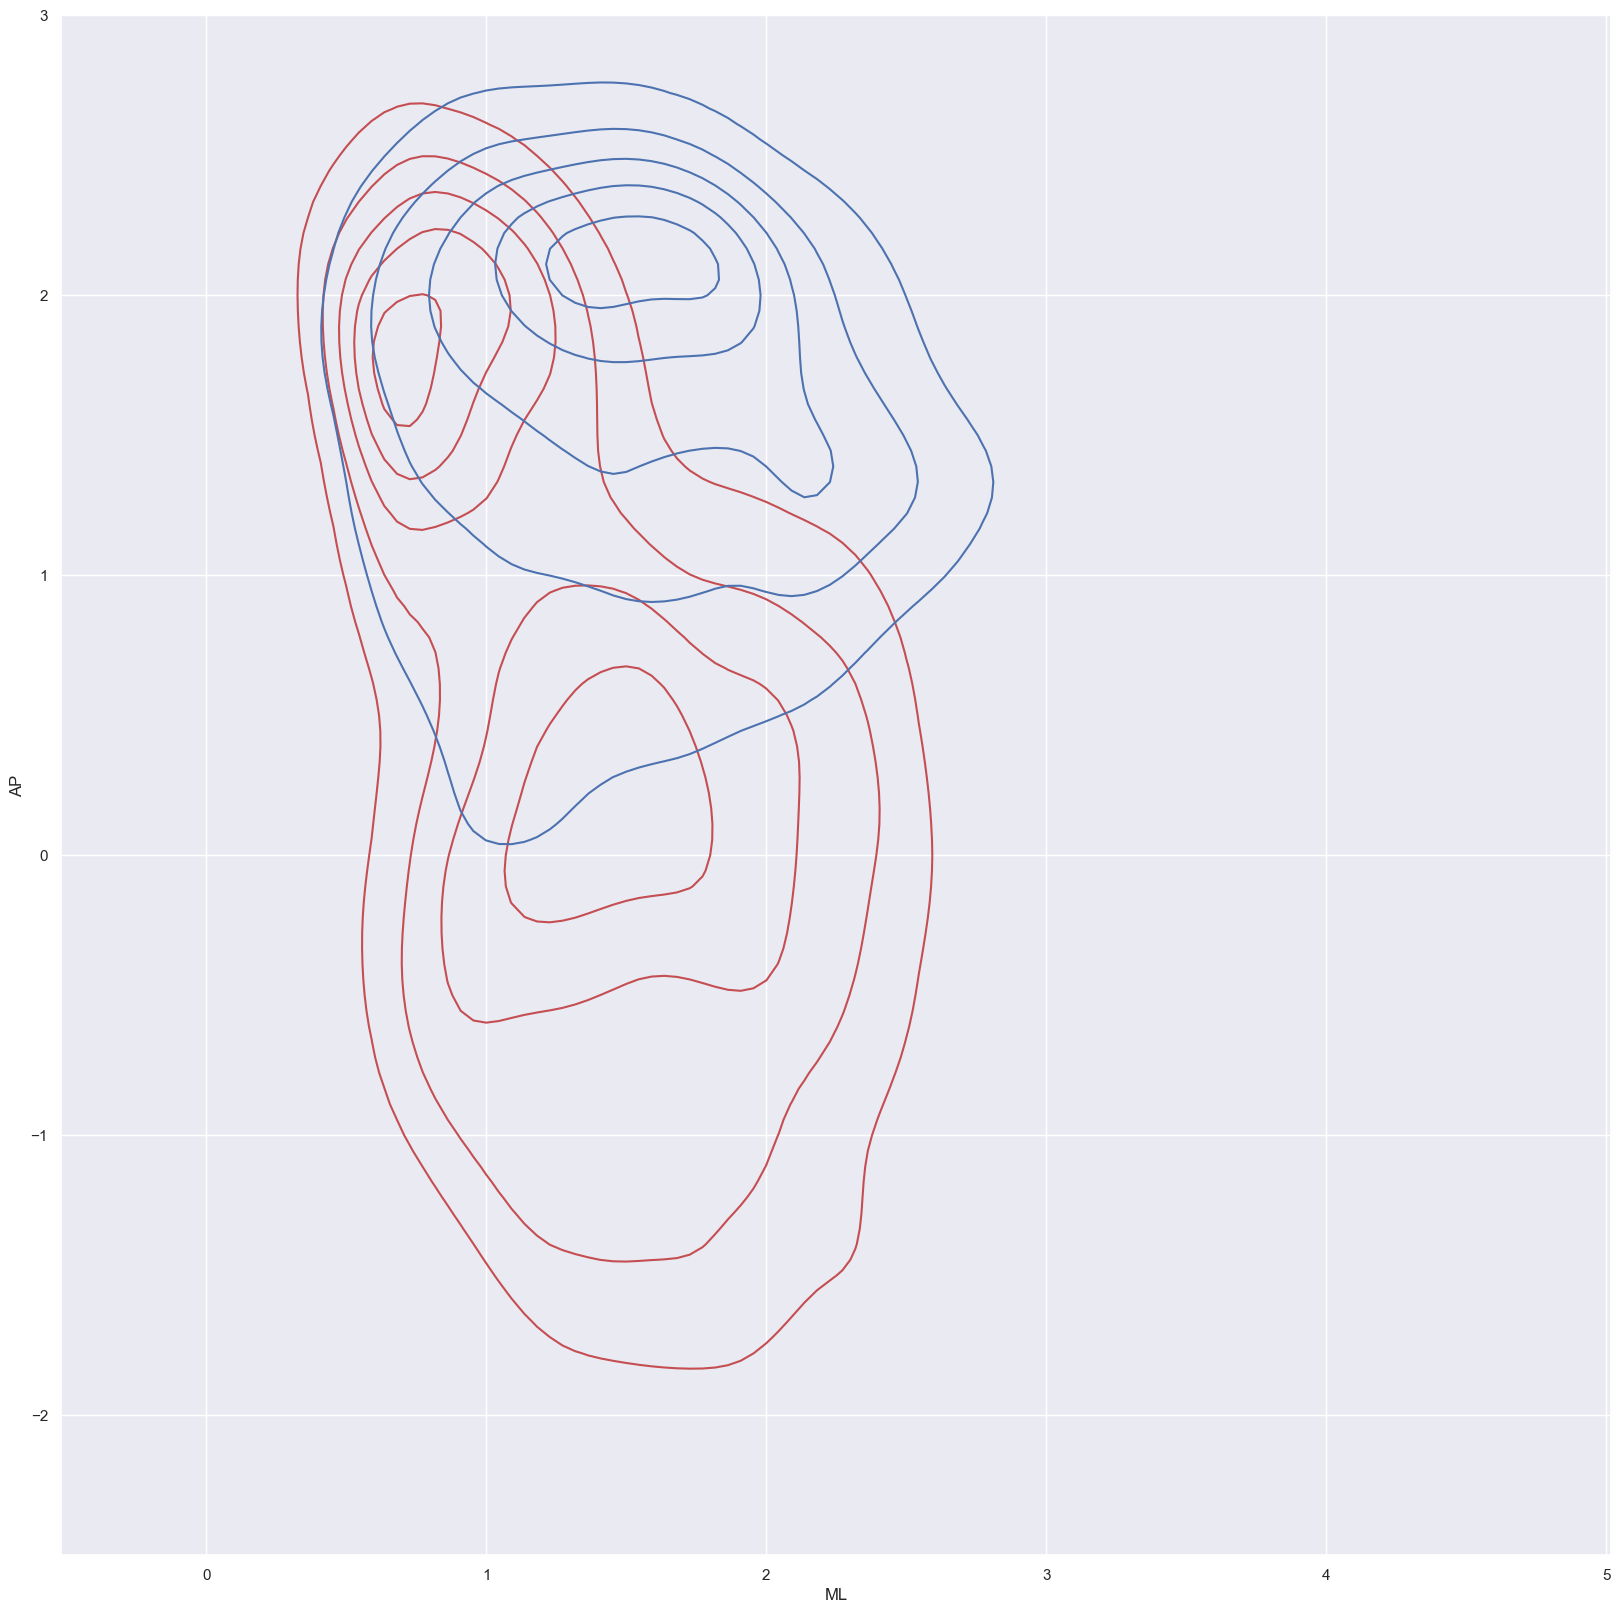

In [19]:
# contour plots for top-down view
xmin, xmax = 0, 4.5
ymin, ymax = -2.5, 3
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])

f_csc = np.reshape(np.zeros(100**2), xx.shape)
for data in csc:
    data_sub = data[(data.y>-1250)]
    x = data_sub['x']/1000
    y = data_sub['z']

    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    f_csc += f
f_csc /= f_csc.max()

f_latrm = np.reshape(np.zeros(100**2), xx.shape)
for data in latrm:
    data_sub = data[(data.y>-1250)]
    x = data_sub['x']/1000
    y = data_sub['z']

    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    f_latrm += f
f_latrm /= f_latrm.max()

fig = plt.figure(figsize=(20,20))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

cset_csc = ax.contour(xx, yy, f_csc,levels = [0.1, 0.3, 0.5, 0.7, 0.9], colors='r')
cset_latrm = ax.contour(xx, yy, f_latrm,levels = [0.1, 0.3, 0.5, 0.7, 0.9], colors='b')

ax.set_xlabel('ML')
ax.set_ylabel('AP')

plt.axis('equal')
plt.show()

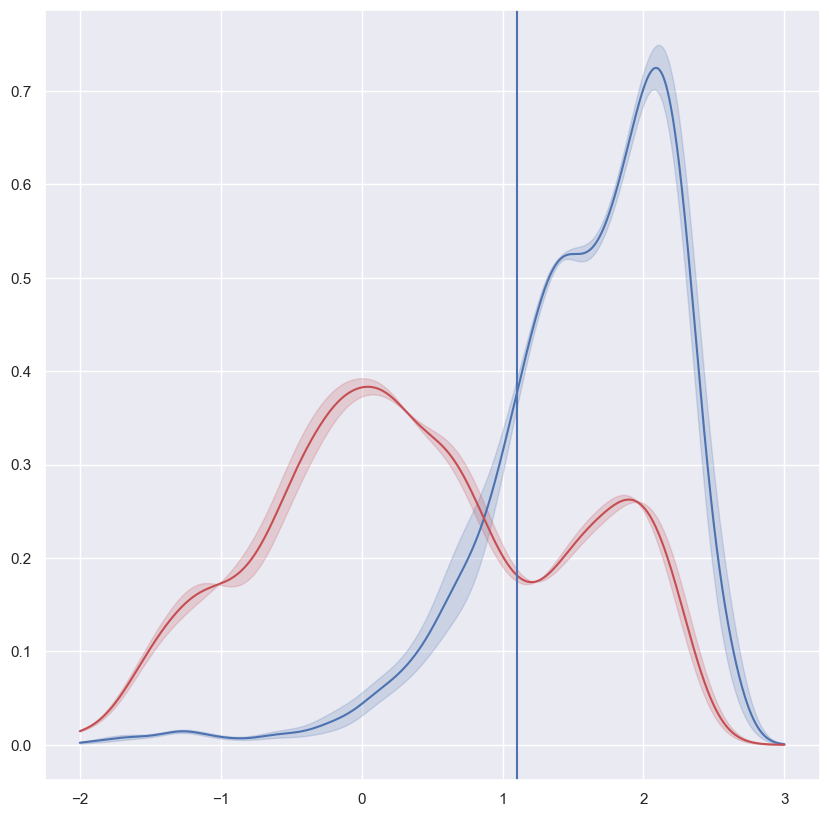

In [20]:
# density curves along the antero-posterior axis

def kernel_1d_y(data):
    y_d = np.linspace(-2, 3, 1000)
    data_sm = data[data.y>-1250]
    y_sm = data_sm['z']
    kernel_sm = st.gaussian_kde(y_sm)
    p_sm= kernel_sm(y_d)
    return p_sm
    
y_d = np.linspace(-2, 3, 1000)
latrm_sm = kernel_1d_y(data_latrm_1)
latrm_sm_2 = kernel_1d_y(data_latrm_2)
latrm_sm_3 = kernel_1d_y(data_latrm_3)

latrm_sm_all = np.array([latrm_sm, latrm_sm_2, latrm_sm_3])
latrm_sm_all_mean = np.average(latrm_sm_all, axis=0)
latrm_sm_all_sem = np.std(latrm_sm_all, axis=0)/np.sqrt(3)

csc_sm = kernel_1d_y(data_csc_1)
csc_sm_2 = kernel_1d_y(data_csc_2)
csc_sm_3 = kernel_1d_y(data_csc_3)

csc_sm_all = np.array([csc_sm, csc_sm_2, csc_sm_3])
csc_sm_all_mean = np.average(csc_sm_all, axis=0)
csc_sm_all_sem = np.std(csc_sm_all, axis=0)/np.sqrt(3)

fig = plt.figure(figsize=(10,10))
plt.plot(y_d, latrm_sm_all_mean, color='b')
plt.fill_between(y_d, latrm_sm_all_mean+latrm_sm_all_sem, latrm_sm_all_mean-latrm_sm_all_sem, alpha = 0.2, color='b')

plt.plot(y_d, csc_sm_all_mean, color='r')
plt.fill_between(y_d, csc_sm_all_mean+csc_sm_all_sem, csc_sm_all_mean-csc_sm_all_sem, alpha = 0.2, color='r')

plt.axvline(1.1)
plt.show()

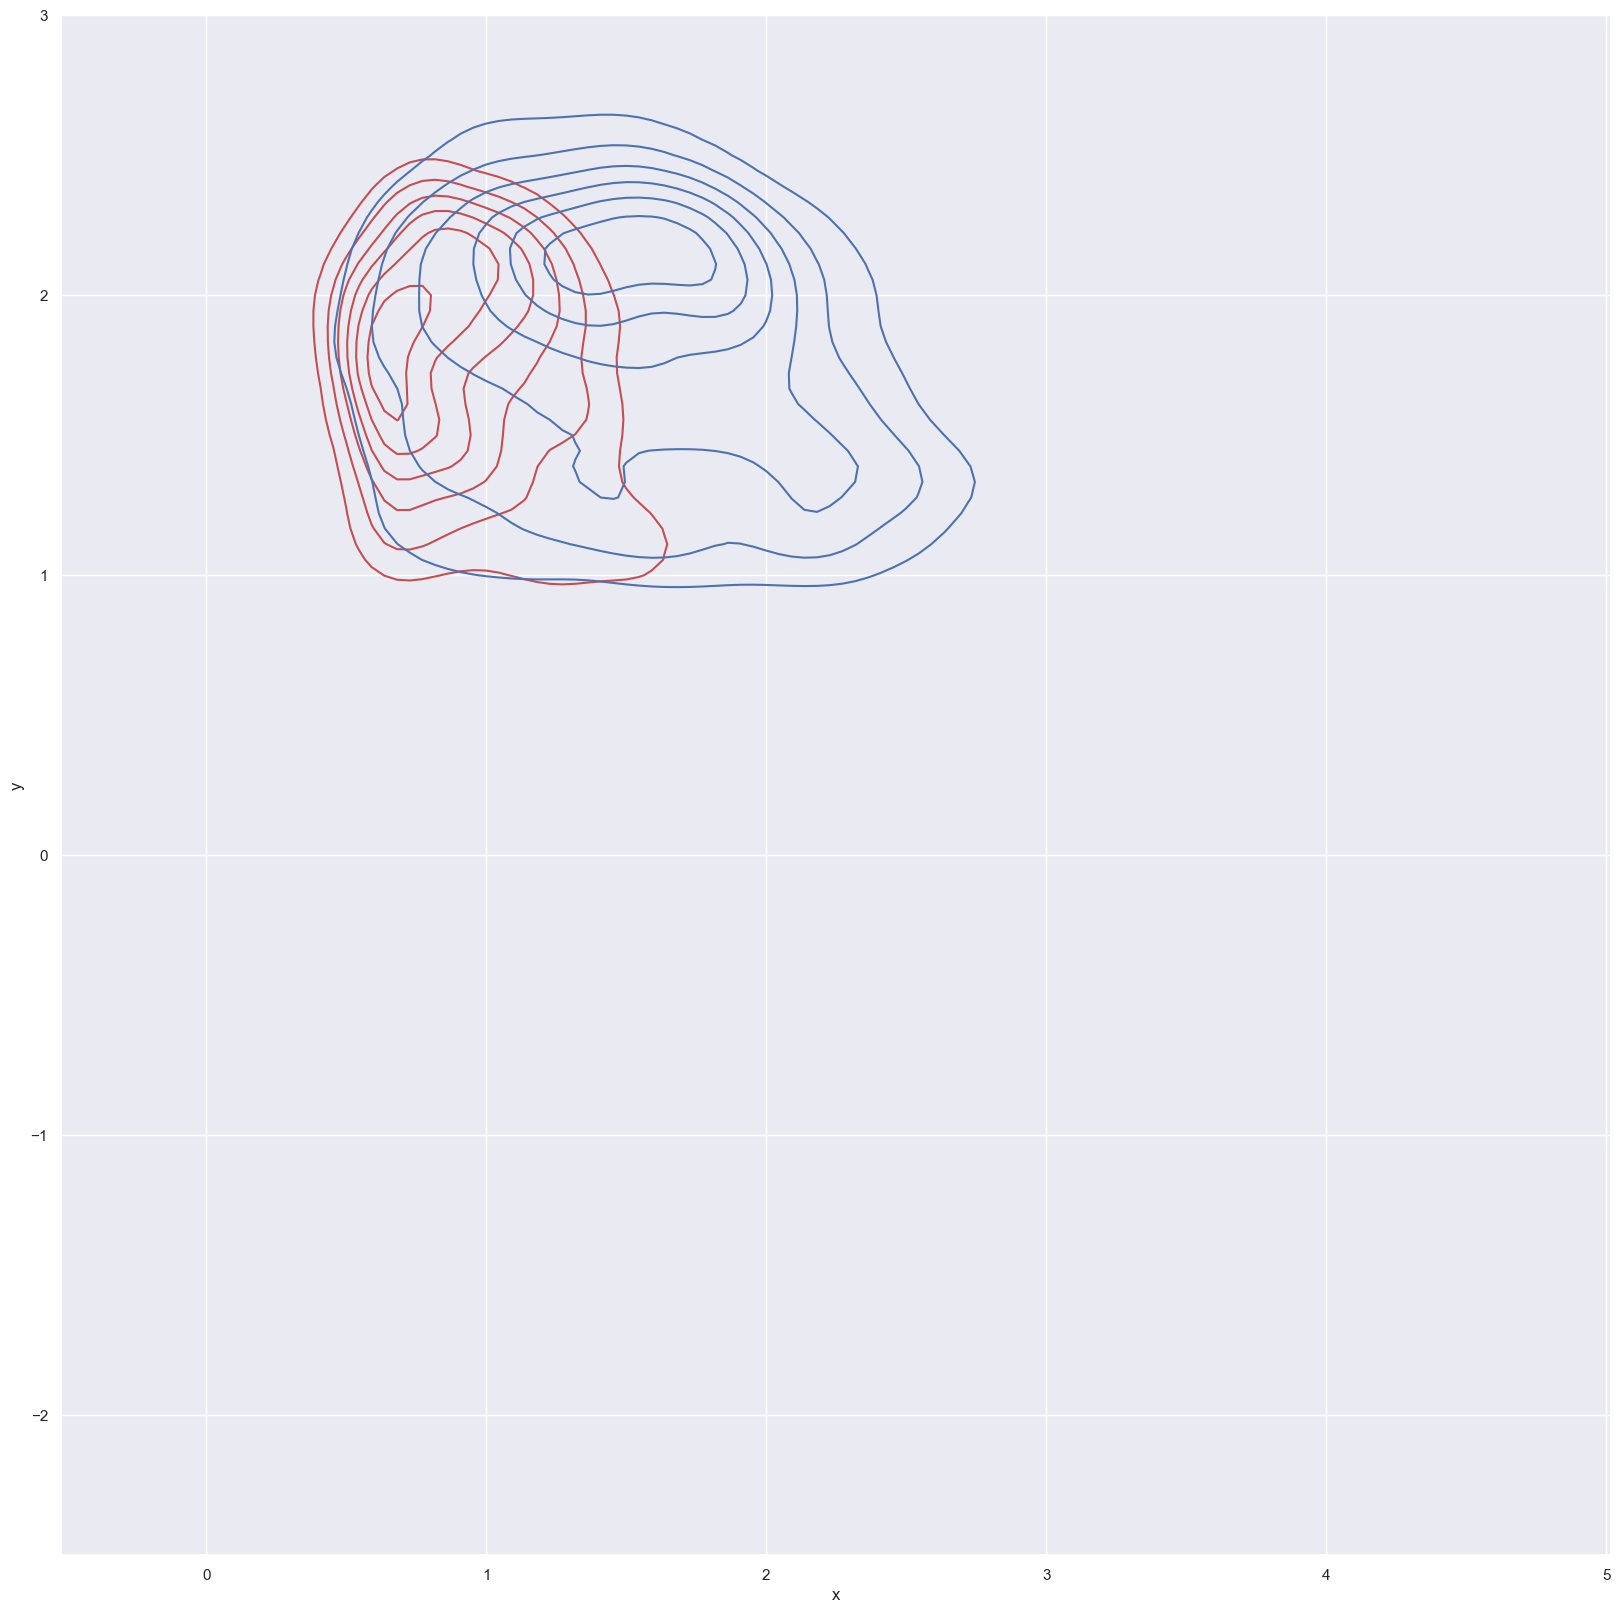

In [21]:
# contour plots for top-down view in anterior cortex

xmin, xmax = 0, 4.5
ymin, ymax = -2.5, 3
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])

f_csc = np.reshape(np.zeros(100**2), xx.shape)
for data in csc:
    data_sub = data[(data.y>-1250)&(data.z>1)]
    x = data_sub['x']/1000
    y = data_sub['z']

    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    f_csc += f
f_csc /= f_csc.max()

f_latrm = np.reshape(np.zeros(100**2), xx.shape)
for data in latrm:
    data_sub = data[(data.y>-1250)&(data.z>1)]
    x = data_sub['x']/1000
    y = data_sub['z']

    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    f_latrm += f
f_latrm /= f_latrm.max()

fig = plt.figure(figsize=(20,20))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

cset_csc = ax.contour(xx, yy, f_csc, 7, colors='r')
cset_latrm = ax.contour(xx, yy, f_latrm, 7, colors='b')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.axis('equal')
plt.show()

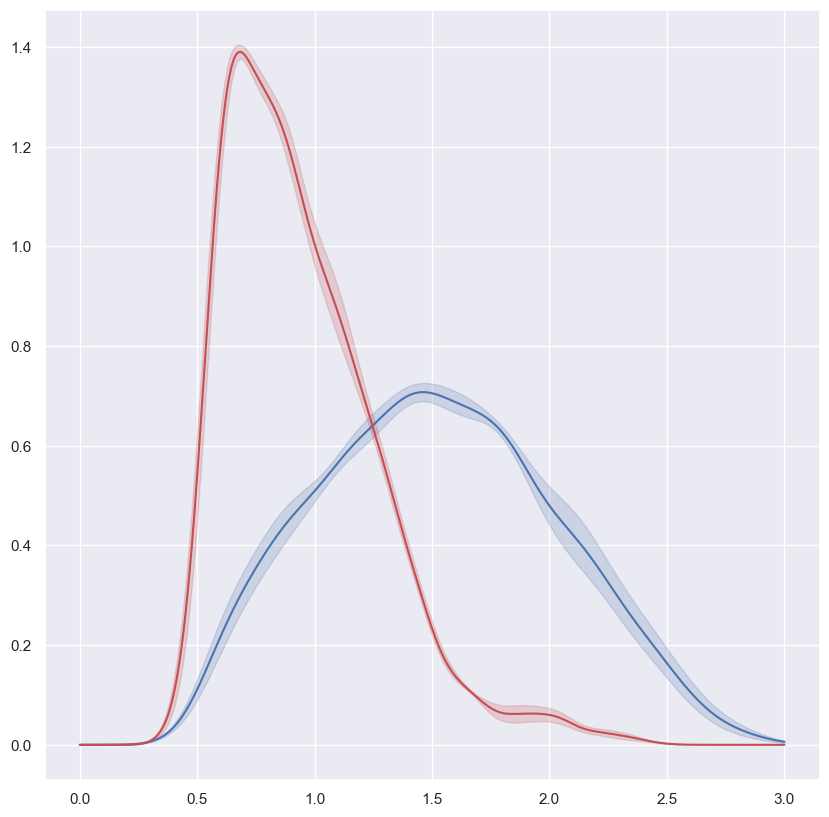

In [22]:
# density curves along the medio-lateral axis in anterior cortex

x_d = np.linspace(0, 3, 1000)
def kernel_1d(data):
    data_antero = data[(data.y>-1250)&(data.z>1)]
    x_antero = data_antero['x']/1000
    kernel_antero = st.gaussian_kde(x_antero)
    p_antero = kernel_antero(x_d)
    return p_antero
    
latrm_antero = kernel_1d(data_latrm_1)
latrm_antero_2 = kernel_1d(data_latrm_2)
latrm_antero_3 = kernel_1d(data_latrm_3)

latrm_antero_all = np.array([latrm_antero, latrm_antero_2, latrm_antero_3])
latrm_antero_all_mean = np.average(latrm_antero_all, axis=0)
latrm_antero_all_sem = np.std(latrm_antero_all, axis=0)/np.sqrt(3)

csc_antero = kernel_1d(data_csc_1)
csc_antero_2 = kernel_1d(data_csc_2)
csc_antero_3 = kernel_1d(data_csc_3)

csc_antero_all = np.array([csc_antero, csc_antero_2, csc_antero_3])
csc_antero_all_mean = np.average(csc_antero_all, axis=0)
csc_antero_all_sem = np.std(csc_antero_all, axis=0)/np.sqrt(3)

fig = plt.figure(figsize=(10,10))
plt.plot(x_d, latrm_antero_all_mean, color='b')
plt.fill_between(x_d, latrm_antero_all_mean+latrm_antero_all_sem, latrm_antero_all_mean-latrm_antero_all_sem, alpha = 0.2, color='b')

plt.plot(x_d, csc_antero_all_mean, color='r')
plt.fill_between(x_d, csc_antero_all_mean+csc_antero_all_sem, csc_antero_all_mean-csc_antero_all_sem, alpha = 0.2, color='r')

plt.show()

## neuron number quantification

In [23]:
def num_reg(antero_cut, reglist):
    reglist_antero = [x[(x['z']>=antero_cut)&(x['y']>-1250)] for x in reglist]
    reglist_postero = [x[(x['z']<antero_cut)&(x['y']>-1250)] for x in reglist]
    reglist_antero_medio = [x[x['x']<1500] for x in reglist_antero]
    reglist_antero_latero = [x[x['x']>=1500] for x in reglist_antero]
    
    num_reglist_antero = np.array([x.shape[0] for x in reglist_antero])
    num_reglist_postero = np.array([x.shape[0] for x in reglist_postero])
    num_reglist_antero_medio = np.array([x.shape[0] for x in reglist_antero_medio])
    num_reglist_antero_latero = np.array([x.shape[0] for x in reglist_antero_latero])
    
    return num_reglist_antero, num_reglist_postero, num_reglist_antero_medio, num_reglist_antero_latero

def per_reg(antero_cut, reglist):
    num_reglist_antero, num_reglist_postero, num_reglist_antero_medio, num_reglist_antero_latero = num_reg(antero_cut, reglist)
    per_antero_postero = (num_reglist_antero / (num_reglist_antero+num_reglist_postero)).mean()
    sem_antero_postero = st.sem(num_reglist_antero / (num_reglist_antero+num_reglist_postero))
    per_anero_medio_latero = (num_reglist_antero_medio / (num_reglist_antero_medio+num_reglist_antero_latero)).mean()
    sem_anero_medio_latero = st.sem(num_reglist_antero_medio / (num_reglist_antero_medio+num_reglist_antero_latero))
    
    return per_antero_postero, sem_antero_postero, per_anero_medio_latero, sem_anero_medio_latero

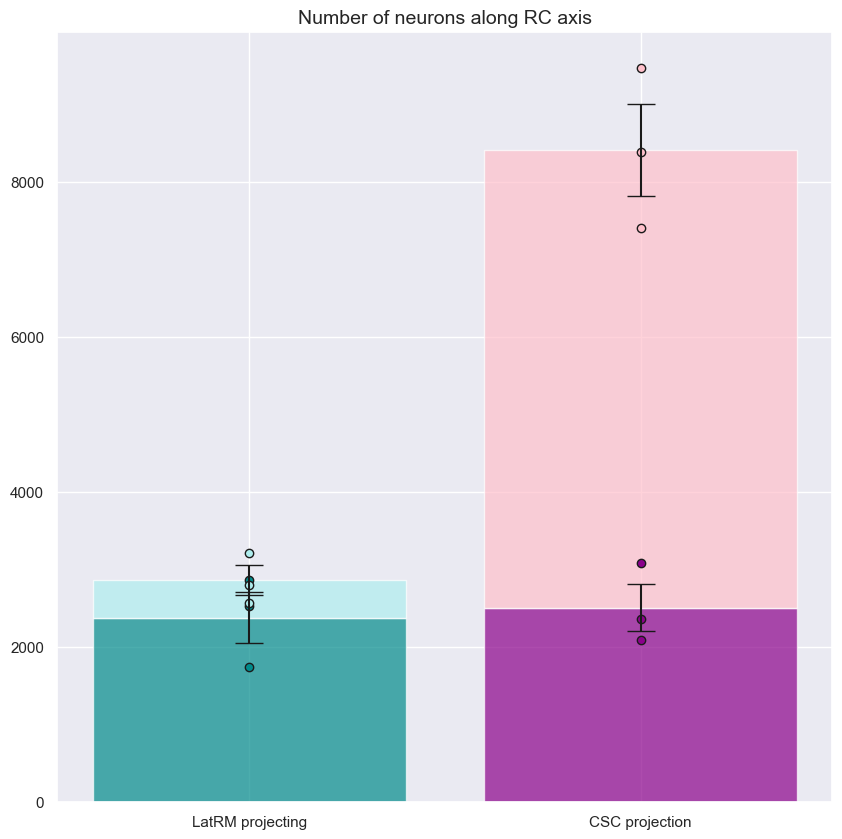

In [24]:
# count the number of neurons in defined region

num_latrm_antero, num_latrm_postero, num_latrm_antero_medio, num_latrm_antero_latero = num_reg(1, latrm)
num_csc_antero, num_csc_postero, num_csc_antero_medio, num_csc_antero_latero = num_reg(1, csc)

antero_latrm_csc = [num_latrm_antero.mean(), num_csc_antero.mean()]
postero_latrm_csc = [num_latrm_postero.mean(), num_csc_postero.mean()]
antero_latrm_csc_err =[st.sem(num_latrm_antero), st.sem(num_csc_antero)]
postero_latrm_csc_err = [st.sem(num_latrm_postero), st.sem(num_csc_postero)]

x_values = range(len(antero_latrm_csc))
x_values = ['LatRM projecting', 'CSC projection']

plt.figure(figsize = (10,10))

plt.bar(x_values, antero_latrm_csc, yerr=antero_latrm_csc_err, capsize=10, color = ['darkcyan', 'darkmagenta'], alpha = 0.7)
plt.bar(x_values, postero_latrm_csc, bottom=antero_latrm_csc, yerr=postero_latrm_csc_err, capsize=10, color = ['paleturquoise', 'pink'], alpha = 0.7)
plt.scatter([x_values[0]]*3, num_latrm_antero, color = 'darkcyan', edgecolors= 'k')
plt.scatter([x_values[0]]*3, num_latrm_postero+num_latrm_antero.mean(), color = 'paleturquoise', edgecolors= 'k')
plt.scatter([x_values[1]]*3, num_csc_antero, color = 'darkmagenta', edgecolors= 'k')
plt.scatter([x_values[1]]*3, num_csc_postero+num_csc_antero.mean(), color = 'pink', edgecolors= 'k')
plt.title('Number of neurons along RC axis', fontsize = 14)

plt.show()

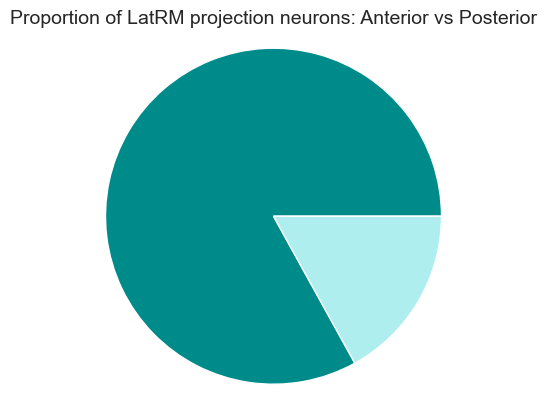

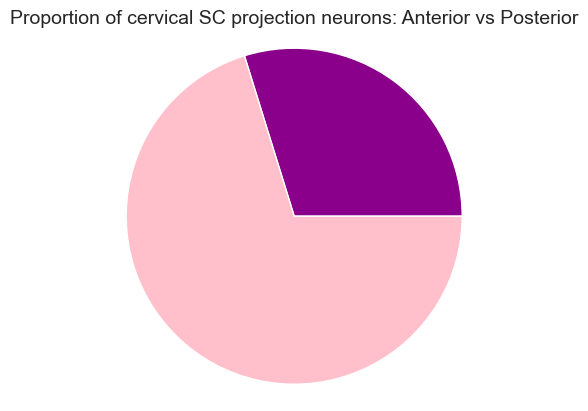

In [25]:
# pie plot to show the proportion of neurons in related regions

plt.pie([antero_latrm_csc[0],postero_latrm_csc[0]], colors = ['darkcyan', 'paleturquoise'])
plt.title('Proportion of LatRM projection neurons: Anterior vs Posterior', fontsize = 14)
plt.axis('equal')
plt.show()

plt.pie([antero_latrm_csc[1],postero_latrm_csc[1]], colors = ['darkmagenta', 'pink'])
plt.title('Proportion of cervical SC projection neurons: Anterior vs Posterior', fontsize = 14)
plt.axis('equal')
plt.show()

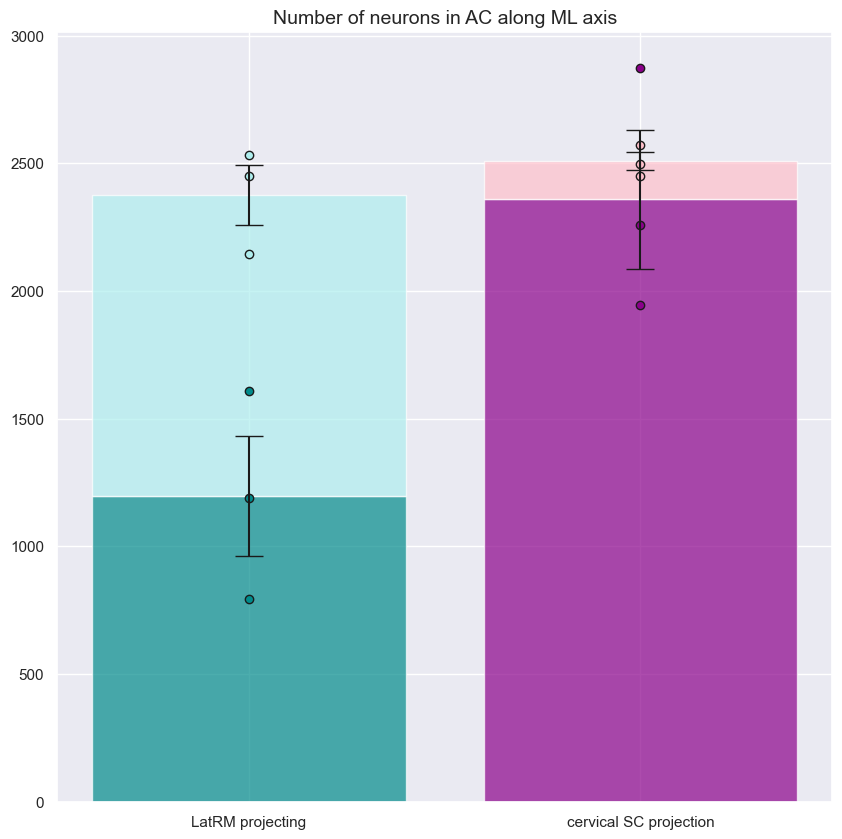

In [26]:
# count the number of neurons in defined region

medio_latrm_csc = [num_latrm_antero_medio.mean(), num_csc_antero_medio.mean()]
latero_latrm_csc = [num_latrm_antero_latero.mean(), num_csc_antero_latero.mean()]
medio_latrm_csc_err =[st.sem(num_latrm_antero_medio), st.sem(num_csc_antero_medio)]
latero_latrm_csc_err = [st.sem(num_latrm_antero_latero), st.sem(num_csc_antero_latero)]

x_values = range(len(medio_latrm_csc))
x_values = ['LatRM projecting', 'cervical SC projection']
ax=plt.figure(figsize = (10,10))

plt.bar(x_values, medio_latrm_csc, yerr=medio_latrm_csc_err, capsize=10, color = ['darkcyan', 'darkmagenta'], alpha = 0.7)
plt.bar(x_values, latero_latrm_csc, bottom=medio_latrm_csc, yerr=latero_latrm_csc_err, capsize=10, color = ['paleturquoise', 'pink'], alpha = 0.7)
plt.scatter([x_values[0]]*3, num_latrm_antero_medio, color = 'darkcyan', edgecolors= 'k')
plt.scatter([x_values[0]]*3, num_latrm_antero_latero+num_latrm_antero_medio.mean(), color = 'paleturquoise', edgecolors= 'k')
plt.scatter([x_values[1]]*3, num_csc_antero_medio, color = 'darkmagenta', edgecolors= 'k')
plt.scatter([x_values[1]]*3, num_csc_antero_latero+num_csc_antero_medio.mean(), color = 'pink', edgecolors= 'k')
plt.title('Number of neurons in AC along ML axis', fontsize = 14)

plt.show()

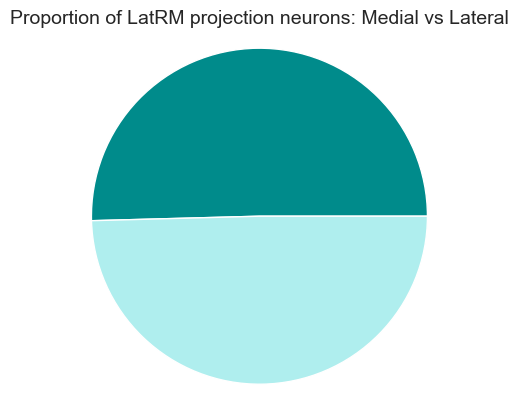

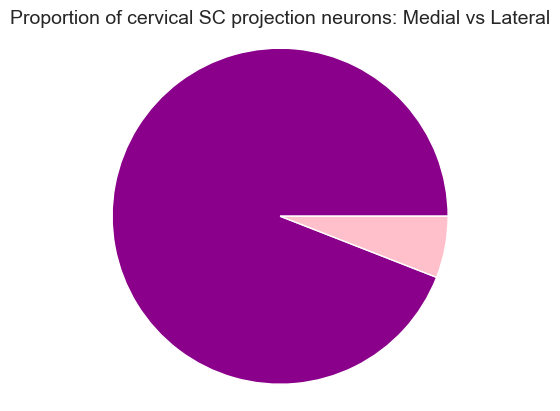

In [27]:
# pie plot to show the proportion of neurons in related regions

plt.pie([medio_latrm_csc[0],latero_latrm_csc[0]], colors = ['darkcyan', 'paleturquoise'])
plt.title('Proportion of LatRM projection neurons: Medial vs Lateral', fontsize = 14)
plt.axis('equal')
plt.show()

plt.pie([medio_latrm_csc[1],latero_latrm_csc[1]], colors = ['darkmagenta', 'pink'])
plt.title('Proportion of cervical SC projection neurons: Medial vs Lateral', fontsize = 14)
plt.axis('equal')
plt.show()

# Figure 2, 3 and S2 -- Distribution of cortical synapses

## load packages and data

In [30]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()
from sklearn.neighbors import KernelDensity
import scipy.stats as st
import glob
import os
from scipy.cluster.hierarchy import dendrogram, linkage
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
from statsmodels.stats.libqsturng import psturng
from sklearn.metrics.pairwise import cosine_similarity
import itertools
import scipy.cluster.hierarchy
import scipy.spatial.distance as ssd
from scipy.stats import f_oneway
import statsmodels.stats.multicomp as mc
import statsmodels.api as sa
import scikit_posthocs as sp
from statsmodels.formula.api import ols
from bioinfokit.analys import stat

from matplotlib import rc
rc("pdf", fonttype=42)

#root_path = root+r'\Fig 2, 3 and S2'
#datafile_path_ros = root_path + r'\rostral'
#datafile_path_int = root_path + r'\intermediate'
#datafile_path_cau = root_path + r'\caudal'

from pathlib import Path

root = Path("./Data")

root_path = root / "Fig 2, 3 and S2"
datafile_path_ros = root_path / "rostral"
datafile_path_int = root_path / "intermediate"
datafile_path_cau = root_path / "caudal"


class Injection_Sites():
    def __init__(self, datapath, filename):
        self.datapath = datapath
        self.filename = filename
        self.datapath_file = glob.glob(datapath +'\\'+ '*' + filename)
        
    def read_data(self):  
        if "xls" in self.filename[-4:]:
            data = pd.read_excel(self.datapath_file[0], index_col=0)
            return data
        if self.filename[-3:] == 'csv':
            data = pd.read_csv(self.datapath_file[0], index_col=0)
            return data
    
    def get_coordinate(self, good_sites=True):
        data_good = self.read_data()
            
        data_good.loc[:, "y"] = (data_good.get('y_max')+data_good.get('y_min'))/2
        data_good.loc[:, "x"] = (data_good.get('x_max')+data_good.get('x_min'))/2
            
        return data_good
    
    def cross_plot(self, good_sites=True, top_down=True, side_view=False, name=False, skip=None, exp=None):
        inj_site_coordinate = self.get_coordinate(good_sites)
        
        if skip is not None:
            for item in skip:
                inj_site_coordinate = inj_site_coordinate.loc[inj_site_coordinate.brain != item]
                
        fig = plt.figure(figsize=(20,20))
        ax = fig.gca()
        ax.plot([inj_site_coordinate["x_min"], inj_site_coordinate["x_max"]], [inj_site_coordinate["y"], inj_site_coordinate["y"]], color='red')
        ax.plot([inj_site_coordinate["x"], inj_site_coordinate["x"]], [inj_site_coordinate["y_min"], inj_site_coordinate["y_max"]], color='green')
        ax.scatter(inj_site_coordinate["x"], inj_site_coordinate["y"], c='blue')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        plt.axis('equal')

        if name is True:
            for point in inj_site_coordinate['brain']:
                ax.text(x=inj_site_coordinate.loc[inj_site_coordinate['brain']==point]["x"], 
                        y=inj_site_coordinate.loc[inj_site_coordinate['brain']==point]["y"], s=point, size=10)
        
        if exp == True:
            plt.savefig(f'crossplot_{self.filename[:-4]}.pdf')
            
    def rainbow_cross(self, good_sites=True, top_down=True, side_view=False, skip=None, name=False, exp=None, colormap="cool", data=None, exp_cbar=None, cbar=False, plot=True, min_max=None):
        inj_site_coordinate = self.get_coordinate(good_sites)
        
        if skip is not None:
            for item in skip:
                inj_site_coordinate = inj_site_coordinate.loc[inj_site_coordinate.brain != item]
                
        if data is None:
            raise Exception("Please specify a coloumn as data to plot")
        
        inj_site_coordinate.reset_index(drop=True, inplace=True)
        if min_max:
            minima = min_max[0]
            maxima = min_max[1]
        else:
            minima = min(inj_site_coordinate[data])
            maxima = max(inj_site_coordinate[data])
        norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima)
        mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=colormap)
        
        if cbar:
            cfig, cax = plt.subplots(figsize=(10, 1))
            matplotlib.colorbar.Colorbar(cax, mappable=mapper, orientation='horizontal')
            if exp_cbar is True:
                plt.savefig((f'cmap_{data}_{self.filename[:-4]}.pdf'))

        if plot:
            lst=[]
            for i in inj_site_coordinate[data]:
                lst.append(mapper.to_rgba(i))
            inj_site_coordinate["color"]=lst

            fig = plt.figure(figsize=(20,20))
            ax = fig.gca()
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            plt.axis('equal')

            for j in range(len(inj_site_coordinate[data])):
                color = np.array(inj_site_coordinate["color"][j])
                ax.scatter(inj_site_coordinate["x"][j], inj_site_coordinate["y"][j], color=color)
                ax.plot([inj_site_coordinate["x_min"][j], inj_site_coordinate["x_max"][j]], [inj_site_coordinate["y"][j], inj_site_coordinate["y"][j]], color=color)
                ax.plot([inj_site_coordinate["x"][j], inj_site_coordinate["x"][j]], [inj_site_coordinate["y_min"][j], inj_site_coordinate["y_max"][j]], color=color)
        
            if name is True:
                for point in inj_site_coordinate['brain']:
                    ax.text(x=inj_site_coordinate.loc[inj_site_coordinate['brain']==point]["x"], y=inj_site_coordinate.loc[inj_site_coordinate['brain']==point]["y"], s=point, size=10)
        
        if exp == True:
            plt.savefig(f'rainbow_{data}_{self.filename[:-4]}.pdf')
            
class Syn_Position(): #position data exported from imaris
    
    def __init__(self, data_path=None, filename=None, datadf=None):
        self.data_path = data_path
        self.filename = filename
        self.datadf = datadf
    
    def read_nor_data(self):
        data_filepath = glob.glob(self.data_path +'\\'+ '*' + self.filename)
            
        if '.xls' in self.filename:
            data = pd.read_excel(data_filepath[0], index_col=0)
        elif '.csv' in self.filename:
            data = pd.read_csv(data_filepath[0], index_col=0)
        else:
            return 'Only read xls or csv file'
        return data
            
    def split_data(self, one_side=True, left=None, right=None, nor=None, nordf=None):
        if nor is True:
            f_data = self.read_nor_data()
        elif nordf is True:
            f_data = self.datadf

        region = 'contra'
        return f_data, region
    
    def scatter_plot(self, xmin=-4.5, xmax=1, ymin=-2, ymax=2, size=2, exp=None, one_side=True, label=None, filled=None, delim=None, left=None, right=None, nor=True, nordf=None, section=None):
        data_sub, region = self.split_data(one_side=one_side, left=left, right=right, nor=nor, nordf=nordf)
            
        if nordf is True:
            x = data_sub['x']
            y = data_sub['y']
        else:
            x = data_sub['x']/1000
            y = data_sub['y']/1000
        
        fig = plt.figure(figsize=(10,10))
        ax = fig.gca()
        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymin, ymax)
        ax.scatter(x, y, s=size, c='black')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        plt.axis('equal')
        
        # Save plot
        if exp == True:
            if self.filename:
                plt.savefig(f'spot_{region}_{self.filename[:-4]}.pdf')
            else:
                plt.savefig(f'spot_{section}.pdf')
    
    def contour_plot(self, xmin=-2.5, xmax=0.5, ymin=-1, ymax=2, line_num=10, exp=None, one_side=True, label=None, filled=None, delim=None, left=None, right=None, nor=True, nordf=None, section=None, est_exp=None, plot=True):
        data_sub, region = self.split_data(one_side=one_side, left=left, right=right, nor=nor, nordf=nordf)

        xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
        positions = np.vstack([xx.ravel(), yy.ravel()])
        f_syn = np.reshape(np.zeros(100**2), xx.shape)
            
        if nordf is True:
            x = data_sub['x']
            y = data_sub['y']
        else:
            x = data_sub['x']/1000
            y = data_sub['y']/1000

        values = np.vstack([x, y])
        kernel = st.gaussian_kde(values)
        f = np.reshape(kernel(positions).T, xx.shape)
        f_syn += f
        if type(line_num)==list:
            f_syn /= f_syn.max()
        
        if plot:
            fig = plt.figure(figsize=(10,10))
            ax = fig.gca()
            ax.set_xlim(xmin, xmax)
            ax.set_ylim(ymin, ymax)
            # Contour plot
            cset = ax.contour(xx, yy, f_syn, line_num, colors='b')

            # Contourf plot
            if filled == True:
                cfset = ax.contourf(xx, yy, f_syn, cmap='Blues')
            ## Or kernel density estimate plot instead of the contourf plot
            #ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])

            # Label plot
            if label == True:
                ax.clabel(cset, inline=1, fontsize=10)

            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            plt.axis('equal')
        
        # Save plot
        if exp == True:
            if self.filename:
                plt.savefig(f'contour_{region}_{self.filename[:-4]}.pdf')
            else:
                plt.savefig(f'contour_{section}.pdf')
        
        if est_exp is True:    
            return f_syn
    
    def kde1d_x_plot(self, xmin=-2.5, xmax=0.5, bandwidth=0.1, exp=None, one_side=True, delim=None, left=None, right=None, nor=True, nordf=None, est_exp=None, plot=True):
        data_sub, region = self.split_data(one_side=one_side, left=left, right=right, nor=nor, nordf=nordf)
            
        x = np.array(data_sub['x']/1000)
        
        x_d = np.linspace(xmin, xmax, 100)
        kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
        kde.fit(np.reshape(x, (len(x),1)))
        logprob = kde.score_samples(x_d[:, None])
        if plot:
            plt.plot(x_d, np.exp(logprob))
            plt.ylim(-0.02, 2.3)
        
        # Save plot
        if exp == True:
            plt.savefig(f'kde1d_x_{region}_{self.filename[:-4]}.pdf')
            
        if est_exp is True:
            return pd.DataFrame({'x':x_d, 'est':np.exp(logprob)})

    def kde1d_y_plot(self, ymin=-0.5, ymax=2.3, bandwidth=0.1, exp=None, one_side=True, delim=None, left=None, right=None, nor=True, nordf=None, est_exp=None, plot=True):
        data_sub, region = self.split_data(one_side=one_side, left=left, right=right, nor=nor, nordf=nordf)
            
        y = np.array(data_sub['y']/1000)
        
        y_d = np.linspace(ymin, ymax, 100)
        kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
        kde.fit(np.reshape(y, (len(y),1)))
        logprob = kde.score_samples(y_d[:, None])
        if plot:
            plt.plot(y_d, np.exp(logprob))
            plt.ylim(-0.02, 2.3)
        
        # Save plot
        if exp == True:
            plt.savefig(f'kde1d_y_{region}_{self.filename[:-4]}.pdf') 
            
        if est_exp is True:
            return pd.DataFrame({'y':y_d, 'est':np.exp(logprob)})

## plot the injection sites and the synapse number

In [ ]:
###Modified this now (matwku)

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

class Injection_Sites:
    def __init__(self, datapath, filename):
        self.datapath = Path(datapath)
        self.filename = filename
        # match e.g. *injection_site.csv
        self.datapath_file = list(self.datapath.glob(f"*{self.filename}"))
        if not self.datapath_file:
            raise FileNotFoundError(
                f"No file matching '*{self.filename}' in {self.datapath}"
            )
        self._df = None

    def read_data(self):
        fp = self.datapath_file[0]
        suf = fp.suffix.lower()
        if suf in (".xls", ".xlsx"):
            self._df = pd.read_excel(fp, index_col=0)
        elif suf == ".csv":
            self._df = pd.read_csv(fp, index_col=0)
        else:
            raise ValueError(f"Unsupported file extension: {suf} ({fp})")
        return self._df

    def get_coordinate(self):
        """Ensure x,y exist (compute midpoints from *_min/*_max if needed)."""
        df = (self._df if self._df is not None else self.read_data()).copy()
        if ("x" not in df.columns or "y" not in df.columns) and \
           all(c in df.columns for c in ("x_min","x_max","y_min","y_max")):
            df["x"] = (df["x_min"] + df["x_max"]) / 2
            df["y"] = (df["y_min"] + df["y_max"]) / 2
        # sanity check
        for col in ("x","y","x_min","x_max","y_min","y_max"):
            if col not in df.columns:
                # only require x,y and the four mins/maxes for drawing crosses
                pass
        if "x" not in df.columns or "y" not in df.columns:
            raise KeyError("Columns 'x' and 'y' are required or derivable from x_min/x_max/y_min/y_max.")
        return df

    def rainbow_cross(self, data, colormap="plasma", min_max=None,
                      name=False, skip=None, export_pdf=False, show_cbar=True):
        """Color-code crosses by numeric column `data` (e.g. 'num_rostral' or 'lat_ind')."""
        df = self.get_coordinate()
        if skip and "brain" in df.columns:
            for item in skip:
                df = df.loc[df["brain"] != item]

        if data not in df.columns:
            raise KeyError(f"Column '{data}' not found. Available: {list(df.columns)}")

        # color scaling
        if min_max:
            vmin, vmax = float(min_max[0]), float(min_max[1])
        else:
            vmin, vmax = float(np.nanmin(df[data])), float(np.nanmax(df[data]))
        norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
        mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=colormap)

        fig = plt.figure(figsize=(12,12))
        ax = fig.gca()
        ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_aspect("equal", adjustable="box")

        # If cross arms available, draw them; otherwise just scatter the points.
        has_bounds = all(c in df.columns for c in ("x_min","x_max","y_min","y_max"))
        for j in range(len(df)):
            color = mapper.to_rgba(df[data].iloc[j])
            ax.scatter(df["x"].iloc[j], df["y"].iloc[j], color=color, s=20)
            if has_bounds:
                ax.plot([df["x_min"].iloc[j], df["x_max"].iloc[j]],
                        [df["y"].iloc[j],     df["y"].iloc[j]], color=color)
                ax.plot([df["x"].iloc[j],     df["x"].iloc[j]],
                        [df["y_min"].iloc[j], df["y_max"].iloc[j]], color=color)

        if name and "brain" in df.columns:
            for _, r in df.iterrows():
                ax.text(r["x"], r["y"], str(r["brain"]), fontsize=9)

        if show_cbar:
            cb = plt.colorbar(mapper, ax=ax); cb.set_label(data)

        if export_pdf:
            fig.savefig(f"rainbow_{data}_{self.filename.rsplit('.',1)[0]}.pdf", bbox_inches="tight")

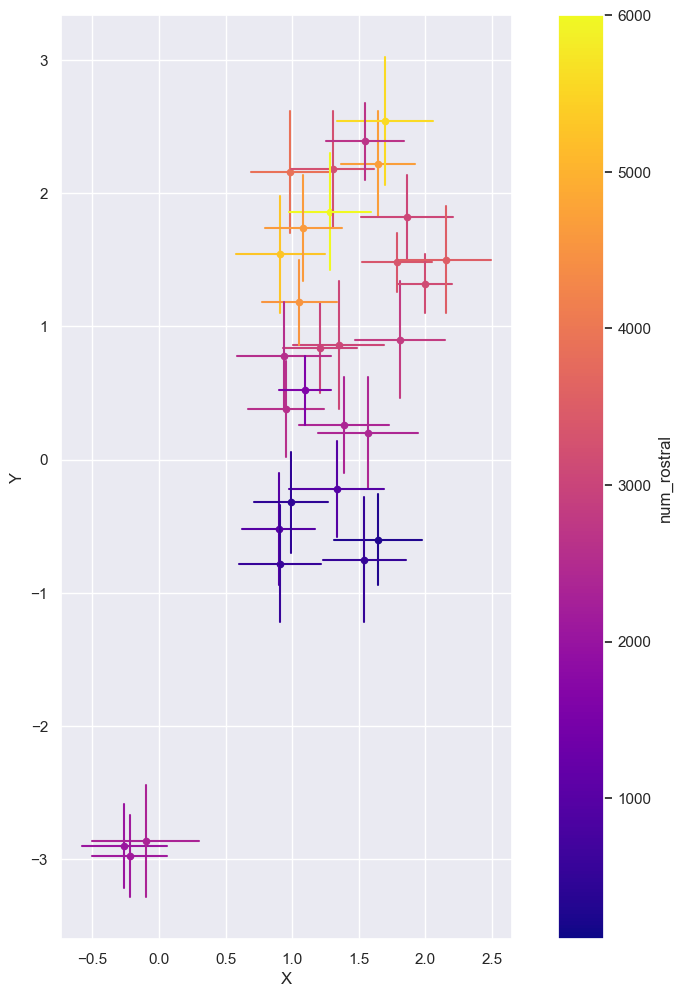

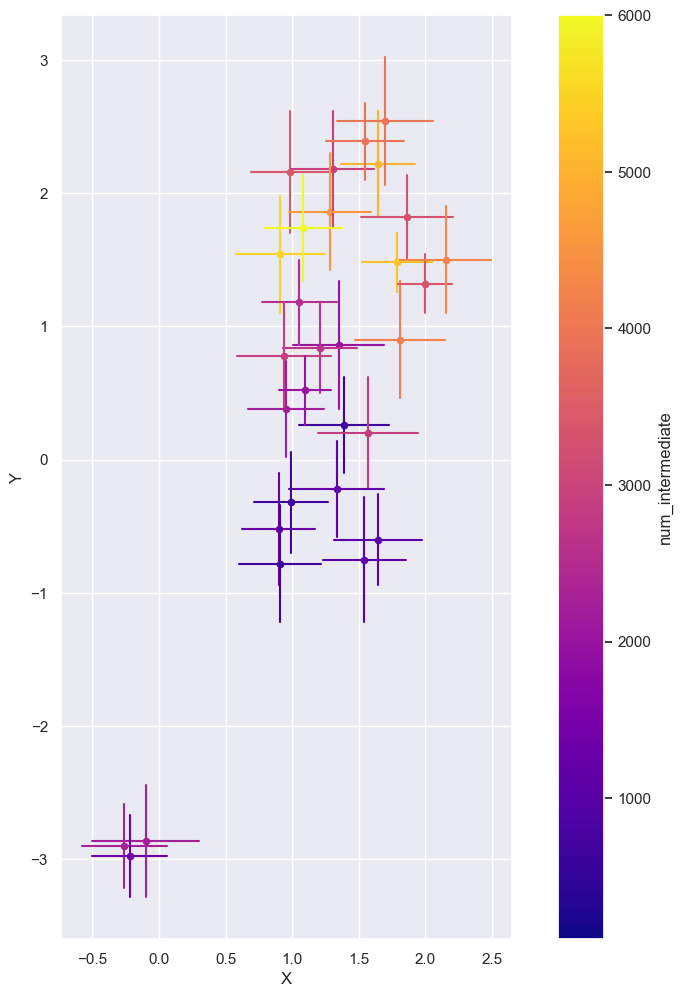

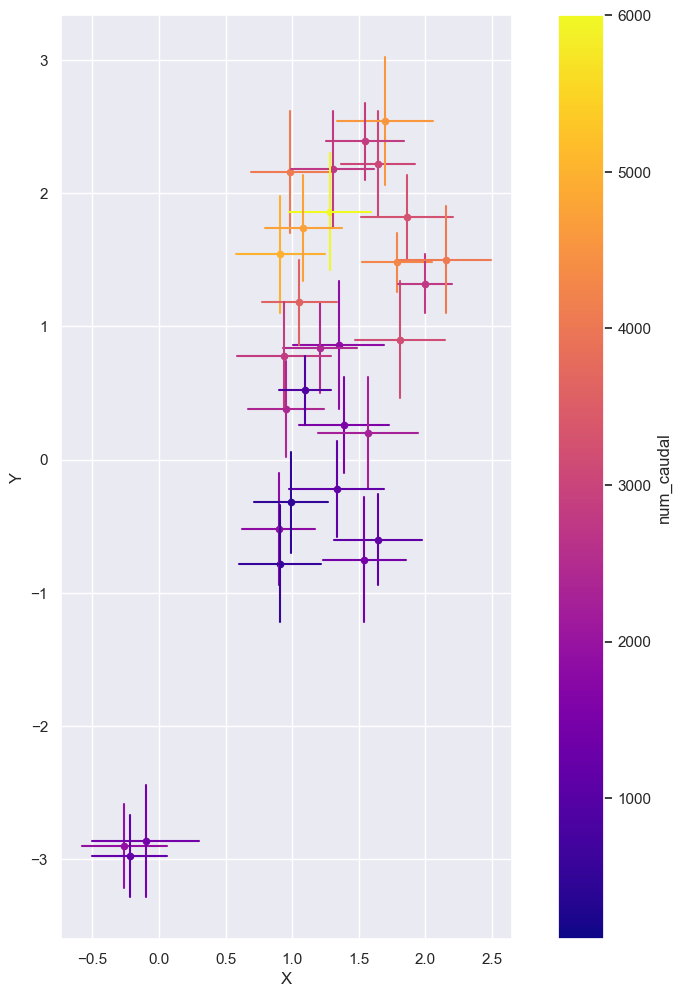

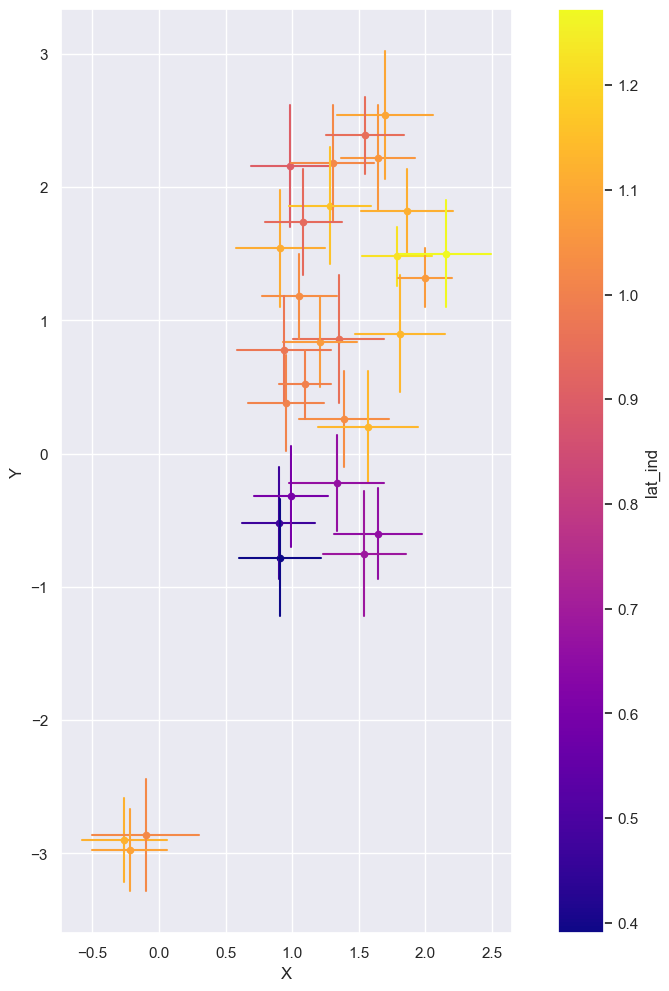

In [ ]:
###ADDED this now (matwku)

# Example: use your Fig 2, 3 and S2 folder
root_path = fig23_path  # or Path("/.../Fig 2, 3 and S2")

inj_site = Injection_Sites(root_path, "injection_site.csv")
inj_site.read_data()  # loads data once

# plot the injection sites color coded with synapse number and lateral index
for bs in bs_lst:  # e.g. ['rostral','intermediate','caudal']
    inj_site.rainbow_cross(data=f"num_{bs}", colormap="plasma", min_max=[100, 6000])

inj_site.rainbow_cross(data="lat_ind", colormap="plasma")

In [ ]:
###ADDED this now (matwku)

import matplotlib.pyplot as plt
import numpy as np

class Injection_Sites:
    def __init__(self, datapath, filename):
        self.datapath = datapath
        self.filename = filename
        self.data = None

    def read_data(self):
        import pandas as pd
        import os
        file_path = os.path.join(self.datapath, self.filename)
        self.data = pd.read_csv(file_path)
        return self.data

    def rainbow_cross(self, data, colormap='plasma', min_max=None):
        if self.data is None:
            raise ValueError("No data loaded. Call read_data() first.")

        if data not in self.data.columns:
            raise ValueError(f"Column '{data}' not found in data.")

        x = self.data['x']   # replace with your actual x coordinate column name
        y = self.data['y']   # replace with your actual y coordinate column name
        c = self.data[data]

        if min_max:
            vmin, vmax = min_max
        else:
            vmin, vmax = np.min(c), np.max(c)

        plt.scatter(x, y, c=c, cmap=colormap, vmin=vmin, vmax=vmax)
        plt.colorbar(label=data)
        plt.xlabel("X position")
        plt.ylabel("Y position")
        plt.title(f"Rainbow cross plot for {data}")
        plt.show()

In [ ]:
## plot the injection sites color coded with synapse number and lateral index
#for bs in bs_lst:
    inj_site.rainbow_cross(data=f"num_{bs}", colormap='plasma', min_max=[100, 6000])

#inj_site.rainbow_cross(data="lat_ind", colormap='plasma')

AttributeError: 'Injection_Sites' object has no attribute 'rainbow_cross'

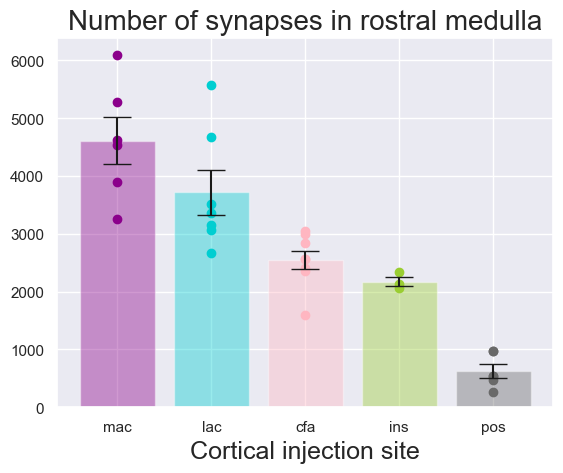

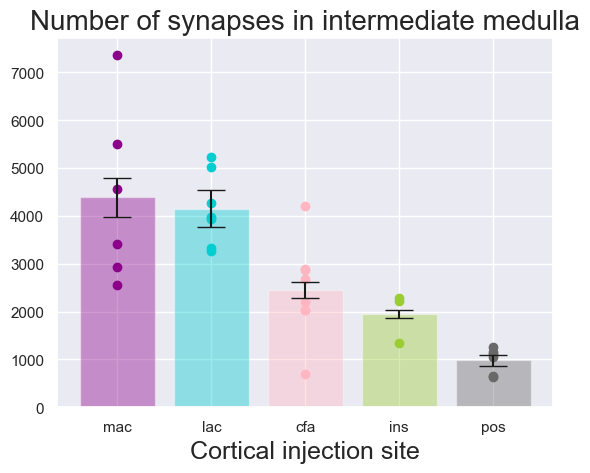

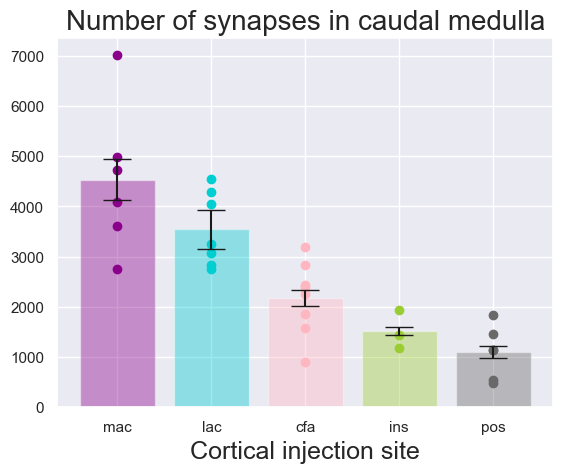

In [37]:
for bs in bs_lst:
    plt.title(f'Number of synapses in {bs} medulla', fontsize = 20)
    plt.xlabel('Cortical injection site', fontsize = 18)
    plt.bar(ctx_lst, [ctx[f'num_{bs}'].mean() for ctx in ctx_table], yerr=[ctx.num_rostral.sem() for ctx in ctx_table], capsize=10, error_kw={'markeredgewidth':1}, alpha = 0.4, color = colors)
    for idx, ctx in enumerate(ctx_lst):
        plt.scatter([ctx]*ctx_table[idx].shape[0], ctx_table[idx][f'num_{bs}'].values, color = colors[idx])
    plt.show()

## plot the distribution of synapses

In [38]:
def kde1d_group(inj_site_data, datafile_path, axis, xmin, xmax, ymin, ymax, group=None, plot=True, exp=None, est_exp=None, peak_exp=None):
    est_group = pd.DataFrame()
    peak = []
    if group:
        group_data = inj_site_data[inj_site_data.region==group].reset_index(drop=True)
    else:
        group_data = inj_site_data
        
    for i in group_data.brain:
        item = Syn_Position(datafile_path, i+'.csv')
        
        if axis== 'x' or axis== 'X':
            est = item.kde1d_x_plot(xmin, xmax, est_exp=True, plot=plot)
            est_group["x"]=est.x
            est_group[i]=est.est
            est_group_max = est.iloc[est.idxmax()['est']]['x']
            
        elif axis=='y' or axis=='Y':
            est = item.kde1d_y_plot(ymin, ymax, est_exp=True, plot=plot)
            est_group["y"]=est.y
            est_group[i]=est.est
            est_group_max = est.iloc[est.idxmax()['est']]['y']
            
        else:
            print("Please specify axis")
        
        peak.append(est_group_max)
            
    if plot:
        plt.legend(est_group.columns[1:])
    if exp==True:
        if axis=='x':
            plt.savefig(f'syn_kde1d_x_{group}.pdf')
        elif axis=='y':
            plt.savefig(f'syn_kde1d_y_{group}.pdf')
            
    if est_exp==True:
        return est_group
    
    if peak_exp == True:
        return peak

In [39]:
# plot synaptic distribution from individual cortical site

syn_mac_2 = Syn_Position(datafile_path_ros, 'mac_2.csv') 
syn_mac_2.scatter_plot()
syn_mac_2.contour_plot()

#distribution along ML axis
syn_mac_2.kde1d_x_plot()

#distribtuion along DV axis
syn_mac_2.kde1d_y_plot()

TypeError: unsupported operand type(s) for +: 'PosixPath' and 'str'

In [ ]:
# plot synaptic distribution from a group of cortical sites in ML axis
kde1d_group(inj_site_table, datafile_path_ros, axis='x', xmin=-2.5, xmax=0.5, ymin=-0.5, ymax=1.4, group='mac')

In [ ]:
# plot synaptic distribution from a group of cortical sites in DV axis
kde1d_group(inj_site_table, datafile_path_ros, axis='y', xmin=-2.5, xmax=0.5, ymin=-0.5, ymax=2.3, group='lac')

## cosine similarity and clustering analysis

In [ ]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

def kde2d(inj_site_data, datafile_path, xmin, xmax, ymin, ymax):
    est2d = kde2d_matrix(inj_site_data, datafile_path, xmin, xmax, ymin, ymax)
    est2d_out = {}
    for key in est2d.keys():
        est2d_out[key]=np.reshape(est2d[key], (1,-1))
    return est2d_out

def kde2d_to_1d(data):
    #data should be a dictionary of matrix
    out_1d = {}
    for key in data.keys():
        out_1d[key]=np.reshape(data[key], (1,-1))
    return out_1d

def kde2d_matrix(inj_site_data, datafile_path, xmin, xmax, ymin, ymax):
    est2d = {}
    z = 0

    for i in inj_site_data.brain:
        reg = inj_site_data['region'].iloc[z]
        item = Syn_Position(datafile_path, i+'.csv')
        label = f'{reg}{z}'
        est2d[label]=item.contour_plot(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, est_exp=True, plot=False)
        z+=1
    return est2d

def cosine_similarity_matrix(data, exp=None, cos_exp=None, section=None):
    corrmatrix2d = pd.DataFrame(index=data.keys())
    for i, j in itertools.product(data.keys(), data.keys()):
        x = data[i]
        y = data[j]
        corrmatrix2d.loc[i,j] = cosine_similarity(x, y)[0][0]

    sns.clustermap(corrmatrix2d, cmap = 'plasma')
    if exp==True:
        plt.savefig(f'cluster_kde2d_cossim_{section}.pdf')
    if cos_exp==True:
        return corrmatrix2d
    
def cosine_distance_matrix(data, exp=None, cos_exp=None, section=None):
    corrmatrix2d_dis = pd.DataFrame(index=data.keys())
    for i, j in itertools.product(data.keys(), data.keys()):
        x = data[i]
        y = data[j]
        if i == j:
            corrmatrix2d_dis.loc[i,j] = 0
        else:
            corrmatrix2d_dis.loc[i,j] = 1-cosine_similarity(x, y)[0][0]

    sns.clustermap(corrmatrix2d_dis, cmap = 'plasma')
    if exp==True:
        plt.savefig(f'cluster_kde2d_cosdis_{section}.pdf')
    if cos_exp==True:
        return corrmatrix2d_dis
    
def cosine_distance_dendrogram(data, exp=None, section=None):
    corrmatrix2d_dis = cosine_distance_matrix(data, cos_exp=True)
    # convert the redundant n*n square matrix form into a condensed nC2 array
    distArray = ssd.squareform(corrmatrix2d_dis)
    HAC= scipy.cluster.hierarchy.linkage(distArray, method = 'ward')
    plt.figure(figsize = (20,7))
    a = fancy_dendrogram(
        HAC,
        labels = list(corrmatrix2d_dis.keys()), 
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=20.,  # font size for the x axis labels
        annotate_above = 0.25
    )
    if exp==True:
        plt.savefig(f'cluster_2d_dis_{section}.pdf')

In [ ]:
# calculate and vectorize the synpatic distribtuion for all injection sites in all levels
est2d_ros = kde2d(inj_site.read_data(), datafile_path_ros, xmin=-2.5, xmax=0.5, ymin=-0.5, ymax=1.4)
est2d_int = kde2d(inj_site.read_data(), datafile_path_int, xmin=-2.1, xmax=0.5, ymin=-0.5, ymax=2.1)
est2d_cau = kde2d(inj_site.read_data(), datafile_path_cau, xmin=-3, xmax=0.5, ymin=-0.5, ymax=3)

# generate the synaptic distribution in 3D based on 2D distribution at multiple levels
est3d = {}
for item in est2d_ros.keys():
    est_ros = est2d_ros[item]
    est_int = est2d_int[item]
    est_cau = est2d_cau[item]
    est3d[item] = np.concatenate((est2d_ros[item], est2d_int[item], est2d_cau[item]), axis=1)

In [ ]:
# clustering analysis
corrmatrix2d_distance=cosine_distance_dendrogram(est2d_ros)

In [ ]:
# similarity matrix in 3D
cosine_similarity_matrix(est3d)

## dorsal-ventral synaptic peak

In [ ]:
# find the peak in DV axis
inj_site_table['y_peak_rostral'] = kde1d_group(inj_site_table, datafile_path_ros, axis='y', xmin=-2.5, xmax=0.5, ymin=-0.5, ymax=2.3, peak_exp=1, plot=0)
inj_site_table['y_peak_intermediate'] = kde1d_group(inj_site_table, datafile_path_int, axis='y', xmin=-2.5, xmax=0.5, ymin=-0.5, ymax=2.3, peak_exp=1, plot=0)
inj_site_table['y_peak_caudal'] = kde1d_group(inj_site_table, datafile_path_cau, axis='y', xmin=-2.5, xmax=0.5, ymin=-0.5, ymax=2.3, peak_exp=1, plot=0)
inj_sum = inj_site_table.groupby('region')

In [ ]:
# plot the DV peak for all groups

ctx_lst = ['ins',"lac","mac","cfa"]
ctx_table = [inj_sum.get_group(ctx) for ctx in ctx_lst]
colors = ['yellowgreen', 'darkturquoise', 'darkmagenta', 'lightpink']
plt.figure(figsize = (15,15), facecolor = 'w')
plt.title('Location of peak of distribution of synapses on DV axis', fontsize = 20)

plt.bar([f'{ctx}_\n{bs}' for ctx in ctx_lst for bs in bs_lst],
        [ctx[f'y_peak_{bs}'].mean() for ctx in ctx_table for bs in bs_lst],
        yerr=[ctx[f'y_peak_{bs}'].sem() for ctx in ctx_table for bs in bs_lst],
        color = np.repeat(colors,3),
        capsize=10, error_kw={'markeredgewidth':1}, alpha = 0.4)

for bs in bs_lst:
    for idx, ctx in enumerate(ctx_lst):
        plt.scatter([f'{ctx}_\n{bs}']*len(ctx_table[idx]), ctx_table[idx][f'y_peak_{bs}'].values, color = colors[idx])
        
plt.grid(b=None)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 16)
plt.xlabel('Cortical injection site', fontsize = 18)
plt.ylabel('Dorso-ventral location (mm)',  fontsize = 18)
plt.show()

## statistics

In [ ]:
# for number of synapses in different medulla levels

for bs in bs_lst:
    f_value = f_oneway(inj_sum.get_group('mac')[f'num_{bs}'], inj_sum.get_group('lac')[f'num_{bs}'], 
         inj_sum.get_group('cfa')[f'num_{bs}'], inj_sum.get_group('ins')[f'num_{bs}'], 
         inj_sum.get_group('pos')[f'num_{bs}'])
    print(f_value)
    comp = mc.MultiComparison(pd.to_numeric(inj_site_table[f'num_{bs}']), inj_site_table['region'])
    post_hoc_res = comp.tukeyhsd()
    print(post_hoc_res.summary())
    model = ols(f'num_{bs} ~ C(region)', data=inj_site_table).fit()
    w, pvalue = st.shapiro(model.resid)
    print(w, pvalue)

In [ ]:
# DV peaks across three levels
inj_site_test = inj_site_table[inj_site_table['region']!='pos']
y_peak_lst = list(inj_site_test.y_peak_rostral) + list(inj_site_test.y_peak_intermediate) + list(inj_site_test.y_peak_caudal)
region_lst = list(inj_site_test.region)*3
bs_lst = np.repeat(bs_lst, len(inj_site_test))
y_peak_test = pd.DataFrame({
    'region': region_lst,
    'bs': bs_lst,
    'y_peak': y_peak_lst})

model = ols('y_peak ~ C(bs) + C(region) + C(bs):C(region)', data=y_peak_test).fit()
anova_table = sa.stats.anova_lm(model, typ=3)
print(anova_table)

res = stat()
res.tukey_hsd(df=y_peak_test, res_var='y_peak', xfac_var='region', anova_model='y_peak ~ C(bs) + C(region) + C(bs):C(region)')
print(res.tukey_summary)

w, pvalue = st.shapiro(model.resid)
print(w, pvalue)
sa.qqplot(res.anova_std_residuals, line='45')
plt.show()

# Figure 4 and S3 -- MouseLight analysis

## load packages and data

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from scipy import stats as st
from matplotlib import cm
import matplotlib
#import neurom.io.swc as swc

datapath = root+r'\Fig 4 and S3'

bregma = [5400, 0, 5700]

striatum = '477'
medulla = '354'
stn = '470'
suc = '294'
pg = '931'
thalamus = '549'
rn = '214'
snr = '381'
py = '190'
regions = [medulla, thalamus, suc, striatum, pg, stn, rn, snr, py]
ctxs = ['mac', 'lac', 'ins']
region_names = ['Medulla', 'Thalamus', 'SuC', 'Striatum', 'Pontine_gray', 'STN', 'RN', 'SNr', 'pyramidal_tract']

def allen_to_paxinos(coords_allen):
    #coords need to be [ap, dv, ml]
    bregma = [5400, 0, 5700]
    
    if type(coords_allen) == list:
        coords_paxinos = np.zeros(len(coords_allen))
        coords_paxinos[0] = (bregma[0] - coords_allen[0])/1000
        coords_paxinos[1] = (coords_allen[1] - bregma[1])/1000
        coords_paxinos[2] = (coords_allen[2] - bregma[2])/1000
    
    elif type(coords_allen) == np.ndarray:
        coords_paxinos = np.zeros(coords_allen.shape)
        coords_paxinos[:, 0] = (bregma[0] - coords_allen[:, 0])/1000
        coords_paxinos[:, 1] = (coords_allen[:, 1] - bregma[1])/1000
        coords_paxinos[:, 2] = (coords_allen[:, 2] - bregma[2])/1000
    
    return coords_paxinos

def read_mouselight(filename):
    with open(filename) as f:
        neurons = json.load(f)
        
    return neurons

def get_allen_info(filename, neuron):
    neurons = read_mouselight(filename)
    allen_info = neurons['neurons'][neuron]['allenInformation']
    
    return allen_info

def get_medulla_id(filename, neuron, medulla_allen_id='354'):
    in_medulla_allen_ids = []
    allen_info = get_allen_info(filename, neuron)
    for id in range(len(allen_info)):
        id_list = list(filter(None, allen_info[id]['structureIdPath'].split('/')))
        if medulla_allen_id in id_list:
            in_medulla_allen_ids.append(allen_info[id]['allenId'])
    print ('These are the regions in the medulla for given neuron')
    for id in range(len(allen_info)):
        if allen_info[id]['allenId'] in in_medulla_allen_ids:
            print(allen_info[id]['safeName'])
        
    return in_medulla_allen_ids

def get_terminals(filename, neuron):
    neurons = read_mouselight(filename)
    axon_sample_list = neurons['neurons'][neuron]['axon']
    
    parent_id = []
    all_samples = np.arange(0, len(axon_sample_list), 1) + 1
    for sample in range(len(axon_sample_list)):
        parent_id.append(axon_sample_list[sample]['parentNumber'])
    unique_parent_samples = np.unique(parent_id)
    axon_terminals = list(set(all_samples) - set(unique_parent_samples))
    print(f'Found {len(axon_terminals)} axon terminals')
    
    axon_terminal_sample_ind = np.array(axon_terminals) - 1 
    #since sample numbers begin with 1, subtract 1 to get the sample index
    
    return axon_terminal_sample_ind

def get_collaterals(filename, neuron):
    neurons = read_mouselight(filename)
    axon_sample_list = neurons['neurons'][neuron]['axon']     
    parent_id = []
    all_samples = np.arange(0, len(axon_sample_list), 1) + 1
    for sample in range(len(axon_sample_list)):
        parent_id.append(axon_sample_list[sample]['parentNumber'])
    unique_parent_samples, children_counts = np.unique(parent_id, return_counts=True)
    branches = unique_parent_samples[children_counts > 1]
    print(f'Found {len(branches)} branches in whole brain')
    branches_sample_ind = np.array(branches) - 1
    return branches_sample_ind
    
def get_axons(filename, neuron):
    neurons = read_mouselight(filename)
    axon_sample_list = neurons['neurons'][neuron]['axon']
    
    parent_id = []
    all_samples = np.arange(0, len(axon_sample_list), 1) + 1
    
    axon_sample_ind = all_samples - 1 
    #since sample numbers begin with 1, subtract 1 to get the sample index
    
    return axon_sample_ind

def get_neuron_id(filename, neuron):
    neurons = read_mouselight(filename)
    neuron_id = neurons['neurons'][neuron]['idString']
    
    return neuron_id

def get_soma(filename, neuron):
    neurons = read_mouselight(filename)
    soma = neurons['neurons'][neuron]['soma']
    soma_coord = [soma['z'], soma['y'], soma['x']] #AP, DV, ML
    
    return soma_coord  
    
def get_ctx_region(filename, neuron):
    soma_coord = get_soma(filename, neuron)

    #coords need to be a numpy array [ap, dv, ml]
    bregma = [5400, 0, 5700]
    ap = (bregma[0] - soma_coord[0])/1000
    dv = (soma_coord[1] - bregma[1])/1000
    ml = abs((soma_coord[2] - bregma[2])/1000)

    if (ap>0.865) & (ml<1.5):
        ctx = 'mac'
    elif (ap<0.865) & (ap>0) & (ml<3):
        ctx = 'cfa'
    elif (ml>1.5) & (ap>0.1) & (ml<3):
        ctx = 'lac'
    elif (ap<0):
        ctx = 'pos'
    else:
        ctx = 'other'

    return ctx

def get_terminals_in_medulla(filename, neuron, savedir, contra=1, exp=None, bregma = [5400, 0, 5700]):
    neurons = read_mouselight(filename)
    in_medulla_allen_ids = get_medulla_id(filename, neuron)
    axon_terminal_sample_ind = get_terminals(filename, neuron)
    axon_sample_list = neurons['neurons'][neuron]['axon']
    soma_coord = get_soma(filename, neuron)
    soma_ml = soma_coord[2] - bregma[2]
    neuron_id = get_neuron_id(filename, neuron)
    ctx = get_ctx_region(filename, neuron)
    
    terminal_coords = []
    for terminal in axon_terminal_sample_ind:
        terminal_allen_id = axon_sample_list[terminal]['allenId']
        if terminal_allen_id in in_medulla_allen_ids:
            coord = [[axon_sample_list[terminal]['z'], axon_sample_list[terminal]['y'], axon_sample_list[terminal]['x']]]
            if contra:
                term_ml = coord[0][2] - bregma[2]
                if term_ml * soma_ml > 0:
                    continue
                else:
                    terminal_coords.extend(coord)
            else:
                terminal_coords.extend(coord)
        
    print(f'There are {len(terminal_coords)} terminals in the medulla')

    if terminal_coords:
        if exp:
            if savedir:
                savepath = os.path.join(savedir, f'{ctx}_terminal_coords_{neuron_id}.npy')
                np.save(os.path.join(savedir, f'{ctx}_terminal_coords_{neuron_id}.npy'), np.array(terminal_coords).astype(int))

def get_terminals_in_region(filename, neuron, savedir, contra=1, ipsi = 0, exp=None, bregma = [5400, 0, 5700], region = '354'):
    neurons = read_mouselight(filename)
    in_medulla_allen_ids = get_medulla_id(filename, neuron, medulla_allen_id = region)
    axon_terminal_sample_ind = get_terminals(filename, neuron)
    axon_sample_list = neurons['neurons'][neuron]['axon']
    soma_coord = get_soma(filename, neuron)
    soma_ml = soma_coord[2] - bregma[2]
    neuron_id = get_neuron_id(filename, neuron)
    ctx = get_ctx_region(filename, neuron)
    
    terminal_coords = []
    for terminal in axon_terminal_sample_ind:
        terminal_allen_id = axon_sample_list[terminal]['allenId']
        if terminal_allen_id in in_medulla_allen_ids:
            coord = [[axon_sample_list[terminal]['z'], axon_sample_list[terminal]['y'], axon_sample_list[terminal]['x']]]
            if contra:
                term_ml = coord[0][2] - bregma[2]
                if term_ml * soma_ml > 0:
                    continue
                else:
                    terminal_coords.extend(coord)
            elif ipsi:
                term_ml = coord[0][2] - bregma[2]
                if term_ml * soma_ml < 0:
                    continue
                else:
                    terminal_coords.extend(coord)
            else:
                terminal_coords.extend(coord)
        
    print(f'There are {len(terminal_coords)} terminals')

    if terminal_coords:
        if exp:
            if savedir:
                savepath = os.path.join(savedir, f'{ctx}_{region}_terminal_coords_{neuron_id}.npy')
                np.save(os.path.join(savedir, f'{ctx}_{region}_terminal_coords_{neuron_id}.npy'), np.array(terminal_coords).astype(int))        
                
def get_collaterals_in_region(filename, neuron, savedir, contra=1, ipsi = 0, exp=None, bregma = [5400, 0, 5700], region = '354'):
    neurons = read_mouselight(filename)
    in_medulla_allen_ids = get_medulla_id(filename, neuron, medulla_allen_id = region)
    axon_terminal_sample_ind = get_collaterals(filename, neuron)
    axon_sample_list = neurons['neurons'][neuron]['axon']
    soma_coord = get_soma(filename, neuron)
    soma_ml = soma_coord[2] - bregma[2]
    neuron_id = get_neuron_id(filename, neuron)
    ctx = get_ctx_region(filename, neuron)
    print(f'processing {len(axon_terminal_sample_ind)} branches')
    terminal_coords = []
    for terminal in axon_terminal_sample_ind:
        terminal_allen_id = axon_sample_list[terminal]['allenId']
        if terminal_allen_id in in_medulla_allen_ids:
            coord = [[axon_sample_list[terminal]['z'], axon_sample_list[terminal]['y'], axon_sample_list[terminal]['x']]]
            if contra:
                term_ml = coord[0][2] - bregma[2]
                if term_ml * soma_ml > 0:
                    continue
                else:
                    terminal_coords.extend(coord)
            elif ipsi:
                term_ml = coord[0][2] - bregma[2]
                if term_ml * soma_ml < 0:
                    continue
                else:
                    terminal_coords.extend(coord)
            else:
                terminal_coords.extend(coord)
        
    print(f'There are {len(terminal_coords)} collaterals in region')

    if terminal_coords:
        if exp:
            if savedir:
                savepath = os.path.join(savedir, f'{ctx}_{region}_collaterals_coords_{neuron_id}.npy')
                np.save(os.path.join(savedir, f'{ctx}_{region}_collaterals_coords_{neuron_id}.npy'), np.array(terminal_coords).astype(int))

def get_collaterals_in_pyr(filename, neuron, savedir, contra=1, ipsi = 0, exp=None, bregma = [5400, 0, 5700], region = '354'):
    region = '190'
    neurons = read_mouselight(filename)
    in_medulla_allen_ids = get_medulla_id(filename, neuron, medulla_allen_id = region)
    axon_terminal_sample_ind = get_collaterals(filename, neuron)
    axon_sample_list = neurons['neurons'][neuron]['axon']
    soma_coord = get_soma(filename, neuron)
    soma_ml = soma_coord[2] - bregma[2]
    neuron_id = get_neuron_id(filename, neuron)
    ctx = get_ctx_region(filename, neuron)
    print(f'Proessing {len(axon_terminal_sample_ind)} branches')
    terminal_coords = []
    for terminal in axon_terminal_sample_ind:
        terminal_allen_id = axon_sample_list[terminal]['allenId']
        coord = [[axon_sample_list[terminal]['z'], axon_sample_list[terminal]['y'], axon_sample_list[terminal]['x']]]
        pax_coord  = allen_to_paxinos(coord[0])
        term_ml = coord[0][2] - bregma[2]
        
        if np.abs(term_ml) < 500 and pax_coord[0]< -3.5:
            terminal_coords.extend(coord)
        
    print(f'There are {len(terminal_coords)} putative collaterals in pyramidal tract')

    if terminal_coords:
        if exp:
            if savedir:
                savepath = os.path.join(savedir, f'{ctx}_{region}_collaterals_coords_{neuron_id}.npy')
                np.save(os.path.join(savedir, f'{ctx}_{region}_collaterals_coords_{neuron_id}.npy'), np.array(terminal_coords).astype(int))
                       
        
def get_axons_in_medulla(filename, neuron, savedir, contra=1, exp=None, bregma = [5400, 0, 5700]):
    neurons = read_mouselight(filename)
    in_medulla_allen_ids = get_medulla_id(filename, neuron)
    axon_terminal_sample_ind = get_axons(filename, neuron)
    axon_sample_list = neurons['neurons'][neuron]['axon']
    soma_coord = get_soma(filename, neuron)
    soma_ml = soma_coord[2] - bregma[2]
    neuron_id = get_neuron_id(filename, neuron)
    ctx = get_ctx_region(filename, neuron)
    
    terminal_coords = []
    for terminal in axon_terminal_sample_ind:
        terminal_allen_id = axon_sample_list[terminal]['allenId']
        if terminal_allen_id in in_medulla_allen_ids:
            coord = [[axon_sample_list[terminal]['z'], axon_sample_list[terminal]['y'], axon_sample_list[terminal]['x']]]
            if contra:
                term_ml = coord[0][2] - bregma[2]
                if term_ml * soma_ml > 0:
                    continue
                else:
                    terminal_coords.extend(coord)
            else:
                terminal_coords.extend(coord)
        
    print(f'There are {len(terminal_coords)} axon samples in the medulla')

    if terminal_coords:
        if exp:
            if savedir:
                savepath = os.path.join(savedir, f'{ctx}_axon_coords_{neuron_id}.npy')
                np.save(os.path.join(savedir, f'{ctx}_axon_coords_{neuron_id}.npy'), np.array(terminal_coords).astype(int))
        
def run_all_neurons(filename, savedir, exp=None, terminal=None, axon=None, contra = 1):
    neurons = read_mouselight(filename)
    for nn in range(len(neurons['neurons'])):
        neuron_id = neurons['neurons'][nn]['idString']
        print(f'{neuron_id}')
        if terminal:
            get_terminals_in_medulla(filename, nn, savedir, exp=exp)
        if axon: 
            get_axons_in_medulla(filename, nn, savedir, exp=exp)
        
def run_all_neurons_region(filename, savedir, exp=None, terminal=None, axon=None, collateral = None, region = '354', contra = 1, ipsi = 0):
    neurons = read_mouselight(filename)
    for nn in range(len(neurons['neurons'])):
        neuron_id = neurons['neurons'][nn]['idString']
        print(f'{neuron_id}')
        if terminal:
            get_terminals_in_region(filename, nn, savedir, exp=exp,contra = contra, ipsi = ipsi, region = region)
        if axon: 
            get_axons_in_medulla(filename, nn, savedir, exp=exp)
        if collateral:
            get_collaterals_in_pyr(filename, nn, savedir, exp=exp,contra = contra, ipsi = ipsi, region = region)
            
def all_neuron_idx(filename):
    neurons = read_mouselight(filename)
    neuron_idx = pd.DataFrame()
    id_lst = []
    for nn in range(len(neurons['neurons'])):
        neuron_id = neurons['neurons'][nn]['idString']
        id_lst.append(neuron_id)
    neuron_idx['index'] = range(len(neurons['neurons']))
    neuron_idx['id'] = id_lst
    
    return neuron_idx

def all_soma(filename, datapath, region = '354', datatype='mouselight'):
    if datatype == "mouselight":
        neuron_idx = all_neuron_idx(filename)

    soma = []
    ctx_lst = []
    axon_lst = []
    term_lst = []
    axon_num_lst = []
    term_num_lst = []
    coll_lst = []
    coll_num_lst = []
    for ii in neuron_idx.index:
        soma_coord = allen_to_paxinos(get_soma(filename, ii))
        soma_coord[2] = abs(soma_coord[2])
        soma.append(soma_coord)
        
        ctx = get_ctx_region(filename, ii)
        ctx_lst.append(ctx)
        
        nid = neuron_idx['id'].iloc[ii]
        axon_file = f'{ctx}_{region}_axon_coords_{nid}.npy'
        term_file = f'{ctx}_{region}_terminal_coords_{nid}.npy'
        collateral_file = f'{ctx}_{region}_collaterals_coords_{nid}.npy'
        axon_lst.append(axon_file)
        term_lst.append(term_file)
        coll_lst.append(collateral_file)
        
        try:
            axon_coords_allen = np.load(os.path.join(datapath, axon_file))
        except FileNotFoundError:
            axon_num = 0
        else:
            axon_num = len(axon_coords_allen)
        axon_num_lst.append(axon_num)
        
        try:
            term_coords_allen = np.load(os.path.join(datapath, term_file))
        except FileNotFoundError:
            term_num = 0
        else:
            term_num = len(term_coords_allen)
        term_num_lst.append(term_num)
        
        try:
            collateral_coords_allen = np.load(os.path.join(datapath, collateral_file))
        except FileNotFoundError:
            coll_num = 0
        else:
            coll_num = len(collateral_coords_allen)
        coll_num_lst.append(coll_num)

    soma = np.array(soma)
    
    neuron_idx['x'] = soma[:,2]
    neuron_idx['y'] = soma[:,0]
    neuron_idx['z'] = soma[:,1]
    neuron_idx['ctx'] = ctx_lst
    neuron_idx['axon_file'] = axon_lst
    neuron_idx['term_file'] = term_lst
    neuron_idx['axon_num'] = axon_num_lst
    neuron_idx[f'term_num_{region}'] = term_num_lst
    neuron_idx[f'coll_num_{region}'] = coll_num_lst
    neuron_idx['coll_file'] = coll_lst
    return neuron_idx

ms_table = pd.read_csv(datapath+r'\term_num_Medulla.csv', index_col=0)
lst=[]
for i in ms_table['ctx']:
    if i == 'mac':
        lst.append('darkmagenta')
    elif i == 'lac':
        lst.append('darkcyan')
    elif i == 'ins':
        lst.append('yellowgreen')
    else:
        lst.append('grey')
ms_table["color"]=lst

## soma location and the distribution of axon terminals in DV, ML and AP axis

In [ ]:
#plot the soma location

fig = plt.figure(figsize=(10,10))
ax = fig.gca()

for ii, jj in enumerate(ms_table.index):
    nid = ms_table['id'].iloc[ii]
    text = f'{nid}'
    ax.text(x=np.absolute(ms_table['x']).iloc[ii]+0.03, y = ms_table['y'].iloc[ii], s=text, size=10)
    
plt.axvline(1.5, ls='--')
plt.axhline(1, ls='--')
plt.scatter(x=np.absolute(ms_table['x']), y = ms_table['y'], c = ms_table["color"], s=500)

plt.title('soma location of mouselight neurons')
plt.xlabel('ML (mm)')
plt.ylabel('AP (mm)')
plt.axis('equal')

In [ ]:
#coronal view of mouselight axon terminals in medulla

ap = [-7.8, -5]
dv = [5, 7.2]
ml = [-2.5, 0]

med_axon_term_mac_mouselight = allen_to_paxinos(np.load(datapath+'\medulla_axon_term_mac_354_mouselight.npy'))
med_axon_term_lac_mouselight = allen_to_paxinos(np.load(datapath+'\medulla_axon_term_lac_354_mouselight.npy'))

med_axon_term_mac_mouselight = np.asarray(med_axon_term_mac_mouselight)
med_axon_term_lac_mouselight = np.asarray(med_axon_term_lac_mouselight)

x_mac_mouselight = med_axon_term_mac_mouselight[:, 2]
y_mac_mouselight = med_axon_term_mac_mouselight[:, 1]
x_lac_mouselight = med_axon_term_lac_mouselight[:, 2]
y_lac_mouselight = med_axon_term_lac_mouselight[:, 1]

xx, yy = np.mgrid[ml[0]: ml[1]:100j, dv[0]:dv[1]:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
f_syn_mac_mouselight = np.reshape(np.zeros(100**2), xx.shape)
f_syn_lac_mouselight = np.reshape(np.zeros(100**2), xx.shape)

values_mac_mouselight = np.vstack([x_mac_mouselight, y_mac_mouselight])
kernel_mac_mouselight = st.gaussian_kde(values_mac_mouselight)
f_mac_mouselight = np.reshape(kernel_mac_mouselight(positions).T, xx.shape)
f_syn_mac_mouselight += f_mac_mouselight

values_lac_mouselight = np.vstack([x_lac_mouselight, y_lac_mouselight])
kernel_lac_mouselight = st.gaussian_kde(values_lac_mouselight)
f_lac_mouselight = np.reshape(kernel_lac_mouselight(positions).T, xx.shape)
f_syn_lac_mouselight += f_lac_mouselight

norm_mac_mouselight_kde = f_syn_mac_mouselight / f_syn_mac_mouselight.max()
norm_lac_mouselight_kde = f_syn_lac_mouselight / f_syn_lac_mouselight.max()

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
levels = [0.2, 0.3, 0.4, 0.5, 0.6]

cset_lac_mouselight = ax.contour(xx, dv[1]-yy, norm_lac_mouselight_kde, levels= [0.3, 0.45, 0.6, 0.75, 0.9], colors='darkcyan')
cset_mac_mouselight = ax.contour(xx, dv[1]-yy, norm_mac_mouselight_kde, levels= [0.3, 0.45, 0.6, 0.75, 0.9], colors='darkmagenta')

plt.xlabel('ML (mm)')
plt.ylabel('DV (mm)')
plt.title('Distribution of axon terminals from mouselight')
ax.axis('equal')

In [ ]:
#Distribution of axon terminals in ML
bw = 0.1
x_d = np.linspace(ml[0], ml[1], 100)
kde = KernelDensity(bandwidth=bw, kernel='gaussian')
kde.fit(np.reshape(x_mac_mouselight, (len(x_mac_mouselight),1)))
logprob = kde.score_samples(x_d[:, None])
plt.plot(x_d, np.exp(logprob), c='darkmagenta')

kde = KernelDensity(bandwidth=bw, kernel='gaussian')
kde.fit(np.reshape(x_lac_mouselight, (len(x_lac_mouselight),1)))
logprob = kde.score_samples(x_d[:, None])
plt.plot(x_d, np.exp(logprob), c='darkcyan')

plt.xlabel('ML (mm)')
plt.ylabel("KDE")
plt.title('Distribution of axon terminals in ML mouselight')

In [ ]:
#Distribution of axon terminals in DV
y_d = np.linspace(dv[0], dv[1], 100)
kde = KernelDensity(bandwidth=bw, kernel='gaussian')
kde.fit(np.reshape(y_mac_mouselight, (len(y_mac_mouselight),1)))
logprob = kde.score_samples(y_d[:, None])
plt.plot(dv[1]-y_d, np.exp(logprob), c='darkmagenta')

kde = KernelDensity(bandwidth=bw, kernel='gaussian')
kde.fit(np.reshape(y_lac_mouselight, (len(y_lac_mouselight),1)))
logprob = kde.score_samples(y_d[:, None])
plt.plot(dv[1]-y_d, np.exp(logprob), c='darkcyan')

plt.xlabel('DV (mm)')
plt.ylabel("KDE")
plt.title('Distribution of axon terminals in DV mouselight')

In [ ]:
#Distribution of axon terminals in AP
bw = 0.1
bins = np.linspace(ap[0], ap[1], 100)
line_all = pd.DataFrame()

for idx, ii in enumerate(ms_table.index):
    reg = medulla
    ctx = ms_table['ctx'].loc[ii]
    neuron_id = ms_table['id'].loc[ii]
    f_config = ms_table['term_file'].loc[ii].split('_')
    f_config[1] = reg
    fpath = os.path.join(datapath, '_'.join(f_config))
    
    if os.path.exists(fpath):
        axon = allen_to_paxinos(np.load(fpath))
 
    plt.figure(figsize=(10,10))
    plt.title(f'Distribution of axon terminals in the medulla for {ctx} {neuron_id}')
    kde = KernelDensity(bandwidth=bw, kernel='gaussian')
    x = axon[:,0]
    kde.fit(np.reshape(x, (len(x),1)))
    logprob = kde.score_samples(bins[:, None])
    plt.plot(bins, np.exp(logprob), color=ms_table['color'].loc[ii], alpha=1)
    line_all[idx] = np.exp(logprob)

    plt.axhline(-0, ls='--', lw=1, c='k', alpha=0.5)

    plt.axvline(-5, ls='--', lw=1, c='k', alpha=0.5)
    plt.axvline(-6, ls='--', lw=1, c='k', alpha=0.5)
    plt.axvline(-6.7, ls='--', lw=1, c='k', alpha=0.5)
    plt.text(-5.6, -0.04, '7N level')
    plt.text(-6.5, -0.04, 'Int level')
    plt.text(-7.4, -0.04, '12N level')
    plt.xlabel('AP (mm)')
    plt.xlim(ap[0], ap[1])

# Figure 5 -- LOF

## load packages and data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os, requests
import pandas as pd
import math
import sys
import glob
from pathlib import Path
from scipy import ndimage
from matplotlib import rc, patches
rc("pdf", fonttype=42)
from scipy.signal import savgol_filter
from scipy.stats import mannwhitneyu
import scikit_posthocs as sp
import itertools
import math
import pingouin as pg

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

def line_intersection(df1, df2, df3, df4):
    int_point = pd.DataFrame()
    x = np.zeros(df1.shape[0])
    y = np.zeros(df1.shape[0])
    for ii in range(df1.shape[0]):
        line1 = ((df1.iloc[ii,0],df1.iloc[ii,1]),(df2.iloc[ii,0],df2.iloc[ii,1]))
        line2 = ((df3.iloc[ii,0],df3.iloc[ii,1]),(df4.iloc[ii,0],df4.iloc[ii,1]))
        xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
        ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

        def det(a, b):
            return a[0] * b[1] - a[1] * b[0]

        div = det(xdiff, ydiff)
        if div == 0:
            x[ii] = (line1[0][0]  + line2[1][0] + line1[1][0] + line2[0][0])/4
            y[ii] = (line1[0][1]  + line2[1][1] + line1[1][1] + line2[0][1])/4
        else:
            d = (det(*line1), det(*line2))
            x[ii] = det(d, xdiff) / div
            y[ii]= det(d, ydiff) / div
    int_point['int_point'] = x
    int_point['int_point.1'] = y
    return int_point

def clean_lkhood(trackdata, thresh = 0.6, exclude_thresh = 20, trial_len = [150]):
    lkhood = trackdata.iloc[:,2]
    mask = lkhood < thresh
    nan_trackdata = trackdata.iloc[:,0:2]
    nan_trackdata[mask] = np.NaN
    inc_trials = []
    n_trials = len(trial_len)
  
    sum_len = 0
    count = 0  
    clean_trackdata = pd.DataFrame()
    bp = trackdata.columns[0]
    for ii in range(n_trials):
        #count number of nans in the trial 
        trial_df = nan_trackdata.iloc[sum_len:sum_len+ trial_len[ii], 0:2]
        n_nans = trial_df.isnull().sum(axis = 0)[0]
        interpolated_trial = trial_df.interpolate(method='spline', order=2, limit_direction='both')
        if n_nans <= exclude_thresh:
            interpolated_trial[f'to_include_{bp}'] = True
            inc_trials.append(ii)
        else:
            interpolated_trial[f'to_include_{bp}'] = False
            count = count +1
        sum_len += trial_len[ii]
    
        clean_trackdata = pd.concat([clean_trackdata, interpolated_trial])

    print (f'{bcolors.FAIL}{count}{bcolors.ENDC} trial(s) to be excluded due to unreliable tracking for {bcolors.WARNING}{bp}{bcolors.ENDC}. Consider changing threshold of this is too high')
    return clean_trackdata, inc_trials

def extract_body_parts(dlc_df, body_parts, thresh = 0.6, exclude_thresh = 20, trial_len = [150]):
    trial_set_list = []
    dlc_clean = pd.DataFrame()

    for part in body_parts:
        bp, inc_trials = clean_lkhood(dlc_df.loc[:, [part, f'{part}.1', f'{part}.2']], thresh, exclude_thresh, trial_len)
        dlc_clean = pd.concat([dlc_clean,bp], axis=1)
        trial_set_list.append(set(inc_trials))
    include_cols = [col for col in dlc_clean.columns if 'to_include' in col]

    mask = np.zeros(dlc_clean.shape[0])
    for idx in range(dlc_clean.shape[0]):
        if dlc_clean.loc[:,include_cols].iloc[idx,:].all():
            mask[idx] = True
    dlc_clean['mask'] = mask
    dlc_clean_masked = dlc_clean[dlc_clean['mask'] == True]
    dlc_clean_masked = dlc_clean_masked.drop(columns = include_cols) 
    dlc_clean_masked = dlc_clean_masked.drop(columns = 'mask') 
    inc_trials_final = list(set.intersection(*trial_set_list))

    print(f"{bcolors.FAIL}{int(len(trial_len) -len(inc_trials_final))}{bcolors.ENDC} trial(s) excluded overall /n {bcolors.OKGREEN}{len(inc_trials_final)}{bcolors.ENDC} kept")

    return dlc_clean_masked, inc_trials_final

def distance_comp(df1, df2):

    dx = df1.iloc[:, 0].subtract(df2.iloc[:,0])
    dx = np.asarray(dx.abs())
    
    dy = df2.iloc[:, 1].subtract(df2.iloc[:,1])
    dy = np.asarray(dy.abs())

    dist= np.hypot(dx,dy)

    return dist

def get_summary_df(mouse):
    CTXs = ['LAC', 'MAC', 'PBS']
    frame_rate = 100 #Hz
    pixel_size = 0.0147

    annot = {}
    reach = {}
    eat = {}
    eat_fl = {}
    eat_mouth = {}
    retract = {}
    for ctx in CTXs:
        dir = f'{datapath}/{ctx}/n{mouse}/' ## folder where all data is 
        annot[ctx] = pd.read_csv(Path(dir, 'Annot.csv'))
        annot[ctx].fillna(0, inplace = True)
        behavior_groups = annot[ctx].groupby('Behavior')
        if any(annot[ctx].Behavior == 'Reach'):
            reach[ctx] = behavior_groups.get_group('Reach')
            retract[ctx] = behavior_groups.get_group('Retract')
        else:
            reach[ctx] = pd.DataFrame()
            retract[ctx] = pd.DataFrame()

        eat[ctx]  = behavior_groups.get_group('Eat')
        eat_fl[ctx]  = eat[ctx][eat[ctx].Handle_FL.isin([1])]
        eat_mouth[ctx] = eat[ctx][eat[ctx].Handle_FL.isin([0])]
        if ctx == 'MAC':
            engage = behavior_groups.get_group('Engage')

    summary_df = pd.DataFrame(columns = CTXs)
    for ctx in CTXs:
        prop_FL_bouts = np.sum(eat[ctx].Handle_FL)/eat[ctx].shape[0]
        regrips = np.sum(eat[ctx].regrip)/(np.sum(eat[ctx].iloc[:,6])/frame_rate)
        #regrips = np.sum(eat[ctx].regrip)/(eat[ctx].shape[0])
        if np.sum(eat[ctx].regrip) == 0:
            regrips = 0
        prop_mouth_eat = 1-prop_FL_bouts
        prop_drop_handle = np.sum(eat[ctx].Handle_drop)/np.sum(eat[ctx].Handle_FL)
        n_reaches = reach[ctx].shape[0]
        n_reaches_per_min = n_reaches/(annot[ctx].Stop.max()/frame_rate/60)
        
        summary_df.loc['prop_mouth_eat',ctx] = prop_mouth_eat
        summary_df.loc['prop_drop_handle',ctx] = prop_drop_handle
        summary_df.loc['n_reaches_per_min',ctx] = n_reaches_per_min
        summary_df.loc['regrip',ctx] = regrips
        summary_df_t = summary_df.T
        summary_df_t.insert(0, 'ctx', summary_df_t.index)
        summary_df_t['prop_mouth_eat'] = summary_df_t['prop_mouth_eat'].astype(float)
        summary_df_t['prop_drop_handle'] = summary_df_t['prop_drop_handle'].astype(float)
        summary_df_t['n_reaches_per_min'] = summary_df_t['n_reaches_per_min'].astype(float)
        summary_df_t['regrip'] = summary_df_t['regrip'].astype(float)
    
    return summary_df_t
    

datapath = root+r'\Fig 5'
pixel_size = 0.0147

## plot trajectory

In [ ]:
# plot reaching trajectories in PBS and LAC silencing conditions

CTXs = ['PBS','LAC']
pop = 'Fig 5'
mouse = 1 ## mouse number
exp_dir = datapath
bh = 'Reaching'
body_parts = ['L_Hand']
pixel_length = pixel_size  ####################################################
mean_bin = 0.1 # in normalised time,i.e, 0.1 = reach divided in 10 bins
bins = np.arange(0,1+mean_bin,mean_bin)
av_trajectory = {} 

slit_df =  pd.read_excel(os.path.join(exp_dir , f'coord_0{mouse}.xlsx'))
slit_df = slit_df[slit_df.iloc[:,0] == 'slit']

reach_speed = pd.DataFrame(columns = ['Average', 'SEM'])
av_reach_speeds = {}
annot = {}
reach = {}
eat = {}
eat_fl = {}
eat_mouth = {}
retract = {}
max_extension_df = pd.DataFrame(columns = ['max'])
for ctx in CTXs:
    dir = f'{datapath}/{ctx}/n{mouse}/' ## folder where all data is 
    slit = slit_df.loc[slit_df.loc[:,'ctx'] == ctx,['x','y']]
    slit.iloc[0,0] = 0
    slit.iloc[0,1] = 0
  
    dlc_tracking = pd.read_csv(os.path.join(dir, f'{bh}_{ctx}_muscimolDLC_resnet50_POF_bottomDec13shuffle1_550000.csv'), delimiter=',', na_values='nan', skiprows=(0,2))
  
    annot[ctx] = pd.read_csv(Path(dir, 'Annot.csv'))
    annot[ctx].fillna(0, inplace = True)
    behavior_groups = annot[ctx].groupby('Behavior')
    if any(annot[ctx].Behavior == 'Reach'):
        reach[ctx] = behavior_groups.get_group('Reach')
        retract[ctx] = behavior_groups.get_group('Retract')
    else:
        reach[ctx] = pd.DataFrame()
        retract[ctx] = pd.DataFrame()
  
    eat[ctx]  = behavior_groups.get_group('Eat')
    eat_fl[ctx]  = eat[ctx][eat[ctx].Handle_FL.isin([1])]
    eat_mouth[ctx] = eat[ctx][eat[ctx].Handle_FL.isin([0])]
    if ctx == 'MAC':
        engage = behavior_groups.get_group('Engage')
  
    reach[ctx] = reach[ctx].reset_index()
    retract[ctx] = retract[ctx].reset_index()
    reach_pellet = reach[ctx][reach[ctx]['Pellet Touch'] == 1]
    retract_pellet = retract[ctx][reach[ctx]['Pellet Touch'] == 1]
    ts_start = reach_pellet.Start.values
    ts_stop = retract_pellet.Stop.values
    reach_end = reach_pellet.Stop.values
    trial_len = ts_stop-ts_start
    trial_len += 10
    reach_len = reach_end - ts_start
    exc_reaches = np.where(reach_len < 11)[0]
    coords, inc_trials= extract_body_parts(dlc_tracking, body_parts, thresh = 0.4, exclude_thresh=5, trial_len = trial_len)
    inc_trials = np.asarray(inc_trials)
    print(f'number of nans in total {np.sum(np.isnan(coords.values))}')
  
    speed = coords.diff()
    speed_val = pd.DataFrame()
    for bp in body_parts:
        speed_val[bp] = np.hypot(speed[bp], speed[f'{bp}.1'])
  
    coords_dict = {}
    for part in body_parts:
        colie = [col for col in coords.columns if part in col]
        coords_dict[part] = coords[colie]
  
    trial_dict = {}
    trials_speed = {}
    sum_len = 0
    for idx, trial_idx in enumerate(inc_trials):
        if trial_idx in exc_reaches:
            sum_len += trial_len[trial_idx]
            continue
        else:
            for part in body_parts:
                trial_dict[f'{part}_{trial_idx}'] = coords_dict[part].iloc[sum_len: sum_len + trial_len[trial_idx]]
                trials_speed[f'{part}_{trial_idx}'] = ndimage.median_filter(speed_val[bp][sum_len: sum_len + trial_len[trial_idx]], size=4)  * pixel_length * 100

        sum_len += trial_len[trial_idx]
    
    for exc in exc_reaches:
        inc_trials = inc_trials[inc_trials != exc]
    print(f'{len(exc_reaches)} number of trials below minimum duration excluded')
  
    part = body_parts[0]
    sum_len = 0
    max_extension = []
    plt.figure(figsize = (15,15), facecolor='w', edgecolor='k', frameon='FalseSC')
    ax = plt.gca()
    ax.set_facecolor('black')
    binned_trajectory_x = np.zeros((len(inc_trials), len(bins)-1))
    binned_trajectory_y = np.zeros((len(inc_trials), len(bins)-1))
    for idx, trial_idx in enumerate(inc_trials):
        
        key = f'{part}_{trial_idx}'
        trial_df = trial_dict[key]
    
    
        reach_trial = trial_df.iloc[10: 10+ reach_len[trial_idx]]
        reach_trial_smooth_x = (savgol_filter(reach_trial.iloc[:, 0], 5,2) - slit.iloc[0,0])*pixel_length
        reach_trial_smooth_y = (savgol_filter(reach_trial.iloc[:, 1], 5,2) - slit.iloc[0,1])*pixel_length
        max_extension.append(np.max(reach_trial_smooth_x))
        time = np.linspace(0,1,len(reach_trial))
        
        for ii in range(len(bins)-1):
            time_pts = (time >= bins[ii]) & (time <= bins[ii+1])
            binned_trajectory_x[idx, ii] = np.mean(reach_trial_smooth_x[time_pts])
            binned_trajectory_y[idx, ii] = np.mean(reach_trial_smooth_y[time_pts])
        plt.plot(reach_trial_smooth_x,reach_trial_smooth_y, color = 'w', alpha = 0.1)
        plt.scatter(reach_trial_smooth_x,reach_trial_smooth_y, c= time, cmap="plasma", alpha = 0.2, s= 25)
    
        plt.title(f'{pop}_{ctx}_{bh}')
    plt.axis('equal')
    
    sum_len = 0
    av_reach_speed = []
    ax = plt.gca()

    for idx, trial_idx in enumerate(inc_trials):
        key = f'{part}_{trial_idx}'
        trial_df = trials_speed[key]
        trial_coord = trial_dict[key]
        reach_trial_coord = trial_coord.iloc[5: 10+ reach_len[trial_idx]]
        
        reach_trial = trial_df[5 : 10+ reach_len[trial_idx]]
        av_reach_speed.append(np.mean(reach_trial[5:]))
        reach_trial_smooth_x = savgol_filter(reach_trial_coord.iloc[:, 0], 5,2)
        time = np.linspace(-0.1,1,len(reach_trial))

    av_trajectory[f'{ctx}_x_mean'] = np.mean(binned_trajectory_x, axis = 0)
    av_trajectory[f'{ctx}_y_mean'] = np.mean(binned_trajectory_y, axis = 0)
    av_trajectory[f'{ctx}_y_sem'] = np.std(binned_trajectory_y, axis = 0)/np.sqrt(len(inc_trials))
    av_trajectory[f'{ctx}_x_sem'] = np.std(binned_trajectory_x, axis = 0)/np.sqrt(len(inc_trials))
    ax = plt.gca()
    ax.set_facecolor('black')
    time = np.linspace(0,1,len(av_trajectory[f'{ctx}_x_mean']))
    plt.plot(av_trajectory[f'{ctx}_x_mean'],av_trajectory[f'{ctx}_y_mean'], color = 'w', alpha = 0.6)
    plt.scatter(av_trajectory[f'{ctx}_x_mean'],av_trajectory[f'{ctx}_y_mean'], c= time, cmap="plasma", s = 150)
    plt.errorbar(av_trajectory[f'{ctx}_x_mean'], av_trajectory[f'{ctx}_y_mean'], xerr= av_trajectory[f'{ctx}_x_sem'], yerr = av_trajectory[f'{ctx}_y_sem'], fmt = 'none', ecolor = 'red', alpha = 0.4, elinewidth = 2, capsize = 3)
    plt.axis('equal')

    reach_speed.loc[ctx,'Average'] = np.mean(av_reach_speed)
    reach_speed.loc[ctx,'SEM'] = np.std(av_reach_speed)/np.sqrt(len(av_reach_speed))
    av_reach_speeds[ctx] = av_reach_speed
    max_extension_df.loc[ctx, 'max'] = np.max(max_extension)  

In [ ]:
# plot reaching trajectories in MAC silencing condition

CTXs = ['MAC']
exp_dir = datapath
mouse = 1 ## mouse number
bh = 'Reaching'
body_parts = ['L_Hand']
pixel_length = pixel_size  ####################################################
mean_bin = 0.1 # in normalised time,i.e, 0.1 = reach divided in 10 bins
bins = np.arange(0,1+mean_bin,mean_bin)
av_trajectory = {} 

slit_df =  pd.read_excel(os.path.join(exp_dir , f'coord_0{mouse}.xlsx'))
slit_df = slit_df[slit_df.iloc[:,0] == 'slit']

reach_speed = pd.DataFrame(columns = ['Average', 'SEM'])
av_reach_speeds = {}
annot = {}
reach = {}
eat = {}
eat_fl = {}
eat_mouth = {}
retract = {}
max_extension_df = pd.DataFrame(columns = ['max'])
for ctx in CTXs:
    dir = f'{datapath}/{ctx}/n{mouse}/' ## folder where all data is 
    slit = slit_df.loc[slit_df.loc[:,'ctx'] == ctx,['x','y']]
    dlc_tracking = pd.read_csv(os.path.join(dir, f'attempt_reach_{ctx}_muscimolDLC_resnet50_POF_bottomDec13shuffle1_550000.csv'), delimiter=',', na_values='nan', skiprows=(0,2))
  
    annot[ctx] = pd.read_csv(Path(dir, 'Annot.csv'))
    annot[ctx].fillna(0, inplace = True)
    behavior_groups = annot[ctx].groupby('Behavior')
    if any(annot[ctx].Behavior == 'Reach'):
        reach[ctx] = behavior_groups.get_group('Reach')
        retract[ctx] = behavior_groups.get_group('Retract')
    else:
        reach[ctx] = pd.DataFrame()
        retract[ctx] = pd.DataFrame()
  
    eat[ctx]  = behavior_groups.get_group('Eat')
    eat_fl[ctx]  = eat[ctx][eat[ctx].Handle_FL.isin([1])]
    eat_mouth[ctx] = eat[ctx][eat[ctx].Handle_FL.isin([0])]
    if ctx == 'MAC':
        engage = behavior_groups.get_group('Engage')
    reach = engage.reset_index()
    ts_start = reach.Start.values
    ts_stop = reach.Stop.values
    trial_len = ts_stop-ts_start
    reach_len = trial_len
  
    exc_reaches = np.where(reach_len < 11)[0]
    coords, inc_trials= extract_body_parts(dlc_tracking, body_parts, thresh = 0.2, exclude_thresh=5, trial_len = trial_len)
    inc_trials = np.asarray(inc_trials)
    print(f'number of nans in total {np.sum(np.isnan(coords.values))}')
  
    speed = coords.diff()
    speed_val = pd.DataFrame()
    for bp in body_parts:
        speed_val[bp] = np.hypot(speed[bp], speed[f'{bp}.1'])

    coords_dict = {}
    for part in body_parts:
        colie = [col for col in coords.columns if part in col]
        coords_dict[part] = coords[colie]
  
    trial_dict = {}
    trials_speed = {}
    sum_len = 0
    for idx, trial_idx in enumerate(inc_trials):
        if trial_idx in exc_reaches:
            sum_len += trial_len[trial_idx]
            continue
        else:
            for part in body_parts:
                trial_dict[f'{part}_{trial_idx}'] = coords_dict[part].iloc[sum_len: sum_len + trial_len[trial_idx]]
                trials_speed[f'{part}_{trial_idx}'] = ndimage.median_filter(speed_val[bp][sum_len: sum_len + trial_len[trial_idx]], size=4)  * pixel_length * 100

        sum_len += trial_len[trial_idx]
    
    for exc in exc_reaches:
        inc_trials = inc_trials[inc_trials != exc]
    print(f'{len(exc_reaches)} number of trials below minimum duration excluded')
  
    part = body_parts[0]
    sum_len = 0
    max_extension = []
    plt.figure(figsize = (15,15), facecolor='w', edgecolor='k', frameon='FalseSC')
    ax = plt.gca()
    ax.set_facecolor('black')
    binned_trajectory_x = np.zeros((len(inc_trials), len(bins)-1))
    binned_trajectory_y = np.zeros((len(inc_trials), len(bins)-1))
    for idx, trial_idx in enumerate(inc_trials):
        
        key = f'{part}_{trial_idx}'
        trial_df = trial_dict[key]
    
    
        reach_trial = trial_df.iloc[0: np.min([25, reach_len[trial_idx]])]
        reach_trial_smooth_x = (savgol_filter(reach_trial.iloc[:, 0], 5,2) - slit.iloc[0,0])*pixel_length
        reach_trial_smooth_y = (savgol_filter(reach_trial.iloc[:, 1], 5,2) - slit.iloc[0,1])*pixel_length
        max_extension.append(np.max(reach_trial_smooth_x))
        time = np.linspace(0,1,len(reach_trial))
        
        for ii in range(len(bins)-1):
            time_pts = (time >= bins[ii]) & (time <= bins[ii+1])
            binned_trajectory_x[idx, ii] = np.mean(reach_trial_smooth_x[time_pts])
            binned_trajectory_y[idx, ii] = np.mean(reach_trial_smooth_y[time_pts])

        plt.plot(reach_trial_smooth_x,reach_trial_smooth_y, color = 'w', alpha = 0.1)
        plt.scatter(reach_trial_smooth_x,reach_trial_smooth_y, c= time, cmap="plasma", alpha = 0.2, s= 25)
    
        plt.title(f'{pop}_{ctx}_{bh}')
    plt.axis('equal')

    sum_len = 0
    av_reach_speed = []
    ax = plt.gca()
    for idx, trial_idx in enumerate(inc_trials):
        key = f'{part}_{trial_idx}'
        trial_df = trials_speed[key]
        trial_coord = trial_dict[key]
        reach_trial_coord = trial_coord.iloc[5: 10+ reach_len[trial_idx]]
        
        reach_trial = trial_df[5 : 10+ reach_len[trial_idx]]
        av_reach_speed.append(np.mean(reach_trial[5:]))
        reach_trial_smooth_x = savgol_filter(reach_trial_coord.iloc[:, 0], 5,2)
        time = np.linspace(-0.1,1,len(reach_trial))

    av_trajectory[f'{ctx}_x_mean'] = np.mean(binned_trajectory_x, axis = 0)
    av_trajectory[f'{ctx}_y_mean'] = np.mean(binned_trajectory_y, axis = 0)
    av_trajectory[f'{ctx}_y_sem'] = np.std(binned_trajectory_y, axis = 0)/np.sqrt(len(inc_trials))
    av_trajectory[f'{ctx}_x_sem'] = np.std(binned_trajectory_x, axis = 0)/np.sqrt(len(inc_trials))
    ax = plt.gca()
    ax.set_facecolor('black')
    time = np.linspace(0,1,len(av_trajectory[f'{ctx}_x_mean']))
    plt.plot(av_trajectory[f'{ctx}_x_mean'],av_trajectory[f'{ctx}_y_mean'], color = 'w', alpha = 0.6)
    plt.scatter(av_trajectory[f'{ctx}_x_mean'],av_trajectory[f'{ctx}_y_mean'], c= time, cmap="plasma", s = 150)
    plt.errorbar(av_trajectory[f'{ctx}_x_mean'], av_trajectory[f'{ctx}_y_mean'], xerr= av_trajectory[f'{ctx}_x_sem'], yerr = av_trajectory[f'{ctx}_y_sem'], fmt = 'none', ecolor = 'red', alpha = 0.4, elinewidth = 2, capsize = 3)
    plt.axis('equal')
    plt.xlim((-1.5,1))
    reach_speed.loc[ctx,'Average'] = np.mean(av_reach_speed)
    reach_speed.loc[ctx,'SEM'] = np.std(av_reach_speed)/np.sqrt(len(av_reach_speed))
    av_reach_speeds[ctx] = av_reach_speed
    max_extension_df.loc[ctx, 'max'] = np.max(max_extension)  

In [ ]:
# plot handling trajectories in PBS, MAC silencing and LAC silencing conditions

CTXs = ['PBS', 'MAC', 'LAC']
pop = 'Muscimol' #ReaChR Gtacr
mouse = 3 ## mouse number
bh = 'Handling'
body_parts = ['L_Hand', 'R_Hand', 'Snout', 'Tailbase']
pixel_length = pixel_size   ####################################################
summary = pd.DataFrame(columns = ['Average', 'SEM'])
d_summary = pd.DataFrame(columns = ['d_max', 'd_max_err', 'd_av', 'd_av_err'])
av_handle_speeds = {}
d_max_trials = {}
av_traj_std = {}
annot = {}
reach = {}
eat = {}
eat_fl = {}
eat_mouth = {}
retract = {}
std = {}
max_extension_df = pd.DataFrame(columns = ['max'])
for ctx in CTXs:
    dir = f'{datapath}/{ctx}/n{mouse}/' ## folder where all data is

    dlc_tracking = pd.read_csv(os.path.join(dir, f'{bh}_{ctx}_m{pop[1:]}DLC_resnet50_POF_bottomDec13shuffle1_550000.csv'), delimiter=',', na_values='nan', skiprows=(0,2))

    annot[ctx] = pd.read_csv(Path(dir, 'Annot.csv'))
    annot[ctx].fillna(0, inplace = True)
    behavior_groups = annot[ctx].groupby('Behavior')


    eat[ctx]  = behavior_groups.get_group('Eat')
    eat_fl[ctx]  = eat[ctx][eat[ctx].Handle_FL.isin([1])]
    eat_mouth[ctx] = eat[ctx][eat[ctx].Handle_FL.isin([0])]

    ts_start = eat_fl[ctx].Start.values
    ts_stop = eat_fl[ctx].Stop.values
    handle_len = ts_stop-ts_start
    trial_len = ts_stop-ts_start
    trial_len += 200


    coords, inc_trials= extract_body_parts(dlc_tracking, body_parts, thresh = 0.4, exclude_thresh=5, trial_len = trial_len)
    print(f'number of nans in total {np.sum(np.isnan(coords.values))}')

    coords_dict = {}
    for part in body_parts:
        colie = [col for col in coords.columns if part in col]
        coords_dict[part] = coords[colie]

    trial_dict = {}
    trials_speed = {}
    trial_FL_dist = {}
    sum_len = 0
    
    for idx, trial_idx in enumerate(inc_trials):
        for part in body_parts:
            trial_dict[f'{part}_{idx}'] = coords_dict[part].iloc[sum_len: sum_len + trial_len[trial_idx]]
            speed = trial_dict[f'{part}_{idx}'].diff()
            speed = speed.fillna(0)
    
            speed_val = np.hypot(speed[part], speed[f'{part}.1'])
            
            trials_speed[f'{part}_{idx}'] = savgol_filter(speed_val, 5,3)  * pixel_length * 100
  
        trial_FL_dist[idx] = distance_comp(trial_dict[f'R_Hand_{idx}'], trial_dict[f'L_Hand_{idx}'])  
        sum_len += trial_len[trial_idx]

    sum_len = 0
    max_extension = []
    plt.figure(figsize = (15,15), facecolor='w', edgecolor='k', frameon='FalseSC')
    ax = plt.gca()
    markerlist = ['o', 'o', '+', 'p']
    ax.set_facecolor('black')
    body_parts_2plt = ['L_Hand', 'R_Hand']
    std_L = []
    std_R = []
    
    for idx, trial_idx in enumerate(inc_trials):
        endpoint = (trial_dict[f'Tailbase_{idx}'].iloc[handle_len[trial_idx],0], trial_dict[f'Tailbase_{idx}'].iloc[handle_len[trial_idx],1])
        FL_mid_x = (trial_dict[f'L_Hand_{idx}'].iloc[5,0] + trial_dict[f'R_Hand_{idx}'].iloc[5,0] )/2
        FL_mid_y = (trial_dict[f'L_Hand_{idx}'].iloc[5,1] + trial_dict[f'R_Hand_{idx}'].iloc[5,1] )/2
        origin = (FL_mid_x, FL_mid_y)
        vector= endpoint[0]-origin[0] , endpoint[1]-origin[1]
        angle = math.atan2(vector[0],vector[1])
  
        key_L = f'L_Hand_{idx}'
        key_R = f'R_Hand_{idx}'
        trial_df_L = trial_dict[key_L]
        handle_coord_L = trial_df_L[5 : np.min([50, handle_len[trial_idx]-5])]
        handle_trial_smooth_x_L = savgol_filter(handle_coord_L.iloc[:, 0], 3,2)
        handle_trial_smooth_y_L = savgol_filter(handle_coord_L.iloc[:, 1], 3,2)
        trial_df_R = trial_dict[key_R]
        handle_coord_R = trial_df_R[5 : np.min([50, handle_len[trial_idx]-5])]
        handle_trial_smooth_x_R = savgol_filter(handle_coord_R.iloc[:, 0], 3,2)
        handle_trial_smooth_y_R = savgol_filter(handle_coord_R.iloc[:, 1], 3,2)
  
        for ii in range(len(handle_trial_smooth_x_L)):
            point = (handle_trial_smooth_x_L[ii], handle_trial_smooth_y_L[ii])
            handle_trial_smooth_x_L[ii], handle_trial_smooth_y_L[ii]  = rotate(origin, point, angle)
            point = (handle_trial_smooth_x_R[ii], handle_trial_smooth_y_R[ii])
            handle_trial_smooth_x_R[ii], handle_trial_smooth_y_R[ii]  = rotate(origin, point, angle)
            mid_x = (handle_trial_smooth_x_L[ii] + handle_trial_smooth_x_R[ii])/2
            mid_y = (handle_trial_smooth_y_L[ii] + handle_trial_smooth_y_R[ii])/2
            handle_trial_smooth_y_R[ii] = handle_trial_smooth_y_R[ii] - mid_y
            handle_trial_smooth_y_L[ii] = handle_trial_smooth_y_L[ii] - mid_y
            handle_trial_smooth_x_R[ii] = handle_trial_smooth_x_R[ii] - mid_x
            handle_trial_smooth_x_L[ii] = handle_trial_smooth_x_L[ii] - mid_x
  
  
        time = np.linspace(0,1,len(handle_coord_L))
  
        std_L.append(np.mean([np.std(handle_trial_smooth_x_L),np.std(handle_trial_smooth_y_L)]))
        std_R.append(np.mean([np.std(handle_trial_smooth_x_R),np.std(handle_trial_smooth_y_R)]))
        
        plt.scatter(handle_trial_smooth_x_R*pixel_length,handle_trial_smooth_y_R*pixel_length, c= time, cmap="plasma", marker = markerlist[0])
        plt.scatter(handle_trial_smooth_x_L*pixel_length,handle_trial_smooth_y_L*pixel_length, c= time, cmap="plasma", marker = markerlist[1])
        plt.plot(handle_trial_smooth_x_L*pixel_length,handle_trial_smooth_y_L*pixel_length, color = 'gray', alpha = 0.3)
        plt.plot(handle_trial_smooth_x_R*pixel_length,handle_trial_smooth_y_R*pixel_length, color = 'gray', alpha = 0.3)
        plt.title(f'{pop}_{ctx}_{bh}')

    std[f'{ctx}_std_L'] = std_L
    std[f'{ctx}_std_R'] = std_R

    for part_idx, part in enumerate(body_parts):
        std_trial = [] 
        av_trial_speed = []
        d_max  = []
        d_mean = []
        for idx, trial_idx in enumerate(inc_trials):
            key = f'{part}_{idx}'
            trial_df = trials_speed[key]
            trial_coord = trial_dict[key]
            handle_coord = trial_coord[0 : handle_len[trial_idx]]
            handle_trial = trial_df[0 : handle_len[trial_idx]]
    
            av_trial_speed.append(np.mean(handle_trial[5:35]))
    
            time = np.linspace(0,1,len(handle_trial))
  
        summary.loc[f'{ctx}_{part}','Average'] = np.mean(av_trial_speed)
        summary.loc[f'{ctx}_{part}','SEM'] = np.std(av_trial_speed)/np.sqrt(len(av_trial_speed))
        av_handle_speeds[f'{ctx}_{part}'] = av_trial_speed
    
    for idx, trial_idx in enumerate(inc_trials):
        d_trial = trial_FL_dist[idx]
        d_handle = d_trial[0 : handle_len[trial_idx]]
        d_max.append(np.max(d_handle))
        d_mean.append(np.mean(d_handle))
  
        time = np.linspace(0,1,len(d_handle[5:]))
  
        d_summary.loc[f'{ctx}','d_max'] = np.mean(d_max)
        d_summary.loc[f'{ctx}','d_max_err'] = np.std(d_max)/np.sqrt(len(av_trial_speed))
        d_summary.loc[f'{ctx}','d_av'] = np.mean(d_mean)
        d_summary.loc[f'{ctx}','d_av_err'] = np.std(d_mean)/np.sqrt(len(av_trial_speed))
  
        d_max_trials[f'{ctx}_{part}'] = d_max

## quantification and statistics

In [ ]:
# read the tables including all the parameters for each animal
CTXs = ['PBS', 'LAC', 'MAC']
full_summary = pd.DataFrame()
for ii in range(1,10):
    animal_table = get_summary_df(ii)
    
    max_table = pd.read_csv(datapath+f'\max_extension_n{ii}.csv', index_col=0)
    max_table.iloc[:,0] = (max_table.iloc[:,0]-894)*pixel_size
    max_table.iloc[list(max_table.iloc[:,0] <0), 0] = 0
    animal_table = animal_table.join(max_table)
    
    sd_table = pd.read_csv(datapath+f'\sd_FL_handle_n{ii}.csv', index_col=0)
    sd_table_t = sd_table.T.rename(columns={'s.d':'sd'})
    
    sd_table_t_norm = sd_table_t.div(sd_table_t.max(axis = 0), axis = 1)
    animal_table = animal_table.join(sd_table_t_norm)
    
    animal_table['animal'] = ii
    full_summary = pd.concat([full_summary, animal_table]).reset_index(drop=True)
group_sum = full_summary.groupby('ctx')

reach_speed_table = pd.DataFrame()
for ii in range(1,10):
    reach_speed = pd.read_csv(datapath+f'\\reach_speed_n{ii}.csv', index_col=0)
    reach_speed = pd.read_csv(datapath+f'\\reach_speed_n{ii}.csv', index_col=0)
    reach_speed['animal'] = ii
    reach_speed.insert(0, 'ctx', reach_speed.index)
    reach_speed_table = pd.concat([reach_speed_table, reach_speed]).reset_index(drop=True)
reach_speed_group_sum = reach_speed_table.groupby('ctx')

In [ ]:
# plot the features
fig, ax = plt.subplots(7, figsize = (10,40))
colors = ['darkorange', 'darkcyan', 'darkmagenta']

for idx,ctx in enumerate(CTXs):
    table = group_sum.get_group(ctx)
    n = len(table)
    mean = table.iloc[:,1:7].mean()
    sem = table.iloc[:,1:7].std()/np.sqrt(n)
    for ii in range(6):
        points = table.loc[:,mean.index[ii]]
        points_no_nan = points.dropna()
        points = points.fillna(0)
        ax[ii].bar(ctx,mean.iloc[ii], alpha = 0.5, yerr = sem.iloc[ii], color = colors[idx])
        ax[ii].set_title(mean.index[ii].replace('_', ' '))
        ax[ii].scatter([ctx]*n, points, c = colors[idx])

for idx,ctx in enumerate(['PBS', 'LAC']):
    reach_speed_table_sub = reach_speed_group_sum.get_group(ctx)
    reach_speed_table_sub.iloc[:,1] = reach_speed_table_sub.iloc[:,1]*pixel_size
    n = len(reach_speed_table_sub)
    reach_speed_mean = reach_speed_table_sub.iloc[:,1].mean()
    reach_speed_sem = reach_speed_table_sub.iloc[:,1].std()/np.sqrt(n)
    reach_speed_points = reach_speed_table_sub['Average']
    
    ax[6].bar(ctx, reach_speed_mean, yerr=reach_speed_sem, color=colors[idx], alpha=0.5)
    ax[6].set_title("reach speed".replace('_', ' '))
    ax[6].scatter([ctx]*n, reach_speed_points, c = colors[idx])

In [ ]:
# statistics
print('n_reaches_per_min')
print(pg.rm_anova(dv='n_reaches_per_min', within='ctx', subject='animal', data=full_summary, detailed=True))
print(pg.pairwise_tests(dv='n_reaches_per_min', within='ctx', subject='animal', padjust='fdr_bh', data=full_summary))
print('max')
print(pg.rm_anova(dv='max', within='ctx', subject='animal', data=full_summary, detailed=True))
print(pg.pairwise_tests(dv='max', within='ctx', subject='animal', padjust='fdr_bh', data=full_summary))
print('reach_speed')
print(pg.ttest(reach_speed_group_sum.get_group('LAC')['Average'], reach_speed_group_sum.get_group('PBS')['Average'], paired=True))
print('prop_mouth_eat')
print(pg.rm_anova(dv='prop_mouth_eat', within='ctx', subject='animal', data=full_summary, detailed=True))
print(pg.pairwise_tests(dv='prop_mouth_eat', within='ctx', subject='animal', padjust='fdr_bh', data=full_summary))
print('prop_drop_handle')
print(pg.rm_anova(dv='prop_drop_handle', within='ctx', subject='animal', data=full_summary, detailed=True))
print(pg.pairwise_tests(dv='prop_drop_handle', within='ctx', subject='animal', padjust='fdr_bh', data=full_summary))
print('regrip')
print(pg.rm_anova(dv='regrip', within='ctx', subject='animal', data=full_summary, detailed=True))
print(pg.pairwise_tests(dv='regrip', within='ctx', subject='animal', padjust='fdr_bh', data=full_summary))
print('sd')
print(pg.rm_anova(dv='sd', within='ctx', subject='animal', data=full_summary, detailed=True))
print(pg.pairwise_tests(dv='sd', within='ctx', subject='animal', padjust='fdr_bh', alternative='less', data=full_summary))

# Figure 6 and S5 -- electrophysiological recording

## load packages and data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import math
from scipy import ndimage, signal, stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
import random
from pathlib import Path
import glob
from scipy.signal import savgol_filter
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import rc
rc("pdf", fonttype=42)
rc('figure', max_open_warning = 0)

class Spike_Read():
    def __init__(self, datapath, datatype):
        self.datapath = Path(datapath)
        self.datatype = datatype
    
    def read_spike(self, channel):
        #return 0 a very long dataframe of cluster_id and timepoint
        #1 a dataframe of cluster_id and KSLabel (good or mua)
        #2 a list of channels to consider in NPX, defined by channel argument
        data_folder = self.datapath
        spike_clusters = np.load(data_folder / 'spike_clusters.npy')
        spike_clusters = np.hstack(spike_clusters)
        spikes_info = pd.read_csv(data_folder / 'cluster_info.tsv', sep='\t')
        
        if 'NPX' in self.datatype:
            spike_times = np.load(data_folder / 'spike_times_sec_adj.npy')
            channel_filepath = os.path.join(data_folder, f'*{channel}_channels.csv')
            channel_file = glob.glob(channel_filepath)[0]
            ch = pd.read_csv(channel_file, usecols = [0])
            ch_id = [int(x.split('_')[1]) for x in ch.values.squeeze()]

        else:
            spike_times = np.load(data_folder / 'spike_times.npy')
            spike_times_clusters = pd.DataFrame(spike_times, spike_clusters)
            ch_id = None
            
        spike_times_clusters = pd.DataFrame(spike_times, spike_clusters)

        return spike_times_clusters, spikes_info, ch_id

    def extract_spike(self, include_mua, exp, wodis, channel):
        #extract sorted spikes from kilosort
        #a dictionary data structure will be returned
        #keys indicate good or mua
        #valuses are a list of spike times of the given unit
        #if not need to tell good or mua, set wodis to True and use unit for all
        spike_times_clusters, spikes_info, ch_id = self.read_spike(channel)
        
        if ch_id:
            spike_info = spikes_info[spikes_info.ch.isin(ch_id)]
        else:
            spike_info = spikes_info
            
        spikes_id = spike_info.loc[spike_info['group'] == 'good'].fillna({'KSLabel':'mua'})
        good_and_mua = {'good':[], 'mua':[]}
        spike_dict = {}
        if wodis is True:
            prekey = 'unit'
        else:
            prekey = 'good'

        if 'id' in spikes_id.columns:
            for idx in set(spikes_id.id):
                label = spikes_id[spikes_id.id==idx].KSLabel.values[0]
                good_and_mua[label].append(idx)
        elif 'cluster_id' in spikes_id.columns:
            for idx in set(spikes_id.cluster_id):
                label = spikes_id[spikes_id.cluster_id==idx].KSLabel.values[0]
                good_and_mua[label].append(idx)
            
        for unit in good_and_mua['good']:
            spikes = spike_times_clusters.loc[unit]
            key = f'{prekey}_{unit}'
            spike_dict[key] = spikes

        if include_mua:
            if wodis is not True:
                prekey = 'mua'
            for unit in good_and_mua['mua']:
                spikes = spike_times_clusters.loc[unit]
                key = f'{prekey}_{unit}'
                spike_dict[key] = spikes
                
        if exp is True:
            if spikes is not None:
                spikes.to_csv(self.datapath/f'{key}.csv')
        
        return spike_dict, spike_times_clusters, spikes_info, ch_id

def read_bh_data(datatype, spike_data_path, stim_single=None, stim_train=None, laser_files=None, 
                 bh_time_dataframe=None, bh_data_plexon=None, bh_data_csv=None, bh_data_intan=None, bh_data_NPX=None):

    if ('plexon' in datatype) and (bh_data_plexon is not None):
        bh_path = spike_data_path+'/'+ bh_data_plexon
        bh_time_table = pd.read_csv(bh_path, names=['Behavior', '1','2','3','Start','Stop','4','5'])

    elif datatype == 'laser_intan':
        if stim_single or stim_train:
            laser_intan = Laser_Intan(spike_data_path)
            bh_time_table = laser_intan.get_stim_table(stim_single, stim_train)
        else:
            print("The datatype is laser_intan, please specify stimulation patterns")
            
    elif datatype == 'laser_NPX':
        if stim_single or stim_train:
            laser_NPX = Laser_NPX(spike_data_path)
            bh_time_table = laser_NPX.get_stim_table(laser_files=laser_files, single=stim_single, train=stim_train)
        else:
            print("The datatype is laser_NPX, please specify stimulation patterns and laser_files")

    elif ('dataframe' in datatype) and (bh_time_dataframe is not None):
            bh_time_table = bh_time_dataframe

    elif datatype == 'csv':
        if bh_data_csv:
            bh_time_table = pd.read_csv(spike_data_path / bh_data_csv, sep='\t')
        else:
            print("The datatype is csv, bh_data_csv should have at least three columns naming \
Behavior, Start, Stop")
    
    elif ('intan' in datatype) and (bh_data_intan is not None):
        bh_path = os.path.join(spike_data_path, bh_data_intan)

        if bh_data_intan.endswith('csv'):
            excel = pd.read_csv(bh_path, usecols=['Start', 'Stop', 'Behavior', 'Success'])
        else:
            excel = pd.read_excel(bh_path, usecols=['Start', 'Stop', 'Behavior', 'Success'])

        excel = excel.dropna()
        camera = np.squeeze(np.load(os.path.join(spike_data_path, 'camera.npy')))
        time = np.squeeze(np.load(os.path.join(spike_data_path, 'time.npy')))
        camera_exp_start = np.diff(camera, prepend=0) > 0
        camera_timestamps = time[camera_exp_start]

        start = []
        for i in excel['Start']:
            i=int(i)
            start.append(camera_timestamps[i])
        stop = []
        for i in excel['Stop']:
            i=int(i)
            stop.append(camera_timestamps[i])

        bh_time_table = pd.DataFrame()
        bh_time_table['Start'] = start
        bh_time_table['Stop'] = stop
        bh_time_table['Behavior'] = excel['Behavior']
        bh_time_table['Success'] = excel['Success']
            
    elif ('NPX' in datatype) and (bh_data_NPX is not None):
        bh_path = os.path.join(spike_data_path, bh_data_NPX)

        if bh_data_NPX.endswith('csv'):
            excel = pd.read_csv(bh_path, usecols=['Start', 'Stop', 'Behavior', 'Success'])
        else:
            excel = pd.read_excel(bh_path, usecols=['Start', 'Stop', 'Behavior', 'Success'])

        excel = excel.dropna()
        camera_timestamps = pd.read_csv(glob.glob(str(spike_data_path) + r'/*camera_timestamps.csv')[0], header=None).values.squeeze()

        start = []
        for i in excel['Start']:
            i=int(i)
            start.append(camera_timestamps[i])
        stop = []
        for i in excel['Stop']:
            i=int(i)
            stop.append(camera_timestamps[i])

        bh_time_table = pd.DataFrame()
        bh_time_table['Start'] = start
        bh_time_table['Stop'] = stop
        bh_time_table['Behavior'] = excel['Behavior']
        bh_time_table['Success'] = excel['Success']
        
    return bh_time_table

def get_animal_path(batch, probe, opsin, n, session_date, bh_format, path):
    #path is r'W:\scratch\garber\yangwuzh\001_ChR_probe'
    
    dict_animal = {
        'batch': batch, 
        'probe': probe,
        'opsin': opsin,
        'n': n,
        'session_date': session_date,
        'bh_format': bh_format,
    }

    df_animal = pd.DataFrame(data=dict_animal)
    df_animal['CTX'] = ['CTX' for i in range(len(df_animal['n']))]
    df_animal['bh_table'] = ['bh' for i in range(len(df_animal['n']))]
    df_animal['data_path'] = ['data_path' for i in range(len(df_animal['n']))]
    df_animal['MI_file'] = ['MI_file' for i in range(len(df_animal['n']))]
    df_animal['Reach_file'] = ['Reach_file' for i in range(len(df_animal['n']))]
    df_animal['Handle_file'] = ['Handle_file' for i in range(len(df_animal['n']))]
    df_animal['Retract_file'] = ['Retract_file' for i in range(len(df_animal['n']))]

    for idx, n in enumerate(df_animal['n']):
        if int(n/10):
            if n%10:
                df_animal['CTX'].iloc[idx] = 'Ins'
            else:
                df_animal['CTX'].iloc[idx] = 'LAC'
        else:
            df_animal['CTX'].iloc[idx] = 'MAC'

        batch = df_animal['batch'].iloc[idx]
        CTX = df_animal['CTX'].iloc[idx]
        n = df_animal['n'].iloc[idx]
        session_date = df_animal['session_date'].iloc[idx]
        bh_format = df_animal['bh_format'].iloc[idx]
        probe = df_animal['probe'].iloc[idx]
        opsin = df_animal['opsin'].iloc[idx]

        df_animal['bh_table'].iloc[idx] = f'Annot_{batch}_{CTX}{n}_{session_date}.{bh_format}'
        df_animal['MI_file'].iloc[idx] = f'MI_{batch}_{session_date}_{n}.csv'
        df_animal['Reach_file'].iloc[idx] = f'Reach_table_{batch}_{session_date}_{n}.csv'
        df_animal['Handle_file'].iloc[idx] = f'Handle_table_{batch}_{session_date}_{n}.csv'
        df_animal['Retract_file'].iloc[idx] = f'Retract_table_{batch}_{session_date}_{n}.csv'

        if probe == 'probe':
            regex_path = os.path.join(path, f'{batch}_{opsin}_{probe}', f'{batch}_{opsin}_{CTX}_{probe}_latRM_{n}_{session_date}*')

        elif probe == 'NPX':
            regex_path = os.path.join(path, f'{batch}_{opsin}_{probe}', f'{batch}_{opsin}_{CTX}_{probe}_latRM_{n}_{session_date}*')
            
        print(regex_path)

        df_animal['data_path'].iloc[idx] = glob.glob(regex_path)[0]
        
    return df_animal

class Behavior_Timestamp():
  #this class takes a DataFrame with at least three columns naming Behavior, Start, Stop
    def __init__(self, bh_data):
        self.bh_data = bh_data
    
    def get_bh_time(self, behavior, time_range):
        #get specific behavior timestamp in a time_range
        #time_range has to be a list of start and end timepoint, in second
        #otherwise all timepoints will be taken
        bh_dict = {}
        
        if (behavior.endswith('_stop')) or (behavior.endswith('_Stop')):
            bh_time = self.bh_data[(self.bh_data.Behavior==f'{behavior}'[0:-5])]['Stop'].values
        else:
            bh_time = self.bh_data[(self.bh_data.Behavior==f'{behavior}')]['Start'].values
        if len(bh_time) == 0:
            print(f'{behavior} not found')
            
        if type(time_range) == list:
            bh_dict[behavior] = [[x] for x in bh_time if time_range[0]<=x<=time_range[1]]
        else:
            bh_dict[behavior] = [[x] for x in bh_time]
            
        return bh_dict
    
    def get_more_bh_times(self, bh_win, time_range, *behavior):
        #input behaviors as wish and output a dictionary of values of a list of lists,
        #where each sub-list is a set of timepoint (tp)s corresponding to the dictionary key.
        #the first tp in the sub-list is the the first behavior[0] as the base
        #following behavior tps in the sub-list are all in bh_win wrt behavior0
        more_bh_time = self.get_bh_time(behavior[0], time_range)
        
        for k in range(len(behavior)-1):
            bh_time_0_key = list(more_bh_time)[k]
            bh_time_0 = more_bh_time[bh_time_0_key]
            
            add_bh_dict = self.get_bh_time(behavior[k+1], time_range)
            bh_time_add_key = behavior[k+1]
            bh_time_add = [item[0] for item in add_bh_dict[bh_time_add_key]]
            more_bh_time[f'{bh_time_0_key}_{bh_time_add_key}']=[]
            for i in range(len(bh_time_0)):
                for j in range(len(bh_time_add)):
                    if np.absolute(bh_time_add[j]-bh_time_0[i][0]) < bh_win:
                        bh_time_lst = list(bh_time_0[i])
                        bh_time_lst.append(bh_time_add[j])                        
                        more_bh_time[f'{bh_time_0_key}_{bh_time_add_key}'].append(bh_time_lst)
        return more_bh_time        
    
    def get_lst_bh_times(self, bh_win, only_bh, time_range, *behavior):
        #get the timepoints of the corresponding behaviors in bh_win behavior window.
        #the number of behavior and the value of only_bh are very critical.
        #if only_bh is False, this funciton is the same as get_more_bh_times.
        #if only_bh is 1, every behavior after behavior0 should not be in the bh_win
        #if only_bh is 2, only the first two bhs are in the bh_win while all the rest not.
        #if only_bh is 3, all of the three bhs are in the bh_win.
        #currently max is 3, if need more, add more conditons
        mul_bh_times = self.get_more_bh_times(bh_win, time_range, *behavior)
        bh_num = len(behavior)
        
        if bh_num >=4:
            print('the number of considered behaviors is 3 max, add more conditions if needed')
        
        if only_bh == 1:
            key0 = behavior[0]
            bh_time_0 = mul_bh_times[key0]
            if bh_num == 1:
                return {key0: bh_time_0}
            elif bh_num >= 2:
                key01 = list(mul_bh_times)[1]                
                bh_time_01 = mul_bh_times[key01]
                bh_time_01_sub = [[item[0]] for item in bh_time_01]
                only_bh_time_0_wo1 = [item for item in bh_time_0 if item not in bh_time_01_sub]
                key1 = key01[len(key0):]
                key0_wo1 = f'{key0}_wo{key1}'
                bh_time_0_wo1 = {key0_wo1: only_bh_time_0_wo1}
                if bh_num >=3:
                    bh_time_02_dict = self.get_more_bh_times(bh_win, time_range, behavior[0], behavior[2])
                    key02 = list(bh_time_02_dict)[1]
                    bh_time_02 = bh_time_02_dict[key02]
                    bh_time_02_sub = [[item[0]] for item in bh_time_02]
                    
                    only_bh_time_0_wo12 = [item for item in only_bh_time_0_wo1 if item not in bh_time_02_sub]
                    key2 = key02[len(key0):]
                    key0_wo12 = f'{key0_wo1}{key2}'
                    bh_time_0_wo12 = {key0_wo12: only_bh_time_0_wo12}
                    return bh_time_0_wo12
                return bh_time_0_wo1
                    
        if only_bh == 2:
            if bh_num == 1:
                print('1 behavior input but only_bh is 2, please put more than one behavior')
                return {behavior[0]: mul_bh_times[behavior[0]]}
            elif bh_num == 2:
                return {f'{behavior[0]}_{behavior[1]}': mul_bh_times[f'{behavior[0]}_{behavior[1]}']}
            elif bh_num >=3:
                key01 = list(mul_bh_times)[1]
                key012 = list(mul_bh_times)[2]
                bh_time_01 = mul_bh_times[key01]
                bh_time_012 = mul_bh_times[key012]
                bh_time_012_sub = [item[0:2] for item in bh_time_012]
                only_bh_time_01_wo2 = [item for item in bh_time_01 if item not in bh_time_012_sub]
                key2 = key012[len(key01):]
                key01_wo2 = f'{key01}_wo{key2}'
                return {key01_wo2: only_bh_time_01_wo2}
            
        if only_bh == 3:
            if bh_num == 1:
                print('1 behavior input but only_bh is 3, please put more than two behaviors')
                return {behavior[0]: mul_bh_times[behavior[0]]}
            elif bh_num == 2:
                print('2 behaviors input but only_bh is 3, please put more than two behaviors')
                return {f'{behavior[0]}_{behavior[1]}': mul_bh_times[f'{behavior[0]}_{behavior[1]}']}
            elif bh_num == 3:
                return {f'{behavior[0]}_{behavior[1]}_{behavior[2]}': mul_bh_times[f'{behavior[0]}_{behavior[1]}_{behavior[2]}']}
            
        return mul_bh_times
    
    def diff_bh_times(self, bh_win, only_bh, time_range, *behavior):
        #align behavior1 to behavior0 and get the time interval
        diff_bh = self.get_lst_bh_times(bh_win, only_bh, time_range, *behavior)
        
        diff_bh_key = list(diff_bh)[0]
        diff_bh_time = diff_bh[diff_bh_key]
        if only_bh:
            bh_lst = [behavior[i] for i in range(np.minimum(only_bh, len(behavior)))]
        else:
            bh_lst = [behavior[0]]
        diff_bh_time_df = pd.DataFrame(diff_bh_time, columns=bh_lst)
        
        diff_bh_lst = [f'diff_{behavior[0]}_{bh_lst[i]}' for i in range(len(bh_lst))]
        for i in range(len(diff_bh_lst)):
            diff_bh_time_df[diff_bh_lst[i]] = diff_bh_time_df[f'{bh_lst[i]}'] - diff_bh_time_df[f'{behavior[0]}']
        
        diff_pd = pd.DataFrame([np.zeros(len(diff_bh_lst)), np.zeros(len(diff_bh_lst))], 
         columns = diff_bh_lst)
        diff_pd.iloc[0] = diff_bh_time_df[diff_bh_lst].mean(axis=0)
        diff_pd.iloc[1] = diff_bh_time_df[diff_bh_lst].sem(axis=0)
        return diff_pd, diff_bh_time_df
        
class Spike_Behavior():
    def __init__(self, spike_data, bh_data):
        #spike_data is a dictionary of the sorted cluster, where the value is a list of spike times
        #bh_data is a dictionary of the specific behavior, where the value is a list of lists of timepoints
        self.spike_data = spike_data
        self.bh_data = bh_data
    
    #def get_time_frame(self, timepoint, time_before, time_after):
    #    time_frame = [x*self.sampling_rate for x in [timepoint-time_before, timepoint+time_after]]
    #    return time_frame        
    
    def get_spikes_in_tw_wrt_bh(self, time_window):
        #time_window should be a list [time_before,time_after] (both are in second and positive).
        sp = self.spike_data
        bh = self.bh_data
        
        spike_data_key = list(sp)[0]
        spike_data = sp[spike_data_key]
        
        if bh is None:
            bh_data_key = 'No_behavior'
            bh_data_values = [0]
            print('behavior not specified')
        else:    
            bh_data_key = list(bh)[0]
            bh_data_values = [bh[0] for bh in bh[bh_data_key]]
            
        sp_bh_dict = {}
        for i in range(len(bh_data_values)):
            time_start = bh_data_values[i] - time_window[0]
            time_stop = bh_data_values[i] + time_window[1]
            sp_wrt_bh = [tp for tp in spike_data if time_start < tp < time_stop]
            key_id = f'{spike_data_key}_{bh_data_key}_{i}'
            sp_bh_dict[key_id] = [x-bh_data_values[i] for x in sp_wrt_bh]
        return sp_bh_dict
    
    def bin_spike(self, time_window, downsample_rate):
        #downsample_rate is number per second
        sp_bh_dict = self.get_spikes_in_tw_wrt_bh(time_window)
        bin_len = 1/downsample_rate
        time_pt = np.arange(-time_window[0] , time_window[1]+bin_len, bin_len)
        binned_sp_df = pd.DataFrame({'timepoint':time_pt[:-1]})
        for key, value in sp_bh_dict.items():                
            binned_sp_df[key] = np.histogram(value, bins=time_pt)[0]
        return binned_sp_df
    
    def rolling_spike(self, time_window, downsample_rate, rolling_window):
        binned_sp_df = self.bin_spike(time_window, downsample_rate)
        rolling_sp_df = binned_sp_df.rolling(rolling_window, center=True).sum()
        return rolling_sp_df
    
    def freq_spike(self, time_window, downsample_rate, rolling_window, rolling):
        if rolling:
            df = self.rolling_spike(time_window, downsample_rate, rolling_window)
            lst_column = list(df.columns)
            lst_column.remove('timepoint')
            df['timepoint'] /= rolling_window
            df[lst_column] *= downsample_rate/rolling_window
        else:
            df = self.bin_spike(time_window, downsample_rate)
            lst_column = list(df.columns)
            lst_column.remove('timepoint')
            df[lst_column] *= downsample_rate
        return df

class Laser_NPX():
    def __init__(self, datapath):
        self.datapath = datapath
        
    def read_laser(self, laser_files, single, train):
        #single should be a list of the length of single pulse stimulation
        #train should be a list of the length of a train of stimulation
        laser_dict = {}
        if single:
            for item in single:
                if item.endswith('ms'):
                    key = f'Laser_{float(item[:-2])/1000}'
                    filename = f'{laser_files}_{item}.csv'
                    file_path = os.path.join(self.datapath, filename)
                    laser_data = pd.read_csv(file_path)
                    laser_dict[key] = laser_data
            
        if train:
            for item in train:
                if item.endswith('ms'):
                    key = f'Laser_Hz_{float(item[:-2])/1000}'
                    filename = f'{laser_files}_{item}.csv'
                    file_path = os.path.join(self.datapath, filename)
                    laser_data = pd.read_csv(file_path)
                    laser_dict[key] = laser_data
            
        return laser_dict
    
    def get_laser_diff(self, laser_files, single, train):
        #laser_ts is the timepoint when the laser is on
        #laser_diff is the time difference between the timepoints
        #laser_inter is the 
        laser_dict = self.read_laser(laser_files, single, train)
        laser_ts = {}
        laser_diff = {}
        laser_inter = {}
        
        for key in laser_dict.keys():
            pulse = float(key.split('_')[-1])
            col = str(round(pulse*1000))
            laser_on_ts = np.array(laser_dict[key][col])
            laser_on_ts_diff = np.round(np.diff(laser_on_ts), 3)
            laser_on_diff = np.unique(laser_on_ts_diff, return_counts=True)
            
            laser_ts[key] = laser_on_ts
            laser_diff[key] = laser_on_ts_diff
            laser_inter[key] = laser_on_diff
                
        return laser_ts, laser_diff, laser_inter
    
    def get_stim_table(self, laser_files, single=None, train=None):
        laser_ts, laser_diff, laser_inter = self.get_laser_diff(laser_files, single, train)
        stim_table = pd.DataFrame(columns=['Behavior', 'Start', 'Stop'])
        stim_single_table = pd.DataFrame(columns=['Behavior', 'Start', 'Stop'])
        stim_train_table = pd.DataFrame(columns=['Behavior', 'Start', 'Stop'])

        for key in laser_ts.keys():
            pulse = float(key.split('_')[-1])
            laser_on_ts = laser_ts[key]
            laser_on_ts_diff = laser_diff[key]
            laser_on_diff = laser_inter[key]
            
            if "Hz" not in key:
                laser_interval = [laser_on_diff[0][ii] for ii in range(len(laser_on_diff[1])) if laser_on_diff[1][ii]>1]
                bh_lst = []
                start_lst = []
                stop_lst = []
                for ii, ts in enumerate(laser_on_ts_diff):
                    if ts in laser_interval:
                        bh_lst.append(f'Laser_{round(ts)}_{pulse}')
                        start_lst.append(laser_on_ts[ii])
                        stop_lst.append(laser_on_ts[ii]+(pulse))
                
                stim_single_table = pd.DataFrame({
                    'Behavior': bh_lst,
                    'Start': start_lst,
                    'Stop' : stop_lst
                })
                
            if "Hz" in key:
                if np.min(laser_on_diff[0]) == laser_on_diff[0][np.argmax(laser_on_diff[1])]:
                    period = np.min(laser_on_diff[0])
                else:
                    print('Please double check the laser pattern, period is not the most frequent')
                    period = None
                freq = round(1/period)
                key_ele = key.split('_')
                pattern = f'{key_ele[0]}_{freq}{key_ele[1]}'
                
                start_idx = np.where(laser_on_ts_diff != period)
                stim_start = np.concatenate([laser_on_ts[0], laser_on_ts[np.array(start_idx)+1]], axis=None)
                stim_stop = np.concatenate([laser_on_ts[start_idx], laser_on_ts[-1]+period], axis=None)
                
                stim_train_table = pd.DataFrame({
                    'Behavior': [f'{pattern}_{round(stim_stop[ii]-ss, 1)}' for ii, ss in enumerate(stim_start)],
                    'Start': stim_start,
                    'Stop' : stim_stop
                })
                
        stim_table = pd.concat([stim_single_table, stim_train_table])
        
        return stim_table
    
class Laser_Intan():
    def __init__(self, datapath, laser_ch=1):
        self.analog = np.load(os.path.join(datapath, 'analog.npy'))
        self.time = np.squeeze(np.load(os.path.join(datapath, 'time.npy')))
        self.laser = self.analog[laser_ch,:]
  
    def laser_filter(self, exp=None):
        laser = self.laser
        time = self.time
        laser_filt  = ndimage.median_filter(laser, 5)
        if exp:
            plt.figure(figsize = (50,15))
            plt.plot(time, laser_filt)
        return laser_filt
  
    def get_laser_on_off(self):
        laser_filt = self.laser_filter()
        time = self.time
        laser_on = laser_filt > .2
        laser_on_diff = np.diff(laser_on, prepend=0) > 0
        laser_off_diff = np.diff(laser_on, prepend=0) < 0
        laser_on_ts = time[laser_on_diff]
        laser_off_ts = time[laser_off_diff]
        return laser_on_ts, laser_off_ts
  
    def get_laser_pulse_width(self):
        laser_on_ts, laser_off_ts = self.get_laser_on_off()
        return np.round(laser_off_ts - laser_on_ts, 3)
  
    def get_laser_diff(self):
        laser_on_ts, laser_off_ts = self.get_laser_on_off()
        time = self.time
        laser_on_ts_diff = np.round(np.diff(laser_on_ts, append = time[-1]), 3)
        laser_off_ts_diff = np.round(np.diff(laser_off_ts, prepend = time[-1]), 3)
        return laser_on_ts_diff, laser_off_ts_diff
  
    def get_stim_on_off(self, periods, stim_pattern=None):
        #group the laser timestamps according to stimulation period
        #to know all of the stimulation patterns, set stim_pattern as True
        laser_on_ts, laser_off_ts = self.get_laser_on_off()
        time = self.time
        laser_on_ts_diff = np.round(np.diff(laser_on_ts, append = time[-1]), 3)
        pulse_width = np.round(laser_off_ts - laser_on_ts, 3)
    
        stim_on = {}
        stim_off = {}
        stim_pw = {}
        stim_len = {}
        stim_concat = []
    
        for period in periods:
            stim_mask = np.zeros(len(laser_on_ts))
            stim_mask[laser_on_ts_diff == period] = 1
            stim_on_mask = np.diff(stim_mask, prepend = 0) > 0
            stim_off_mask = np.diff(stim_mask, prepend = 0) < 0
            if np.sum(stim_on_mask) == 0:
                print(f'No stimulation trials of period {period} found, check histogram below of different stimulation periods possible')
                plt.hist(laser_on_ts_diff, 10, range = (0,1))
            else:
                stim_on[period] = laser_on_ts[stim_on_mask]
                stim_off[period] = laser_off_ts[stim_off_mask]
                stim_pw[period] = pulse_width[stim_on_mask]
                stim_len[period] = np.round((stim_off[period] - stim_on[period] - stim_pw[period] + period), 2)
                stim_concat = np.concatenate((stim_concat, \
                laser_on_ts[stim_mask.astype(bool)], \
                laser_on_ts[stim_off_mask.astype(bool)]), axis = 0)
    
            if stim_pattern:
                print(f'{len(stim_on[period])} stimulation trials with period {period}s found, pulse width = {np.unique(stim_pw[period])}, each stimulation length = {np.unique(stim_len[period])}')
              
        stim_on['other'] = np.setdiff1d(laser_on_ts, stim_concat)
        if len(stim_on['other']) > 0:
            if stim_pattern:
                stim_other = np.round(np.diff(stim_on['other']), 3)
                stim_other_period = np.unique(stim_other, return_counts=True)
                stim_other_events = stim_other_period[1][stim_other_period[1]>1]
                stim_pw['other'] = []
                for other_stim in stim_on['other']:
                    stim_pw['other'] = np.concatenate((stim_pw['other'], \
                    pulse_width[np.where(laser_on_ts == other_stim)]))
                print("!some other stimulations found!")
                print(f"{len(stim_on['other'])} laser-on events with other periods, pulse width = {np.unique(stim_pw['other'])}")
                print(f'putative periods could be {stim_other_period[0]} with {stim_other_events} events')
        
        return stim_on, stim_off, stim_pw, stim_len, laser_on_ts, laser_off_ts
      
    def table_stim_single(self, periods):
        #this method finds the on-off pair in each period and return a table of start and end of each pulse
        stim_on, stim_off, stim_pw, stim_len, laser_on_ts, laser_off_ts = self.get_stim_on_off(periods)
        
        stim_table = pd.DataFrame(columns=['Behavior', 'Start', 'Stop'])
        for period in periods:
            for i in range(len(stim_on[period])):
                num_stim = int(np.round(stim_len[period][i] / period))
                pw = stim_pw[period][i]
                tp_on = stim_on[period][i]
                tp_idx = np.where(laser_on_ts == tp_on)[0][0]
                tp_end = tp_idx+num_stim
                stim_tp_on = laser_on_ts[tp_idx : tp_end]
                stim_tp_off = laser_off_ts[tp_idx : tp_end]
                stim_table_period = pd.DataFrame({"Behavior": [f"Laser_{period}_{pw}" for i in range(num_stim)], 
                "Start": stim_tp_on, "Stop":stim_tp_off})
                stim_table = pd.concat([stim_table, stim_table_period])
        stim_table = stim_table.reset_index().drop(['index'], axis=1)
    
        return stim_table
  
    def table_stim_train(self, periods):
        #this method convert a stimulation with multiple on-off pairs into a table
        #consisting of the start and end of the stimulation
        stim_on, stim_off, stim_pw, stim_len, laser_on_ts, laser_off_ts = self.get_stim_on_off(periods)
    
        stim_table = pd.DataFrame(columns=['Behavior', 'Start', 'Stop'])
        for period in periods:
            num_stim = len(stim_on[period])
            freq = 1 / period
            tp_on = stim_on[period]
            tp_off = stim_off[period]
            stimu_len = np.round(tp_off - tp_on, 1)
            stim_table_period = pd.DataFrame({
             "Behavior": [f"Laser_{freq}Hz_{stimu_len[i]}" for i in range(num_stim)], 
             "Start": tp_on, "Stop":tp_off
            })
            stim_table = pd.concat([stim_table, stim_table_period])
        stim_table = stim_table.reset_index().drop(['index'], axis=1)
    
        return stim_table

    def get_stim_table(self, stim_single=None, stim_train=None):
        #input should be a list of periods
        #stim_single is for each on-off pair
        #stim_train is for multiple on-off pairs in a train
        #in the output table, the Behavior column shows the stimulation patterns
        #for stim_single, the Behavior shows the period and the stimulation pulse width, 
        #the Stop is the timestamp when a pulse is off
        #for stim_train, the Beahavior shows the frequency of the stimulation and the pulse width of each
        #laser on event, the Stop is the timestamp when the stimulation train stops (the last pulse off)
        stim_table = pd.DataFrame(columns=['Behavior', 'Start', 'Stop'])
        if stim_single:
            stim_single_table = self.table_stim_single(stim_single)
            stim_table = pd.concat([stim_single_table, stim_table]).reset_index().drop(['index'], axis=1)
        if stim_train:
            stim_train_table = self.table_stim_train(stim_train)
            stim_table = pd.concat([stim_table, stim_train_table]).reset_index().drop(['index'], axis=1)
        return stim_table

class Plot_Sp_Bh():
    def __init__(self, datatype, spike_data_path, sampling_rate=None, stim_single=None, stim_train=None, laser_files=None, 
                 bh_time_dataframe=None, bh_data_plexon=None, bh_data_csv=None, bh_data_intan=None, 
                 bh_data_NPX=None, include_mua=True, exp=None, wodis=None, channel='latrm'):
        #sampling_rate plexon 40000, intan 30000
        self.spike_data = Spike_Read(spike_data_path, datatype)
        self.get_spike, self.get_all_spike, self.get_spike_info, self.get_ch_info = self.spike_data.extract_spike(include_mua=include_mua, exp=exp, wodis=wodis, channel=channel)

        self.bh_data = read_bh_data(datatype, spike_data_path, stim_single=stim_single, 
                                    stim_train=stim_train, laser_files=laser_files, 
                                    bh_time_dataframe=bh_time_dataframe, 
                                    bh_data_plexon=bh_data_plexon, bh_data_csv=bh_data_csv, 
                                    bh_data_intan=bh_data_intan, bh_data_NPX=bh_data_NPX)
        
        self.sampling_rate = sampling_rate
        self.datatype = datatype
        self.spike_data_path = spike_data_path
        self.wodis = wodis
        self.channel = channel
        
        if 'intan' in self.datatype:
            self.time = np.squeeze(np.load(os.path.join(self.spike_data_path, 'time.npy')))
        elif 'NPX' in self.datatype:
            maxtime = self.get_all_spike.iloc[-1,0]
            self.time = np.arange(0, maxtime, 1/30000)
    
    def get_spike_intan(self, cluster_id):
        sp_frame = self.get_spike
        sp_tp = []
        sp_frame_lst = np.hstack(sp_frame[cluster_id].values)
        for frame in sp_frame_lst:
            sp_tp.append(self.time[frame])
        return sp_tp
    
    def get_sp_id(self, cluster_id):
        if 'intan' in self.datatype:
            sp = self.get_spike_intan(cluster_id)
            sp_id = {cluster_id: np.array(sp)}
        elif 'NPX' in self.datatype:
            sp = self.get_spike
            sp_id = {cluster_id: np.hstack(sp[cluster_id].values)}
        else:
            sp = self.get_spike
            sp_id = {cluster_id: np.hstack(sp[cluster_id].values)/self.sampling_rate}
        return sp_id

    def link_sp_bh(self, cluster_id, bh_win, only_bh, time_range, success, *behavior):
        sp_id = self.get_sp_id(cluster_id)
        
        if behavior is None:
            bh = None
        else:
            bh = self.get_bh_data(bh_win, only_bh, time_range, success, *behavior)
            
        sp_bh = Spike_Behavior(sp_id, bh)
        return sp_bh
    
    def wrap_bh_data(self, success):
        bh_data = self.bh_data
        if success==1:
            return Behavior_Timestamp(bh_data.loc[(bh_data.Success==1)])
        elif success==0:
            return Behavior_Timestamp(bh_data.loc[(bh_data.Success==0)])
        else:
            return Behavior_Timestamp(bh_data)
    
    def get_bh_data(self, bh_win, only_bh, time_range, success, *behavior):
        return self.wrap_bh_data(success).get_lst_bh_times(bh_win, only_bh, time_range, *behavior)
    
    def get_bh_diff(self, bh_win, only_bh, time_range, success, *behavior):
        return self.wrap_bh_data(success).diff_bh_times(bh_win, only_bh, time_range, *behavior)
    
    def get_bh(self, success):
        return self.wrap_bh_data(success).Behavior.unique()
    
    def get_sp_in_bh_tw(self, cluster_id, time_window, behavior, success, time_range='All', bh_win=1.5, 
    only_bh=None):
        sp_bh = self.link_sp_bh(cluster_id, bh_win, only_bh, time_range, success, *behavior)
        return sp_bh.get_spikes_in_bh_tw(time_window)
        
    def get_freq_in_bh_tw(self, cluster_id, time_window, behavior, success, time_range='All', 
                          downsample_rate=20, bh_win=1.5, only_bh=None, rolling=True, rolling_window=5):
        sp_bh = self.link_sp_bh(cluster_id, bh_win, only_bh, time_range, success, *behavior)
        return sp_bh.get_freq_in_bh_tw(time_window, downsample_rate, rolling_window, rolling)
    
    def group_cluster_freq_to_bh(self, time_window, behavior, cluster_type, time_range, exclude_note, 
                            delimiter, downsample_rate, bh_win, only_bh, rolling, rolling_window, success):
        if cluster_type == 'good':
            sp = self.get_spike(include_mua=False, exclude_note=exclude_note, delimiter=delimiter)
        else:
            sp = self.get_spike()
        bh = self.get_bh_data(bh_win, only_bh, time_range, success, *behavior)
        bh_data_key = list(bh)[0]
        bh_data_values = [bh[0] for bh in bh[bh_data_key]]
        sp_bh_freq = pd.DataFrame(bh_data_values, columns=[bh_data_key])

        for cluster_id in sp:
            sp_id = {cluster_id: np.hstack(sp[cluster_id].values)}
            sp_bh = Spike_Behavior(sp_id, bh, self.sampling_rate)
            sp_freq = sp_bh.get_freq_in_bh_tw(time_window, downsample_rate, rolling_window, rolling)[0]
            sp_bh_name = sp_freq.columns[1]
            sp_bh_series = sp_freq[sp_bh_name]
            sp_bh_sum = sum(np.sum(sp_bh_series))
            if sp_bh_sum < 20*sp_bh_series.count():
                print(f'{sp_bh_name} dropped')
            else:
                sp_bh_freq[sp_bh_name] = sp_bh_series

        return sp_bh_freq
    
    def scatter_plot(self, cluster_id, time_window, behavior, success=None, time_range='All', only_bh=None, 
     bh_line=True, fig_exp=None, bh_win=0.9, plot=True, raw_exp=False, exp_drop_col=None, marker='|', msize=1, 
     figsize=(10,10), bh_line_error=None, bh_line_color='g', min_sp=0, plot_all=True, n_trial=None, trial_lst=None):
        #cluster_id should be good_, mua_ or unit_
        #KSlabels can be found with get_spike_info attribute
        #the raw result from this method is a dictionary, keys are behaivor trials of the unit, values are timepoint in time_window
        sp_bh = self.link_sp_bh(cluster_id, bh_win, only_bh, time_range, success, *behavior)
        sp_bh_dict = sp_bh.get_spikes_in_tw_wrt_bh(time_window)

        lst_drop = []
        if min_sp>0:
            for key in sp_bh_dict.keys():
                if len(sp_bh_dict[key]) < min_sp:
                    lst_drop.append(key)

        if plot_all is False:
            for item in lst_drop:
                sp_bh_dict.pop(item)

        if plot:
            fig, ax = plt.subplots(figsize=figsize)
            sp_bh_keys = list(sp_bh_dict)
            y = np.linspace(0.2, 0.8, len(sp_bh_keys)+1)
            ybin = 0.6/len(sp_bh_keys)*0.9
            count = 0
            for idx, key in enumerate(sp_bh_keys):
                x = sp_bh_dict[key]
                if n_trial:
                    if idx<n_trial:
                        for ii in x:
                            plt.axvline(ii, ymin = y[idx], ymax = y[idx]+ybin)
                    else:
                        break
                elif trial_lst:
                    y = np.linspace(0.2, 0.8, len(trial_lst)+1)
                    ybin = 0.6/len(trial_lst)*0.9
                    if idx in trial_lst:
                        for ii in x:
                            plt.axvline(ii, ymin = y[count], ymax = y[count]+ybin)
                        count +=1
                        
                else:      
                    for ii in x:
                        plt.axvline(ii, ymin = y[idx], ymax = y[idx]+ybin)
                #plt.scatter(x, y, s=msize, c='k', marker=marker)                    

            if bh_line:
                bh_line_df = self.get_bh_diff(bh_win, only_bh, time_range, success, *behavior)[0]
                i = len(sp_bh_keys)
                ax.vlines(bh_line_df.iloc[0], 0, i, color=bh_line_color)
                if bh_line_error:
                    for diff in bh_line_df.columns:
                        xerr_min = bh_line_df[diff][0] - bh_line_df[diff][1]
                        xerr_max = bh_line_df[diff][0] + bh_line_df[diff][1]
                        ax.axvspan(xerr_min, xerr_max, alpha=0.2, color=bh_line_color)
            if fig_exp:
                animal = self.spike_data_path.split("\\")[-1]
                batch = animal.split('_')[0]
                n = animal.split('_')[-3]
                plt.savefig(f'{self.spike_data_path}\\scatter_{batch}_{n}_{cluster_id}_{behavior[0]}_{idx}_trials.pdf')
        
        if exp_drop_col:
            print(f'Dropped: {lst_drop}')
            return lst_drop    
        if raw_exp:
            return sp_bh_dict
            
    def freq_line_plot(self, cluster_id, time_window, behavior, success=None, time_range='All', only_bh=None, 
     downsample_rate=20, rolling_window=5, rolling=False, bh_line=True, bh_win=0.9, raw_exp=None, 
     plot=True, figsize=(10,10), avg=True, fig_exp=None, line_color='r', exp_drop_col=None, 
     ymin=None, ymax=None, bh_line_error=None, bh_line_color='g', min_sp=0, avg_exp=None):
        #the raw result from this method is a dataframe of the firing rate in time_window, each column is a bh trial
        #downsample_rate set how many bins in one second, to determine how big the df is and how smooth the line can be
        sp_bh = self.link_sp_bh(cluster_id, bh_win, only_bh, time_range, success, *behavior)
        df = sp_bh.freq_spike(time_window, downsample_rate, rolling_window, rolling)
        df_new = df.drop('timepoint', axis=1)
        
        if min_sp>0:
            lst_drop = [col for col in df_new.columns if df_new[col].sum()<min_sp]
        else:
            lst_drop = []
        
        if plot:
            fig, ax = plt.subplots(figsize=figsize)
            plt.title(f'{df.columns[1][:-2]}')
            plt.ylabel('Spike Freq. Hz')
            plt.xlabel('Time s')
            if avg is not True:
                df.plot(x='timepoint', figsize=figsize)
            else:
                df_new = df_new.drop(lst_drop, axis=1)
                df['avg'] = df_new.mean(axis=1, numeric_only=True)
                df['error'] = df_new.sem(axis=1, numeric_only=True) 

                ax.plot(df.timepoint, df.avg, c=line_color)
                ax.fill_between(df.timepoint, df.avg+df.error, df.avg-df.error, color=line_color, alpha=0.2)
                if ymin:
                    ax.set_ylim(bottom = ymin)
                if ymax:
                    ax.set_ylim(top = ymax)

            if bh_line:
                bh_line_df = self.get_bh_diff(bh_win, only_bh, time_range, success, *behavior)[0]
                ymin_bh, ymax_bh = ax.get_ylim()
                ax.vlines(bh_line_df.iloc[0], ymin_bh, ymax_bh, color=bh_line_color)
                if bh_line_error:
                    for diff in bh_line_df.columns:
                        xerr_min = bh_line_df[diff][0] - bh_line_df[diff][1]
                        xerr_max = bh_line_df[diff][0] + bh_line_df[diff][1]
                        ax.axvspan(xerr_min, xerr_max, alpha=0.2, color=bh_line_color)

            if fig_exp:
                animal = self.spike_data_path.split("\\")[-1]
                batch = animal.split('_')[0]
                n = animal.split('_')[-3]
                plt.savefig(f'{self.spike_data_path}\\freqline_{batch}_{n}_{cluster_id}_{behavior[0]}.pdf')
                
        if exp_drop_col:
            print(f'Dropped: {lst_drop}')
            return lst_drop
        if raw_exp:
            return df
        if avg_exp:
            df['avg'] = df_new.mean(axis=1, numeric_only=True)
            df['error'] = df_new.sem(axis=1, numeric_only=True)
            return df
    
    def modulation_index(self, time_mod, behavior, downsample_rate=200, baseline_time=[-0.75, -0.25], 
                         time_window=[4,4], rand_no=1000, rand_seed=555, success=1):
        #time_mod is the time during which the firing frequency will be compared with the baseline to find the modulation index.
        #behavior is the behavior to be tested.
        #If behavior contains Laser, the time_mod is used.
        #If behavior contains pre_, the behaivior is after pre_, timepoint is the end.
        #Otherwise the time_mod is set to the average duration of the input behavior.
        print(f'working on {time_mod} {behavior}, this method runs random_mod_idx first and takes a long time to run!')
        MI_rand, bh_duration = self.random_mod_idx(time_mod, behavior, downsample_rate, baseline_time, time_window, rand_no, rand_seed)
        neurons = self.get_spike.keys()
        MI = pd.DataFrame(columns= ['neurons'] )
        MI['neurons']= neurons
            
        for nn, neuron in enumerate(neurons):
            if 'pre_' in behavior:
                r_behavior = behavior[4:]
                df = self.freq_line_plot(neuron, time_window, behavior=[r_behavior], 
                                         downsample_rate=downsample_rate, plot=False, 
                                         raw_exp=True, success=success)
            else:
                df = self.freq_line_plot(neuron, time_window, behavior=[behavior], 
                                         downsample_rate=downsample_rate, plot=False, 
                                         raw_exp=True, success=success)
            trials = df.columns[1:]
            MI_neuron = np.zeros(len(trials))
            print(f'Testing neuron {nn} for a total of {len(neurons)}')
            
            for ii, trial in enumerate(trials):
                if 'pre_' in behavior:
                    bh_end = int(time_window[0] * downsample_rate)
                    bh_start = int(np.around(bh_end - time_mod * downsample_rate))
                elif 'Laser' in behavior:
                    bh_start = int(time_window[0] * downsample_rate)
                    bh_end = int(np.around(bh_start + time_mod * downsample_rate))
                elif 'Handle' in behavior:
                    if time_mod:
                        bh_start = int(time_window[0] * downsample_rate)
                        bh_end = int(np.around(bh_start + time_mod * downsample_rate))
                    else:
                        bh_start = int(time_window[0] * downsample_rate)
                        bh_end = int(bh_start + bh_duration.iloc[ii] * downsample_rate)
                else:
                    bh_start = int(time_window[0] * downsample_rate)
                    bh_end = int(bh_start + bh_duration.iloc[ii] * downsample_rate)
                
                baseline_frame = [int(baseline_time[0]*downsample_rate+bh_start), int(baseline_time[1]*downsample_rate+bh_start)]
                trial_freq = df[trial]
                base_freq = np.mean(trial_freq.iloc[baseline_frame[0]:baseline_frame[1]])
                avg_bh_freq= np.mean(trial_freq.iloc[bh_start:bh_end])
                MI_neuron[ii] = (avg_bh_freq - base_freq)
            
            stat_beh, p_beh = mannwhitneyu(MI_rand[:, nn], MI_neuron)
            if time_mod:
                MI.loc[MI['neurons']==neuron, f'MI_{behavior}_{time_mod}'] =np.mean(MI_neuron)
                MI.loc[MI['neurons']==neuron, f'p_{behavior}_{time_mod}'] = p_beh
            else:
                MI.loc[MI['neurons']==neuron, f'MI_{behavior}'] =np.mean(MI_neuron)
                MI.loc[MI['neurons']==neuron, f'p_{behavior}'] = p_beh
        
        return MI
    
    def random_mod_idx(self, time_mod, behavior, downsample_rate, baseline_time, time_window, rand_no, rand_seed):
        random.seed(rand_seed)
        neurons = self.get_spike.keys()
        time = self.time
        bin_size = 1000/downsample_rate #in ms
        bh_start = int((time_window[0] * 1000)/bin_size)
        
        random_timepoints = np.asarray(random.choices(time, k = rand_no))
        rand_df = pd.DataFrame(columns = ['Behavior', 'Start', 'Stop'])
        rand_df['Behavior'] = ['Rand' for x in range(rand_no)]

        if "pre_" in behavior:
            print('input behavior contains pre_, start and stop flipped.')
            rand_df['Start'] = random_timepoints - time_mod
            rand_df['Stop'] = random_timepoints
        elif "Laser" in behavior:
            print('input behavior contains Laser, time_mod is used.')
            rand_df['Start'] = random_timepoints
            rand_df['Stop'] = random_timepoints + time_mod
        else:
            print('time_mod is set to the average duration of the input behavior.')
            bh_target_data = self.bh_data.loc[self.bh_data['Behavior']==behavior]
            bh_target_duration = bh_target_data['Stop'] - bh_target_data['Start']
            bh_target_duration_avg = np.mean(bh_target_duration)
            rand_df['Start'] = random_timepoints
            rand_df['Stop'] = random_timepoints + bh_target_duration_avg
        bh_duration = rand_df['Stop']- rand_df['Start']
        bh_duration_avg = np.mean(bh_duration)
        
        if 'NPX' in self.datatype:
            R_class = Plot_Sp_Bh('dataframe_NPX', self.spike_data_path, sampling_rate=self.sampling_rate, 
                                 bh_time_dataframe=rand_df, wodis=self.wodis, channel=self.channel)
        elif 'intan' in self.datatype:
            R_class = Plot_Sp_Bh('dataframe_intan', self.spike_data_path, sampling_rate=self.sampling_rate, 
                                 bh_time_dataframe=rand_df, wodis=self.wodis, channel=self.channel)
        else:
            R_class = Plot_Sp_Bh('dataframe', self.spike_data_path, sampling_rate=self.sampling_rate, 
                                 bh_time_dataframe=rand_df, wodis=self.wodis, channel=self.channel)
            
        MI_rand = np.zeros((len(bh_duration), len(neurons)))
        for nn, neuron in enumerate(neurons):
            df = R_class.freq_line_plot(neuron, time_window, ['Rand'], 
                                        downsample_rate=downsample_rate, plot=False, raw_exp=True)
            trials = df.columns[1:]
            print(f'Random MI on neuron {nn} for a total of {len(neurons)}')
            for ii, trial in enumerate(trials):
                baseline_frame = [int(baseline_time[0]*1000/bin_size+bh_start), int(baseline_time[1]*1000/bin_size+bh_start)] 
                trial_freq = df[trial]
                base_freq = np.mean(trial_freq.iloc[baseline_frame[0]:baseline_frame[1]])  
                bh_end = int(np.around(bh_duration_avg*1000/bin_size + bh_start))
                avg_bh_freq= np.mean(trial_freq.iloc[bh_start:bh_end])
                MI_rand[ii, nn] = (avg_bh_freq - base_freq)
        
        return MI_rand, bh_duration
    
    def get_baseline_freq(self, bh=None, baseline_time=[-2, -1], all_time=None, time_window=[4,4], downsample_rate=200):
        #this method gives a dataframe listing the baseline firing rate of each unit in the recording animal.
        #if all_time is Ture, the baseline firing rate if of the whole recording session.
        #if bh is provided, the baseline firing rate is calculated according to the baseline_time of each bh trial.
        neurons = self.get_spike.keys()
        time = self.time
        Baseline = pd.DataFrame()
        Baseline['neurons'] = neurons
        
        if all_time:
            for neuron in neurons:
                sp = self.get_sp_id(neuron)
                base_freq = len(sp[neuron])/time.max()
                Baseline.loc[Baseline['neurons']==neuron, 'all_time'] = base_freq
                
        if bh:
            bh_start = int(time_window[0] * downsample_rate)
            baseline_frame = [int(baseline_time[0]*downsample_rate+bh_start), int(baseline_time[1]*downsample_rate+bh_start)]

            for neuron in neurons:
                df = self.freq_line_plot(neuron, time_window, behavior=[bh], 
                                         downsample_rate=downsample_rate, plot=False, raw_exp=True)
                trials = df.drop(columns='timepoint')
                bl_trials = trials.iloc[baseline_frame[0]:baseline_frame[1]]
                base_freq = bl_trials.mean().mean()
                Baseline.loc[Baseline['neurons']==neuron, bh] = base_freq
                
        return Baseline
    
def get_MI_dict(time_len=None, bh_lst=None, independ=None, time_mod=None, behavior=None, downsample_rate=200, 
                baseline_time=[-0.75, -0.5], time_window=[4,4], rand_no=1000, rand_seed=555, success=1):
    #this function get the modulation index for laser or behavior in all of the animals
    #to use this one, a laser_dict or behavior_dict is needed
    #bh_lst is a list of behavior
    #if both time_len and bh_lst should be considered
    #only input one time_len or bh at a time, the other parameter can be more
    #if bh_lst is None, bh is set to Laser
    
    MI_dict = {}

    for item in laser_dict.keys():
        MI = pd.DataFrame(columns=['neurons'])
        MI['neurons'] = laser_dict[item].get_spike.keys()
        print(f'working on {item}')

        if independ:
            print('independ is True, time_len and bh_lst will be treated independently')
            if time_len:
                for ii in time_len:
                    MI_Laser = laser_dict[item].modulation_index(ii, 'Laser',
                                                                 downsample_rate=downsample_rate, baseline_time=baseline_time, 
                                                                 time_window=time_window, rand_no=rand_no, rand_seed=rand_seed, success=success)
                    MI = MI.merge(MI_Laser, on=['neurons'], how='left')
            if bh_lst:
                for bh in bh_lst:
                    MI_bh = behavior_dict[item].modulation_index(None, bh,
                                                                 downsample_rate=downsample_rate, baseline_time=baseline_time, 
                                                                 time_window=time_window, rand_no=rand_no, rand_seed=rand_seed, success=success)
                    MI = MI.merge(MI_bh, on=['neurons'], how='left')
        else:
            if time_len:            
                if bh_lst is None:
                    bh = 'Laser'
                    for ii in time_len:
                        MI_Laser = laser_dict[item].modulation_index(ii, bh,
                                                                 downsample_rate=downsample_rate, baseline_time=baseline_time, 
                                                                 time_window=time_window, rand_no=rand_no, rand_seed=rand_seed, success=success)
                        MI = MI.merge(MI_Laser, on=['neurons'], how='left')
                elif (len(time_len)>1) and (len(bh_lst)>1):
                    print('multipe items in time_len and bh_lst detected, they will be treated independently')
                    for ii in time_len:
                        MI_Laser = laser_dict[item].modulation_index(ii, 'Laser',
                                                                 downsample_rate=downsample_rate, baseline_time=baseline_time, 
                                                                 time_window=time_window, rand_no=rand_no, rand_seed=rand_seed, success=success)
                        MI = MI.merge(MI_Laser, on=['neurons'], how='left')
                    for bh in bh_lst:
                        MI_bh = behavior_dict[item].modulation_index(None, bh,
                                                                 downsample_rate=downsample_rate, baseline_time=baseline_time, 
                                                                 time_window=time_window, rand_no=rand_no, rand_seed=rand_seed, success=success)
                        MI = MI.merge(MI_bh, on=['neurons'], how='left')
                else:
                    for bh in bh_lst:
                        if 'Laser' in bh:
                            for ii in time_len:
                                MI_Laser = laser_dict[item].modulation_index(ii, bh,
                                                                 downsample_rate=downsample_rate, baseline_time=baseline_time, 
                                                                 time_window=time_window, rand_no=rand_no, rand_seed=rand_seed, success=success)
                                MI = MI.merge(MI_Laser, on=['neurons'], how='left')
                        else:
                            for ii in time_len:
                                MI_bh = behavior_dict[item].modulation_index(ii, bh,
                                                                 downsample_rate=downsample_rate, baseline_time=baseline_time, 
                                                                 time_window=time_window, rand_no=rand_no, rand_seed=rand_seed, success=success)
                                MI = MI.merge(MI_bh, on=['neurons'], how='left')
            elif bh_lst:
                for bh in bh_lst:
                    MI_bh = behavior_dict[item].modulation_index(None, bh,
                                                                 downsample_rate=downsample_rate, baseline_time=baseline_time, 
                                                                 time_window=time_window, rand_no=rand_no, rand_seed=rand_seed, success=success)
                    MI = MI.merge(MI_bh, on=['neurons'], how='left')

        MI_dict[item] = MI
    
    return MI_dict

def get_bh_table_dict(bh_lst, time_window=[4,4], downsample_rate = 50):
    #this function get the average firing rate of all neurons in all animals wrt the bh in bh_lst
    #to use this one, a behavior_dict is needed
    
    Behavior_table_dict = {}

    for item in bh_lst:
        for animal in behavior_dict.keys():
            bh_table = pd.DataFrame()
            print(f'working on {animal} {item}')
            for neuron in behavior_dict[animal].get_spike.keys():
                neu_no = neuron.split('_')[1]
                bh_align = behavior_dict[animal].freq_line_plot(neuron, time_window, behavior=[item], 
                                                   downsample_rate = downsample_rate, plot=False, avg_exp=True)
                bh_table[f'{animal}_{neu_no}'] = bh_align['avg']

            bh_table['timepoint'] = bh_align['timepoint']
            key = f'{item}_{animal}'
            Behavior_table_dict[key] = bh_table
            
    return Behavior_table_dict

def get_baseline_table_dict(bh_lst=None, baseline_time=[-2, -1], all_time=None, time_window=[4,4], 
                       downsample_rate=200):
    Baseline_table_dict = {}
    animals = laser_dict.keys()
    for animal in animals:
        neurons = laser_dict[animal].get_spike.keys()
        Baseline_table_dict[animal] = pd.DataFrame({'neurons':list(neurons)})
        
    if all_time:
        for animal in animals:
            print(f'working on all_time {animal}')
            baseline_table = laser_dict[animal].get_baseline_freq(all_time=all_time)
            Baseline_table_dict[animal] = Baseline_table_dict[animal].merge(baseline_table, on=['neurons'], how='left')
        
    if bh_lst:
        for bh in bh_lst:
            for animal in animals:
                print(f'working on {bh} {animal}')
                if "Laser" in bh:
                    baseline_table = laser_dict[animal].get_baseline_freq(bh=bh, baseline_time=baseline_time, 
                                                                          time_window=time_window, 
                                                                          downsample_rate=downsample_rate)
                else:
                    baseline_table = behavior_dict[animal].get_baseline_freq(bh=bh, baseline_time=baseline_time, 
                                                                             time_window=time_window, 
                                                                             downsample_rate=downsample_rate)
                Baseline_table_dict[animal] = Baseline_table_dict[animal].merge(baseline_table, on=['neurons'], how='left')
    
    return Baseline_table_dict

def merge_dict_of_df(dict1, dict2, on_column=['neurons']):
    
    key1 = dict1.keys()
    key2 = dict2.keys()
    new_dict = {}
    
    if set(key1) == set(key2):
        for key in key1:
            new_df = dict1[key].merge(dict2[key], on=on_column, how='left')
            new_dict[key] = new_df
    else:
        new_dict = {**dict1, **dict2}
        
    return new_dict

In [ ]:
# load data
datapath = root+r'\Fig 6 and S5'
BL_MI_table = pd.read_csv(datapath+'\BL_MI_table.csv', index_col=0)
Laser_pos_dict = np.load(datapath+'\Laser_pos_BH_dict.npy', allow_pickle='TRUE').reshape(1)[0]
Laser_pos_dict_5ms = np.load(datapath+'\Laser_pos_BH_dict_5ms.npy', allow_pickle='TRUE').reshape(1)[0]

# find the neurons modulated by behavior
BL_MI_table['Reach_final'] = BL_MI_table['Reach']- BL_MI_table['Reach_neg']
BL_MI_table['Handle_final'] = BL_MI_table['Handle']- BL_MI_table['Handle_neg']
BL_MI_table['Retract_final'] = BL_MI_table['Retract']- BL_MI_table['Retract_neg']
BL_MI_table['preReach_final'] = BL_MI_table['preReach']- BL_MI_table['preReach_neg']

pos_n = len(BL_MI_table[BL_MI_table['id']>0])
print(f'{pos_n} neurons are positively modulated')
counts = 0
mask = np.zeros(BL_MI_table.shape[0])
for ii in range(len(BL_MI_table)):
    row = BL_MI_table.loc[:,['preReach_final', 'Reach_final', 'Retract_final', 'Handle_final']].iloc[ii, :].values
    if all(row<=0) and any(row<0):
        counts += 1
        mask[ii] =1
print(f'{counts} neurons are negatively modulated only')
BL_MI_table['id_final'] = BL_MI_table['preReach_final']*1000 + BL_MI_table['Reach_final']*100 + BL_MI_table['Retract_final']*10 + BL_MI_table['Handle_final']
n = np.sum(BL_MI_table['id_final'] == 0)
print(f'{n} neurons are not modulated at all')

## plot neuronal activity

In [ ]:
def heatmap_bh(ctx, behavior):
    before = 4
    after = 4
    bin_size = 50
    cmap = 'viridis'
    bh_start = int((before * 1000)/bin_size)

    Laser_df = Laser_pos_dict[f'{ctx}_{behavior}']
    trace_pos = Laser_df.add(-Laser_df.min(axis = 0))
    trace_norm = trace_pos.div(trace_pos.max(axis= 0))
    time_x = np.around(np.arange(-before, after, bin_size/1000), decimals = 2)
    trace_norm = trace_norm.set_index(time_x)
    trace_norm_val = trace_norm.values
    max_ind = np.argmax(trace_norm_val, axis = 0)
    sort_ind =np.argsort(max_ind)
    trace_norm_sorted = trace_norm.iloc[:, sort_ind]
    plt.figure(figsize = (15,10))
    plt.title(f'{ctx} modulated neurons aligned to {behavior}, n = {len(Laser_df.columns)}', fontsize = 20)
    sns.set(font_scale=2)
    sns.heatmap(trace_norm_sorted.T, cmap = 'viridis', yticklabels = False, xticklabels= 200)

    plt.xlabel('Time (s)')
    plt.axvline(bh_start, ls = '--', color = 'r', linewidth = 2, alpha = 1)

    plt.figure(figsize = (15,10))

    tuning= []
    for neuron_id in Laser_df.columns[sort_ind]:
        tuning.extend(BL_MI_table[BL_MI_table.neurons == neuron_id][['preReach_final', 'Reach_final', 'Retract_final', 'Handle_final']].values)
    sns.heatmap(tuning, cmap = cmap, vmin = -1, vmax= 1, yticklabels = False, linewidths=1,  cbar_kws=dict(ticks=[-1, 0, 1]))

In [ ]:
# heatmap for MAC modulated neurons in reaching
heatmap_bh('MAC', 'Reach')

In [ ]:
# heatmap for LAC modulated neurons in handling
heatmap_bh('LAC', 'Handle')

In [ ]:
# heatmap for MAC modulated neurons in handling
heatmap_bh('MAC', 'Handle')

In [ ]:
# heatmap for LAC modulated neurons in reaching
heatmap_bh('LAC', 'Reach')

In [ ]:
def avg_plot(ctx, behavior, color='black', bl_subtracted=True, plot=True, exp=None):
    before = 4
    after = 4
    bin_size = 5
    baseline_start = -4
    baseline_end = -3
    bh_start = int((before * 1000)/bin_size)
    bl_frames = [bh_start + int(baseline_start * 1000/bin_size), bh_start + int(baseline_end * 1000/bin_size)]

    Laser_df = Laser_pos_dict_5ms[f'{ctx}_{behavior}']
    trace_pos = Laser_df.add(-Laser_df.min(axis = 0))
    trace_norm = trace_pos.div(trace_pos.max(axis= 0))
    if bl_subtracted:
        bl = trace_norm.iloc[bl_frames[0]: bl_frames[1]].mean(axis = 0)
        trace_norm = trace_norm.add(-bl)
    time_x = np.linspace(-before,after-(bin_size/1000),int((before+after)*1000/bin_size))
    MI_Behavior_avg = pd.DataFrame()
    Laser_df_filtered = savgol_filter(trace_norm, 39,2, axis = 0)

    Laser_df_new = pd.DataFrame(Laser_df_filtered, columns=Laser_df.columns)

    MI_Behavior_avg['timepoint'] = time_x
    MI_Behavior_avg['avg'] = Laser_df_new.mean(axis=1, numeric_only=True)
    MI_Behavior_avg['error'] = Laser_df_new.std(axis=1, numeric_only=True)/np.sqrt(Laser_df_new.shape[1])
    LAC_reach_aligned = MI_Behavior_avg.avg
    
    if plot==True:
        plt.figure(figsize = (15,10))

        plt.plot(MI_Behavior_avg.timepoint, MI_Behavior_avg.avg, c=color, label = 'LAC')
        plt.title(f'{ctx} neurons aligned to onset of {behavior}')
        plt.fill_between(MI_Behavior_avg.timepoint, MI_Behavior_avg.avg+MI_Behavior_avg.error, MI_Behavior_avg.avg-MI_Behavior_avg.error, color=color, alpha=0.2)
        plt.axvline(0, ls = '--', color = 'r', linewidth = 2)
    
    if exp==True:
        return Laser_df_new

In [ ]:
# average activity of MAC and LAC modulated neurons aligned to onset of Reach
avg_plot('MAC', 'Reach', 'darkmagenta')
avg_plot('LAC', 'Reach', 'darkturquoise')

In [ ]:
# average activity of MAC and LAC modulated neurons aligned to onset of Handle
avg_plot('MAC', 'Handle', 'darkmagenta')
avg_plot('LAC', 'Handle', 'darkturquoise')

# Figure 7 and S8

## load packages and data

In [ ]:
# load the packages for Figure 2 first before running the code in this session
datapath = root+r'\Fig 7 and S8'

x_y_dict = {
    'stn': (0.5, 2.5, 0.5, 2.5),
    'suc': (0, 2.5, 3, 6),
    'str': (1, 4, 0, 5),
    'snr': (1, 2.5, 1.5, 3)
}

rois = ['rstr', 'istr', 'cstr', 'rstn', 'istn', 'cstn', 'rsuc', 'csuc', 'rsnr', 'csnr', 'sstr', 'sstn', 'ssuc', 'ssnr']

#plot injection sites
inj_site = Injection_Sites(datapath, "injection_site.csv")
inj_site_table = inj_site.read_data()
inj_site.cross_plot(name=True)

In [ ]:
data_dict = {}
data_dict_sn = {}
roi_dict = {'1':'rstr', '2':'istr', '3':'cstr', '4':'rstn', '5':'istn', '7':'xxx', '6':'cstn', '8':'rsuc', '9':'csuc', 
            '10':'5n', '11':'pcrt', '12':'lpgi'}
roi_dict_sn = {'7': 'rsnr', '8': 'csnr'}
regions = ['sstr', 'sstn', 'ssuc', 'ssnr']
syn_dict = {}

for ii, item in enumerate(inj_site_table.brain):
    
#data_dict has a key for each injection site, all data points are in one dataframe    
    df = pd.read_csv(datapath+f'\\{item}'+'_woSN.csv')
    df_sn = pd.read_csv(datapath+f'\\{item}'+'_SN.csv')
    df_new = df.rename(columns={'AP_location':'z', 'DV_location':'y', 'ML_location':'x'})
    df_new_sn = df_sn.rename(columns={'AP_location':'z', 'DV_location':'y', 'ML_location':'x'})
    df_new['y'] = 7.2 - df_new['y']
    df_new_sn['y'] = 7.2 - df_new_sn['y']
    
#add one column roi to the dataframe to define the region of interest of each section
    roi_lst = []
    for file in df_new['roiFIle']:
        ii = file.split('-')[1].split('_')[0]
        roi = roi_dict.get(ii)
        if roi:
            roi_lst.append(roi)
    df_new['roi'] = roi_lst
    data_dict[item] = df_new
    
    roi_lst_sn = []
    for file in df_new_sn['roiFIle']:
        ii = file.split('-')[1].split('_')[0]
        roi_sn = roi_dict_sn[ii]
        roi_lst_sn.append(roi_sn)
    df_new_sn['roi'] = roi_lst_sn
    data_dict_sn[item] = df_new_sn
    
#syn_dict has a key for each brain in each roi, value is the Syn_Position instantiation
    for roi in roi_dict.values():
        data = data_dict[item].loc[data_dict[item]['roi']==roi]
        if data.shape[0] > 0:
            key = item+'_'+roi
            syn_dict[key] = Syn_Position(datadf = data)
            
    for roi in roi_dict_sn.values():
        data = data_dict_sn[item].loc[data_dict_sn[item]['roi']==roi]
        if data.shape[0] > 0:
            key = item+'_'+roi
            syn_dict[key] = Syn_Position(datadf = data)
            
    for region in regions:
        if region == 'ssnr':
            data = data_dict_sn[item].loc[data_dict_sn[item]['roi'].str.contains(region[1:])]
        else:
            data = data_dict[item].loc[data_dict[item]['roi'].str.contains(region[1:])]
        if data.shape[0] > 0:
            key = item+'_'+region
            syn_dict[key] = Syn_Position(datadf = data)

## plot synaptic distribution

In [ ]:
def plot_brain(target, exp=None, line_num=None):
    #only works when the syn_dict is defined
    #easily plot the scatter and contour plot for all the regions

    for roi in rois:
        xmin, xmax, ymin, ymax = x_y_dict[roi[-3:]]
        key = f'{target}_{roi}'

        if syn_dict.get(key):
            print(key)
            syn_dict[f'{target}_{roi}'].scatter_plot(nordf=True, nor=False, one_side=False, exp=exp, section=key)
            syn_dict[f'{target}_{roi}'].contour_plot(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, nordf=True, nor=False, one_side=False, line_num=line_num, exp=exp, section=key)

def contour_plot_group(ctx, roi):
    xmin, xmax, ymin, ymax = x_y_dict[f'{roi[-3:]}']
    ctx_roi = np.reshape(np.zeros(100**2), xx.shape)
    for key in syn_dict.keys():
        if (ctx in key) and (roi[-3:] in key):
            est_2d = syn_dict[key].contour_plot(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, nordf=True, nor=False, one_side=False, est_exp=True, plot=False)
            ctx_roi += est_2d
    ctx_roi /= ctx_roi.max()
    return ctx_roi

def contour_plot_3ctx(roi):
    xmin, xmax, ymin, ymax = x_y_dict[f'{roi[-3:]}']
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    levels = [0.3, 0.45, 0.6, 0.75, 0.9]
    
    fig = plt.figure(figsize=(20,20))
    ax = fig.gca()
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    
    ctx_color = [('mac', 'darkmagenta'), ('lac', 'darkcyan'), ('ins', 'limegreen')]
    for item in ctx_color:
        ctx_roi = contour_plot_group(item[0], roi)
        cset_mac_roi = ax.contour(xx, yy, ctx_roi, levels=levels, colors=item[1])
    
    plt.axis('equal')

In [ ]:
levels = [0.3, 0.45, 0.6, 0.75, 0.9]
plot_brain('mac_0', line_num=levels)

In [ ]:
contour_plot_3ctx('sstr')

In [ ]:
contour_plot_3ctx('ssuc')

In [ ]:
contour_plot_3ctx('sstn')

In [ ]:
contour_plot_3ctx('ssnr')

## cosine similarity and  clustering analysis

In [ ]:
est2d = {}
for key, value in syn_dict.items():
    roi = f'{key[-3:]}'
    x_y = x_y_dict.get(roi)
    if x_y:
        xmin, xmax, ymin, ymax = x_y
        est2d[key] = value.contour_plot(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, nordf=True, nor=False, one_side=False, est_exp=True, plot=False)
    else:
        continue

est1d_dict = kde2d_to_1d(est2d)

for brain in inj_site_table['brain']:
    for roi in rois:
        key_roi = f'{brain}_{roi}'
        if est1d_dict.get(key_roi) is None:
            est1d_dict[key_roi] = np.zeros((1,10000))

est3d_brain = {}
for brain in inj_site_table['brain']:
    brain_est1d = [est1d_dict[f'{brain}_{roi}'] for roi in rois]
    est3d_brain[brain] = np.concatenate(brain_est1d, axis=1)

est3d_roi = {}
roi_region = ['str', 'stn', 'suc', 'snr']
for roi in roi_region:
    for brain in inj_site_table['brain']:
        roi_est1d = [est1d_dict[f'{brain}_{xroi}']for xroi in rois if roi in xroi]
        est3d_roi[f'{brain}_{roi}'] = np.concatenate(roi_est1d, axis=1)

In [ ]:
cosine_similarity_matrix(est3d_brain, section=f'retro_antero_all_levels')

In [ ]:
cosine_distance_dendrogram(est3d_brain, section=f'retro_antero_all_levels')

In [ ]:
for roi in roi_region:
    roi_ana_brain = [key for key in est3d_roi if roi in key]
    est3d_roi_ana = {}
    for roi_ana in roi_ana_brain:
        est3d_roi_ana[roi_ana] = est3d_roi[roi_ana]
    cosine_distance_dendrogram(est3d_roi_ana, section=f'retro_antero_{roi}')
    print(roi)

# Figure S4

## load packages and data

In [ ]:
#load the packages for Figure 2 first before running the code in this session

datapath = root+r'\Fig S4'

Brains = {}
datalst = os.listdir(datapath)
for file in datalst:
    key = file[:-4]
    value = np.load(glob.glob(os.path.join(datapath, file))[0])
    Brains[key] = value
    
ap = [-4.5, -7]
dv = [5, 7.3]
ml = [0, -3]

kde3d_matrix = {}
kde3d_dict = {}

n_ap = 50j
n_dv = 100j
n_ml = 100j

xi, yi, zi = np.mgrid[ap[0]:ap[1]:n_ap, dv[0]:dv[1]:n_dv, ml[0]:ml[1]:n_ml]
grid = np.vstack([item.ravel() for item in [xi, yi, zi]])

for key, value in Brains.items():
    data = value.T
    kde = st.gaussian_kde(data)
    density = kde(grid).reshape(xi.shape)
    kde3d_dict[key] = density

In [ ]:
# generate KDE in 3 dimensions AP, DV, ML
mac_dv_ml_avg = np.zeros((int(abs(n_ml)),int(abs(n_dv))))
lac_dv_ml_avg = np.zeros((int(abs(n_ml)),int(abs(n_dv))))
ins_dv_ml_avg = np.zeros((int(abs(n_ml)),int(abs(n_dv))))
mac_ap_ml_avg = np.zeros((int(abs(n_ml)),int(abs(n_ap))))
lac_ap_ml_avg = np.zeros((int(abs(n_ml)),int(abs(n_ap))))
ins_ap_ml_avg = np.zeros((int(abs(n_ml)),int(abs(n_ap))))
mac_ap_dv_avg = np.zeros((int(abs(n_ap)),int(abs(n_dv))))
lac_ap_dv_avg = np.zeros((int(abs(n_ap)),int(abs(n_dv))))
ins_ap_dv_avg = np.zeros((int(abs(n_ap)),int(abs(n_dv))))
ins_count = 0
mac_count = 0
lac_count = 0
for key, value in kde3d_dict.items():
    
    if 'ins' in key:
        dv_ml = np.mean(value, axis=0).T
        ap_ml = np.mean(value, axis=1).T
        ap_dv = np.mean(value, axis=2)
        
        ins_dv_ml_avg += dv_ml
        ins_ap_ml_avg += ap_ml
        ins_ap_dv_avg += ap_dv
        
        ins_count += 1
        
    if 'lac' in key:
        dv_ml = np.mean(value, axis=0).T
        ap_ml = np.mean(value, axis=1).T
        ap_dv = np.mean(value, axis=2)
        
        lac_dv_ml_avg += dv_ml
        lac_ap_ml_avg += ap_ml
        lac_ap_dv_avg += ap_dv
        
        lac_count += 1
        
    if 'mac' in key:
        dv_ml = np.mean(value, axis=0).T
        ap_ml = np.mean(value, axis=1).T
        ap_dv = np.mean(value, axis=2)
        
        mac_dv_ml_avg += dv_ml
        mac_ap_ml_avg += ap_ml
        mac_ap_dv_avg += ap_dv
        
        mac_count += 1
            
ins_dv_ml_avg /= ins_dv_ml_avg.max()
ins_ap_ml_avg /= ins_ap_ml_avg.max()
ins_ap_dv_avg /= ins_ap_dv_avg.max()
lac_dv_ml_avg /= lac_dv_ml_avg.max()
lac_ap_ml_avg /= lac_ap_ml_avg.max()
lac_ap_dv_avg /= lac_ap_dv_avg.max()
mac_dv_ml_avg /= mac_dv_ml_avg.max()
mac_ap_ml_avg /= mac_ap_ml_avg.max()
mac_ap_dv_avg /= mac_ap_dv_avg.max()

## plot density curves for neuronal distribution

In [ ]:
#coronal view

xx, yy = np.mgrid[ml[0]: ml[1]:n_ml, 7.3-dv[0]:7.3-dv[1]:n_dv]
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
levels = [0.2, 0.3, 0.4, 0.5, 0.6]

cset_ins = ax.contour(xx, yy, ins_dv_ml_avg, levels= [0.5, 0.6, 0.7, 0.8, 0.9], colors='g')
cset_mac = ax.contour(xx, yy, mac_dv_ml_avg, levels= [0.5, 0.6, 0.7, 0.8, 0.9], colors='r')
cset_lac = ax.contour(xx, yy, lac_dv_ml_avg, levels= [0.5, 0.6, 0.7, 0.8, 0.9], colors='b')

#ax.clabel(cset_ins, fontsize=10)
#ax.clabel(cset_mac, inline=1, fontsize=10)
#ax.clabel(cset_lac, inline=1, fontsize=10)
ax.set_xlim(0, 3)
ax.set_ylim(0, 2.5)
ax.axis('equal')

In [ ]:
#here y is dv
def kernel_1d_y(data):
    y_d = np.linspace(dv[0], dv[1], 100)

    y = data[:, 1]
    kernel = st.gaussian_kde(y)
    p= kernel(y_d)
    return p
fig = plt.figure(figsize=(10,10))

y_d = np.linspace(7.3-dv[0], 7.3-dv[1], 100)
lac_0 = kernel_1d_y(Brains['lac_2'])
lac_1 = kernel_1d_y(Brains['lac_11'])
lac_2 = kernel_1d_y(Brains['lac_30'])
lac_3 = kernel_1d_y(Brains['lac_33'])

lac_all = np.array([lac_0, lac_1, lac_2, lac_3])
lac_all_mean = np.average(lac_all, axis=0)
lac_all_sem = np.std(lac_all, axis=0)/np.sqrt(3)

mac_0 = kernel_1d_y(Brains['mac_1'])
mac_1 = kernel_1d_y(Brains['mac_2'])
mac_2 = kernel_1d_y(Brains['mac_30'])

mac_all = np.array([mac_0, mac_1, mac_2])
mac_all_mean = np.average(mac_all, axis=0)
mac_all_sem = np.std(mac_all, axis=0)/np.sqrt(3)

ins_0 = kernel_1d_y(Brains['ins_11'])
ins_1 = kernel_1d_y(Brains['ins_22'])
ins_2 = kernel_1d_y(Brains['ins_33'])
ins_all = np.array([ins_0, ins_1, ins_2])
ins_all_mean = np.average(ins_all, axis=0)
ins_all_sem = np.std(ins_all, axis=0)/np.sqrt(3)

plt.title('KDE of anterograde labeled cell in dorso-ventral axis')
plt.xlabel("DV axis (mm)")
plt.ylabel("Density")
plt.plot(y_d, ins_all_mean, color='yellowgreen')
plt.fill_between(y_d, ins_all_mean+ins_all_sem, ins_all_mean-ins_all_sem, alpha = 0.2, color='yellowgreen')

plt.plot(y_d, mac_all_mean, color='darkmagenta')
plt.fill_between(y_d, mac_all_mean+mac_all_sem, mac_all_mean-mac_all_sem, alpha = 0.2, color='darkmagenta')


plt.plot(y_d, lac_all_mean, color='darkcyan')
plt.fill_between(y_d, lac_all_mean+lac_all_sem, lac_all_mean-lac_all_sem, alpha = 0.2, color='darkcyan')

In [ ]:
#here the y is ml 
def kernel_1d_y(data):
    y_d = np.linspace(ml[0], ml[1], 100)

    y = data[:, 2]
    kernel = st.gaussian_kde(y)
    p= kernel(y_d)
    return p
fig = plt.figure(figsize=(10,10))

y_d = np.linspace(ml[0], ml[1], 100)
lac_0 = kernel_1d_y(Brains['lac_2'])
lac_1 = kernel_1d_y(Brains['lac_11'])
lac_2 = kernel_1d_y(Brains['lac_30'])
lac_3 = kernel_1d_y(Brains['lac_33'])

lac_all = np.array([lac_0, lac_1, lac_2, lac_3])
lac_all_mean = np.average(lac_all, axis=0)
lac_all_sem = np.std(lac_all, axis=0)/np.sqrt(3)

mac_0 = kernel_1d_y(Brains['mac_1'])
mac_1 = kernel_1d_y(Brains['mac_2'])
mac_2 = kernel_1d_y(Brains['mac_30'])

mac_all = np.array([mac_0, mac_1, mac_2])
mac_all_mean = np.average(mac_all, axis=0)
mac_all_sem = np.std(mac_all, axis=0)/np.sqrt(3)

ins_0 = kernel_1d_y(Brains['ins_11'])
ins_1 = kernel_1d_y(Brains['ins_22'])
ins_2 = kernel_1d_y(Brains['ins_33'])
ins_all = np.array([ins_0, ins_1, ins_2])
ins_all_mean = np.average(ins_all, axis=0)
ins_all_sem = np.std(ins_all, axis=0)/np.sqrt(3)

plt.title('KDE of anterograde labeled cell in medio-lateral axis')
plt.xlabel("ML axis (mm)")
plt.ylabel("Density")

plt.plot(y_d, ins_all_mean, color='yellowgreen')
plt.fill_between(y_d, ins_all_mean+ins_all_sem, ins_all_mean-ins_all_sem, alpha = 0.2, color='yellowgreen')

plt.plot(y_d, mac_all_mean, color='darkmagenta')
plt.fill_between(y_d, mac_all_mean+mac_all_sem, mac_all_mean-mac_all_sem, alpha = 0.2, color='darkmagenta')


plt.plot(y_d, lac_all_mean, color='darkcyan')
plt.fill_between(y_d, lac_all_mean+lac_all_sem, lac_all_mean-lac_all_sem, alpha = 0.2, color='darkcyan')